In [1]:
# inspirated by a friend - https://www.kaggle.com/brandao/starting-point-in-r
#
#
# # data.y <- ifelse(data$`SARS-Cov-2 exam result` == "positive", 1, 0);
#
#
#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",500)

/kaggle/input/covid19/dataset.xlsx


In [2]:
df = pd.read_excel('/kaggle/input/covid19/dataset.xlsx')
print("Data Frame, shape: ", df.shape)
print("Columns: ", list(df.columns))
df.head()

Data Frame, shape:  (5644, 111)
Columns:  ['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result', 'Patient addmited to regular ward (1=yes, 0=no)', 'Patient addmited to semi-intensive unit (1=yes, 0=no)', 'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells', 'Lymphocytes', 'Mean corpuscular hemoglobin concentration\xa0(MCHC)', 'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils', 'Mean corpuscular volume (MCV)', 'Monocytes', 'Red blood cell distribution width (RDW)', 'Serum Glucose', 'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B', 'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus', 'Mycoplasma pneumoniae', 'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus', 'Parainfluenza 2', 'Neutrophils', 'Urea

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             NaN                    

In [3]:
df.describe().T

count          mean  \
Patient age quantile                                5644.0  9.318391e+00   
Patient addmited to regular ward (1=yes, 0=no)      5644.0  1.399717e-02   
Patient addmited to semi-intensive unit (1=yes,...  5644.0  8.858965e-03   
Patient addmited to intensive care unit (1=yes,...  5644.0  7.264352e-03   
Hematocrit                                           603.0 -2.186214e-09   
Hemoglobin                                           603.0 -1.601319e-08   
Platelets                                            602.0 -3.535004e-10   
Mean platelet volume                                 599.0  7.438142e-09   
Red blood Cells                                      602.0  8.424447e-09   
Lymphocytes                                          602.0 -7.866736e-09   
Mean corpuscular hemoglobin concentration (MCHC)     602.0  1.014863e-09   
Leukocytes                                           602.0  6.215833e-09   
Basophils                                            602.0 -6.633740e-09   
Mean corpuscular hemoglobin (MCH)                    602.0 -3.453010e-09   
Eosinophils                                          602.0  7.206147e-09   
Mean corpuscular volume (MCV)                        602.0 -4.155369e-09   
Monocytes                                            601.0 -3.220114e-09   
Red blood cell distribution width (RDW)              602.0  1.020433e-08   
Serum Glucose                                        208.0  7.069992e-09   
Mycoplasma pneumoniae                                  0.0           NaN   
Neutrophils                                          513.0  5.908361e-09   
Urea                                                 397.0 -6.675260e-09   
Proteina C reativa mg/dL                             506.0  2.779703e-09   
Creatinine                                           424.0 -6.679604e-09   
Potassium                                            371.0  2.038366e-08   
Sodium                                               370.0  1.123628e-08   
Alanine transaminase                                 225.0  2.719462e-09   
Aspartate transaminase                               226.0 -5.439583e-10   
Gamma-glutamyltransferase                            153.0 -1.479159e-09   
Total Bilirubin                                      182.0 -2.783733e-09   
Direct Bilirubin                                     182.0  1.205602e-08   
Indirect Bilirubin                                   182.0  3.029357e-09   
Alkaline phosphatase                                 144.0 -2.037268e-09   
Ionized calcium                                       50.0  1.907349e-08   
Magnesium                                             40.0 -5.215406e-09   
pCO2 (venous blood gas analysis)                     136.0 -1.935234e-08   
Hb saturation (venous blood gas analysis)            136.0  1.509290e-08   
Base excess (venous blood gas analysis)              136.0 -1.075130e-09   
pO2 (venous blood gas analysis)                      136.0 -7.909394e-09   
Fio2 (venous blood gas analysis)                       1.0  0.000000e+00   
Total CO2 (venous blood gas analysis)                136.0 -9.121483e-09   
pH (venous blood gas analysis)                       136.0  3.593467e-09   
HCO3 (venous blood gas analysis)                     136.0 -4.416934e-09   
Rods #                                                97.0  2.611544e-09   
Segmented                                             97.0 -2.678753e-08   
Promyelocytes                                         97.0  7.373770e-09   
Metamyelocytes                                        97.0  8.602732e-09   
Myelocytes                                            97.0  1.382582e-08   
Myeloblasts                                           97.0  0.000000e+00   
Urine - Density                                       70.0 -2.554485e-09   
Urine - Sugar                                          0.0           NaN   
Urine - Red blood cells                               70.0  7.557017e-09   
Partial thromboplastin ti

# Missing values

https://www.kaggle.com/cgump3rt/investigate-missing-values

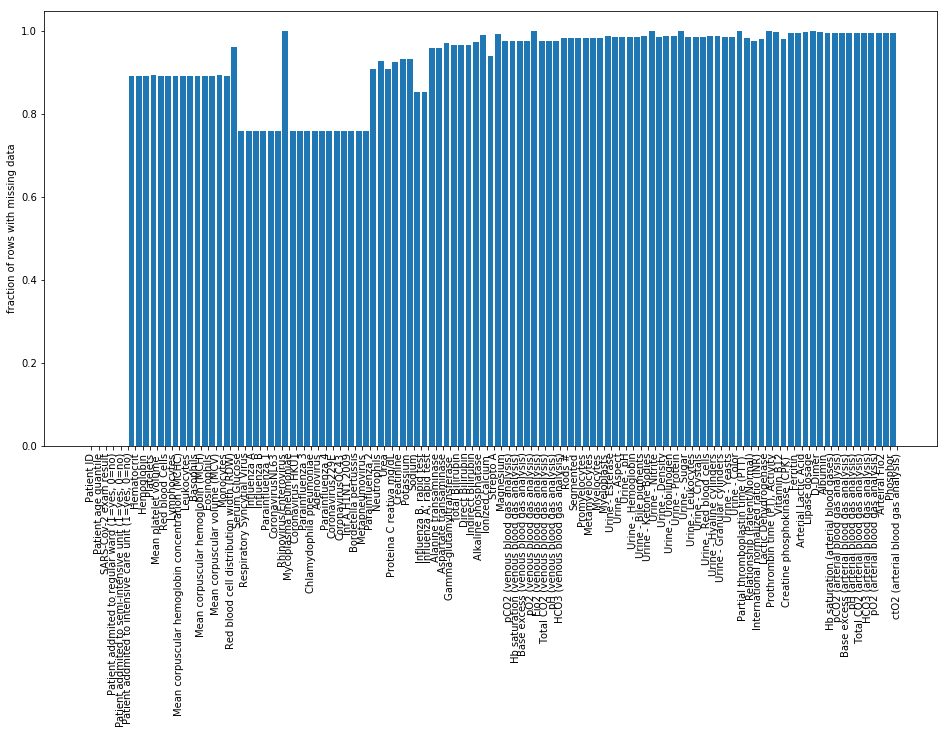

In [4]:
null_counts = df.isnull().sum()/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)
plt.show()

In [5]:
# drop non-feature columns
feature_columns = df.columns.drop([
    'Patient ID', 
    'SARS-Cov-2 exam result', 
    'Patient addmited to regular ward (1=yes, 0=no)', 
    'Patient addmited to semi-intensive unit (1=yes, 0=no)', 
    'Patient addmited to intensive care unit (1=yes, 0=no)'
])
# create multi-index with (count, fraction, number of NaN sequences) per feature column
iterables = [feature_columns,['count','fraction','seq']]
index = pd.MultiIndex.from_product(iterables,names=['feature','stat'])
# use list of IDs as index (only sorted for easier navigation)
ids = df['Patient ID'].unique()
ids.sort()
# create empty data frame
nan_df = pd.DataFrame(data=None,index=df['SARS-Cov-2 exam result'].unique(),columns=index)

from itertools import groupby
# iterate over all asset ID
total_groups = len(df.groupby('SARS-Cov-2 exam result'))
print("Groups:", total_groups)
for i, (name, group) in enumerate(df.groupby('SARS-Cov-2 exam result')):
    print('i:', i, '/', total_groups, ', SARS-Cov-2 exam result:', name)
    # for every feature column
    for c in feature_columns:
        #print('name:', name, ", group:", len(group), ', c:', c)
        # total number of rows with missing data
        nan_count = group[c].isnull().sum()
        # time span this ID was present
        timespan = len(group[c])
        # row indices for missing data
        nan_indices = pd.isnull(group[c]).to_numpy().nonzero()[0]
        # get number of joint time spans of missing values
        nseq = len(list(groupby(enumerate(nan_indices),lambda x:x[0]-x[1])))
        nan_df.loc[name][c,'count'] = nan_count
        nan_df.loc[name][c,'fraction'] = nan_count * 1.0/timespan
        nan_df.loc[name][c,'seq'] = nseq
        
nan_df.head(20).T


Groups: 2
i: 0 / 2 , SARS-Cov-2 exam result: negative
i: 1 / 2 , SARS-Cov-2 exam result: positive


negative  positive
feature                                          stat                        
Patient age quantile                             count            0         0
                                                 fraction         0         0
                                                 seq              0         0
Hematocrit                                       count         4566       475
                                                 fraction  0.897759  0.851254
                                                 seq            441        61
Hemoglobin                                       count         4566       475
                                                 fraction  0.897759  0.851254
                                                 seq            441        61
Platelets                                        count         4567       475
                                                 fraction  0.897955  0.851254
                                                 seq            440        61
Mean platelet volume                             count         4568       477
                                                 fraction  0.898152  0.854839
                                                 seq            440        62
Red blood Cells                                  count         4567       475
                                                 fraction  0.897955  0.851254
                                                 seq            440        61
Lymphocytes                                      count         4567       475
                                                 fraction  0.897955  0.851254
                                                 seq            440        61
Mean corpuscular hemoglobin concentration (MCHC) count         4567       475
                                                 fraction  0.897955  0.851254
                                                 seq            440        61
Leukocytes                                       count         4567       475
                                                 fraction  0.897955  0.851254
                                                 seq            440        61
Basophils                                        count         4567       475
                                                 fraction  0.897955  0.851254
                                                 seq            440        61
Mean corpuscular hemoglobin (MCH)                count         4567       475
                                                 fraction  0.897955  0.851254
                                                 seq            440        61
Eosinophils                                      count         4567       475
                                                 fraction  0.897955  0.851254
                                                 seq            440        61
Mean corpuscular volume (MCV)                    count         4567       475
                                                 fraction  0.897955  0.851254
                                                 seq            440        61
Monocytes                                        count         4568       475
                                                 fraction  0.898152  0.851254
                                                 seq            439        61
Red blood cell distribution width (RDW)          count         4567       475
                                                 fraction  0.897955  0.851254
                                                 seq            440        61
Serum Glucose                                    count         4911       525
                                                 fraction  0.965592   0.94086
                                                 seq            167        28
Respiratory Syncytial Virus                      count         3844       446
                                                 fraction    0.7558  0.799283
   

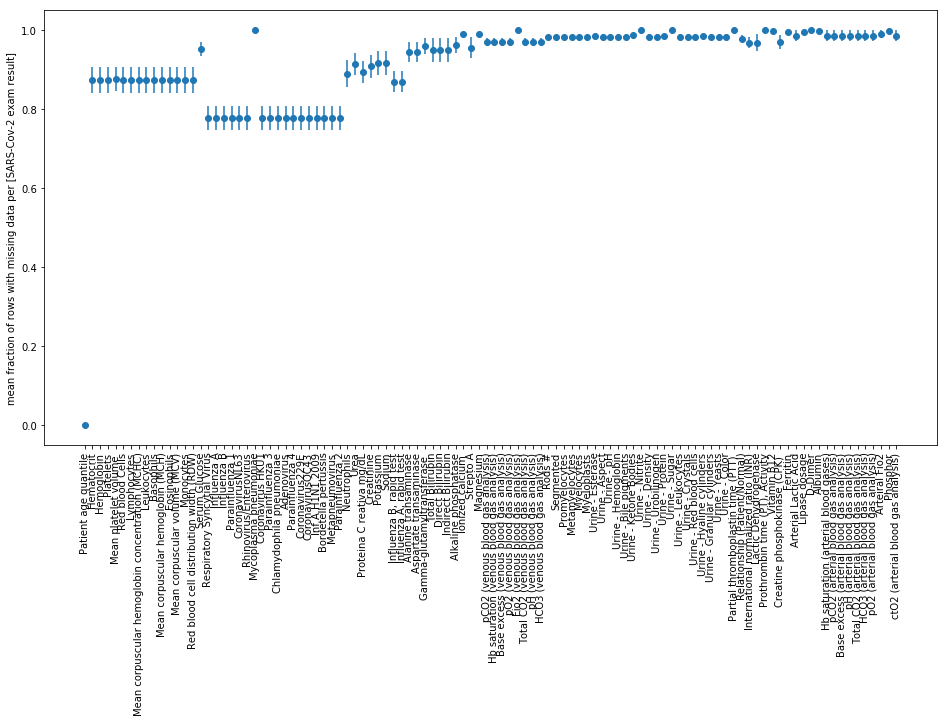

In [6]:
fractions = nan_df.xs('fraction',level='stat',axis=1)
fraction_mean = fractions.mean()
fraction_std = fractions.std()
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(fraction_mean)),fraction_mean.index,rotation='vertical')
plt.errorbar(np.arange(len(fraction_mean)),fraction_mean,yerr=fraction_std,fmt='o')
plt.ylabel('mean fraction of rows with missing data per [SARS-Cov-2 exam result]');
plt.show()

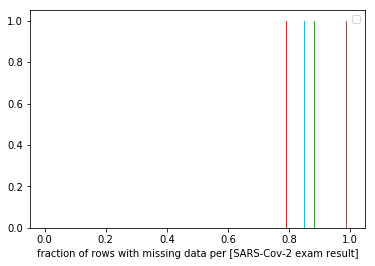

In [7]:
plt.hist(fractions.values.flatten(),bins=50)
plt.xlabel('fraction of rows with missing data per [SARS-Cov-2 exam result]')
plt.legend()
plt.show()

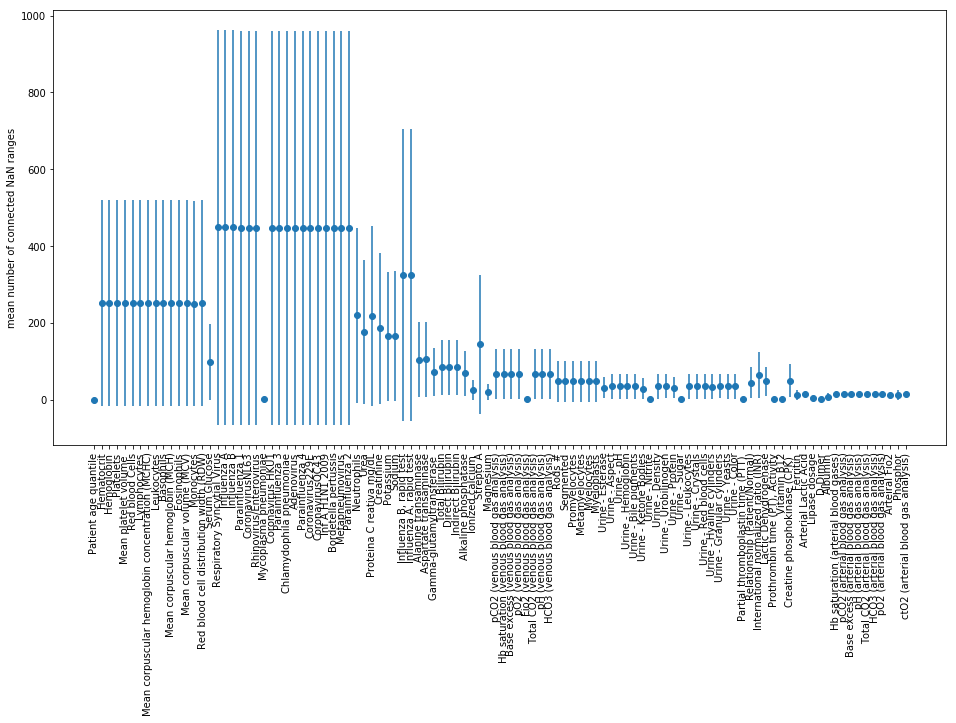

In [8]:
nseq = nan_df.xs('seq',level='stat',axis=1)
nseq_mean = nseq.mean()
nseq_std = nseq.std()
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(nseq_mean)),nseq_mean.index,rotation='vertical') #todo: check this (we don't have timestamp)
plt.errorbar(np.arange(len(nseq_mean)),nseq_mean,yerr=nseq_std,fmt='o')
plt.ylabel('mean number of connected NaN ranges')
plt.show()

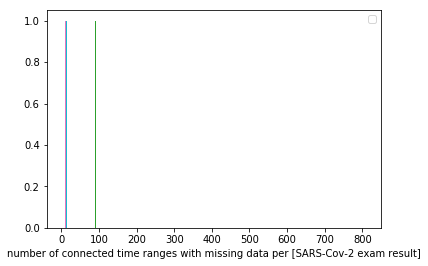

In [9]:
plt.hist(nseq.values.flatten(),bins=50)
plt.xlabel('number of connected time ranges with missing data per [SARS-Cov-2 exam result]');  #todo: check this (we don't have timestamp)
plt.legend()
plt.show()

# gradient boost - y=SARS-Cov-2 exam result

In [10]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.feature_selection import VarianceThreshold
import lightgbm as lgb
import shap

In [11]:
cat_features = [
    i for i in df.columns if str(df[i].dtype) in ['object', 'category']
]
if len(cat_features) > 0:
    df[cat_features] = df[cat_features].astype('category')
print(df.dtypes)

# lgb don't like strings/category, only numbers and boolean
df_lgb = df.copy()
for i in cat_features:
    df_lgb[i] = df[i].cat.codes
# it don't like complex names too..
df_lgb.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in df_lgb.columns]
print(df_lgb.columns)

y = (df['SARS-Cov-2 exam result'] == 'positive').astype(int)
x = df_lgb.drop(['Patient_ID', 
                 'SARS_Cov_2_exam_result', 
                 'Patient_addmited_to_regular_ward__1_yes__0_no_', 
                 'Patient_addmited_to_semi_intensive_unit__1_yes__0_no_', 
                 'Patient_addmited_to_intensive_care_unit__1_yes__0_no_'
                ], axis=1)
print(y.shape, x.shape, df_lgb.shape)

Patient ID                                               category
Patient age quantile                                        int64
SARS-Cov-2 exam result                                   category
Patient addmited to regular ward (1=yes, 0=no)              int64
Patient addmited to semi-intensive unit (1=yes, 0=no)       int64
Patient addmited to intensive care unit (1=yes, 0=no)       int64
Hematocrit                                                float64
Hemoglobin                                                float64
Platelets                                                 float64
Mean platelet volume                                      float64
Red blood Cells                                           float64
Lymphocytes                                               float64
Mean corpuscular hemoglobin concentration (MCHC)          float64
Leukocytes                                                float64
Basophils                                                 float64
Mean corpu

In [12]:
# x/y train/test
while True:
    train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.2, shuffle=True, stratify=y)
    train_weight = 1-train_y.replace(train_y.value_counts()/len(train_y))
    valid_weight = 1-valid_y.replace(valid_y.value_counts()/len(valid_y))
    if len(train_y.unique()) > 1 and len(valid_y.unique()) > 1:
        break
positive_weight = train_weight[train_y==1].values[0]
train_data=lgb.Dataset(train_x,label=train_y, weight=train_weight)
valid_data=lgb.Dataset(valid_x,label=valid_y, weight=valid_weight, reference=train_data)

print("train_y:\n",train_y.value_counts())
print("valid_y:\n",valid_y.value_counts())
print("y:\n", y.value_counts())


train_y:
 0    4069
1     446
Name: SARS-Cov-2 exam result, dtype: int64
valid_y:
 0    1017
1     112
Name: SARS-Cov-2 exam result, dtype: int64
y:
 0    5086
1     558
Name: SARS-Cov-2 exam result, dtype: int64


In [13]:
#Select Hyper-Parameters
params = {'metric': 'auc',
          'objective':'binary',
          'eta': 0.004,
          'boosting_type': 'gbdt',
          'colsample_bytree': 0.9,
          'max_depth': 9,
          'n_estimators': 1200,
          'subsample': 0.9,
          'num_threads': -1,
          'scale_pos_weight': positive_weight
}
#Train model on selected parameters and number of iterations
lgbm = lgb.train(
    params=params,
    train_set=train_data,
    valid_sets=valid_data,
    early_stopping_rounds=500,
    verbose_eval=100,
#    categorical_feature=cat_features
)

Training until validation scores don't improve for 500 rounds


Found `n_estimators` in params. Will use it instead of argument


[100]	valid_0's auc: 0.670459
[200]	valid_0's auc: 0.67412
[300]	valid_0's auc: 0.681635
[400]	valid_0's auc: 0.685134
[500]	valid_0's auc: 0.684853
Early stopping, best iteration is:
[1]	valid_0's auc: 0.697495


Overall AUC: 0.701


Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.


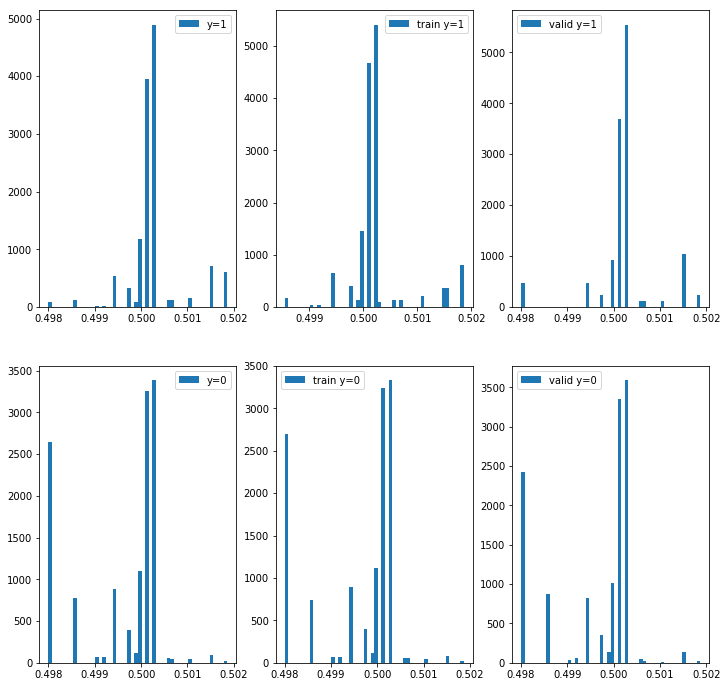

In [14]:
y_hat = lgbm.predict(x)
score = roc_auc_score(y, y_hat)
print("Overall AUC: {:.3f}" .format(score))
plt.figure(figsize=(12,12))
plt.subplot(2,3,1)
plt.hist(lgbm.predict(x[y==1]), label='y=1', bins=50, density=True)
plt.legend()
plt.subplot(2,3,2)
plt.hist(lgbm.predict(train_x[y==1]), label='train y=1', bins=50, density=True)
plt.legend()
plt.subplot(2,3,3)
plt.hist(lgbm.predict(valid_x[y==1]), label='valid y=1', bins=50, density=True)
plt.legend()

plt.subplot(2,3,4)
plt.hist(lgbm.predict(x[y==0]), label='y=0', bins=50, density=True)
plt.legend()
plt.subplot(2,3,5)
plt.hist(lgbm.predict(train_x[y==0]), label='train y=0', bins=50, density=True)
plt.legend()
plt.subplot(2,3,6)
plt.hist(lgbm.predict(valid_x[y==0]), label='valid y=0', bins=50, density=True)
plt.legend()
plt.show()


well... very bad results, probably will send to home someone sick, or leave someone "good" at hospital

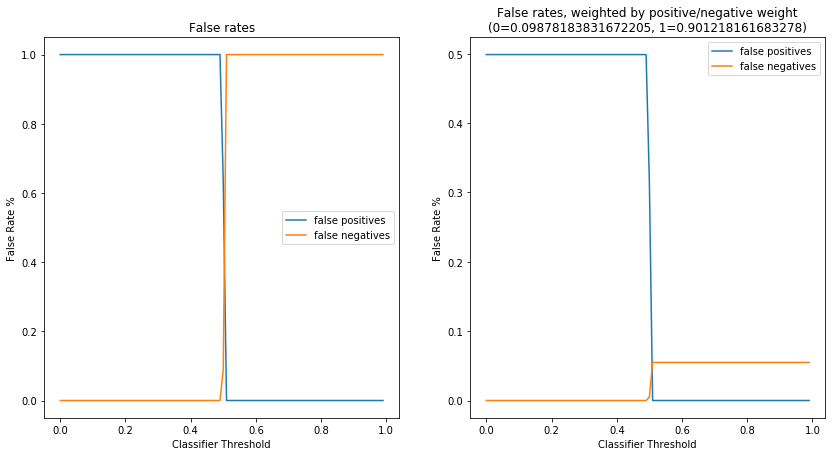

In [15]:
def create_threshold_chart(y_hat, y, weight):
    # valid threshold
    x, y1, y2, y3, y4 = np.array(range(0,100))/100., [], [], [], []
    for ii, i in enumerate(x):
        predicted_class = y_hat>i
        y1.append(len(y[(predicted_class==1) & (y==0)])/len(y[y==0]))
        y2.append(len(y[(predicted_class==0) & (y==1)])/len(y[y==1]))
        y3.append(
            len(y[(predicted_class==1) & (y==0)]) * weight[0] / 
            (len(y[y==0]) * weight[0] + len(y[y==1]) * weight[1])
        )
        y4.append(
            len(y[(predicted_class==0) & (y==1)]) * weight[0] / 
            (len(y[y==0]) * weight[0] + len(y[y==1]) * weight[1])
        )
    
    plt.figure(figsize=(14,7))
    plt.subplot(1,2,1)
    plt.title("False rates")
    plt.plot(x, y1, label='false positives')
    plt.plot(x, y2, label='false negatives')
    plt.xlabel("Classifier Threshold")
    plt.ylabel("False Rate %")
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.title("False rates, weighted by positive/negative weight\n(0=" + str(weight[0]) + ", 1=" + str(weight[1]) + ")")
    plt.plot(x, y3, label='false positives')
    plt.plot(x, y4, label='false negatives')
    plt.xlabel("Classifier Threshold")
    plt.ylabel("False Rate %")
    plt.legend()
    
    plt.show()
create_threshold_chart(
    y_hat=lgbm.predict(valid_x),
    y=valid_y,
    weight={0:1-positive_weight, 1:positive_weight}
)

# Shap values

https://www.kaggle.com/cast42/lightgbm-model-explained-by-shap

In [16]:
%time shap_values = shap.TreeExplainer(lgbm).shap_values(valid_x)
print(shap_values[0].shape)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


CPU times: user 535 ms, sys: 88.5 ms, total: 623 ms
Wall time: 807 ms
(1129, 106)


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


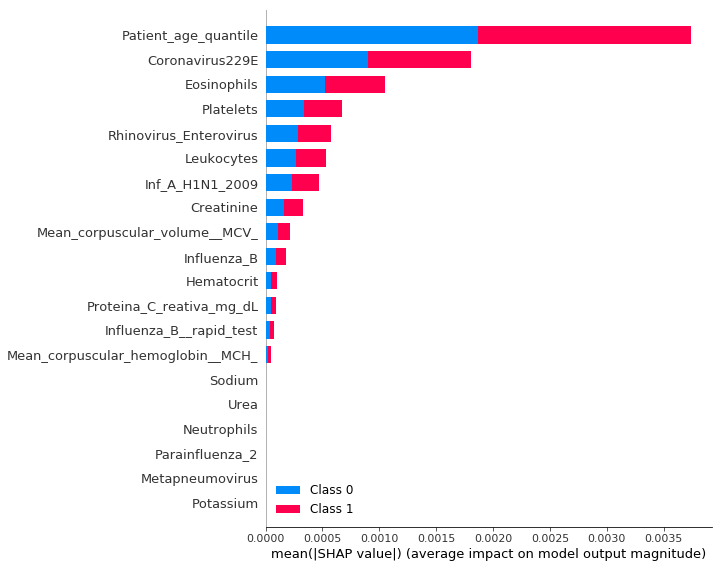

In [17]:
shap.summary_plot(shap_values, valid_x)


Total columns to display: 106


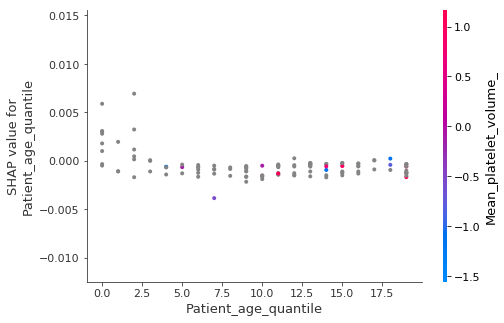

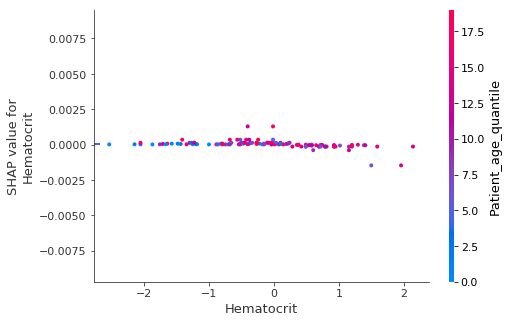

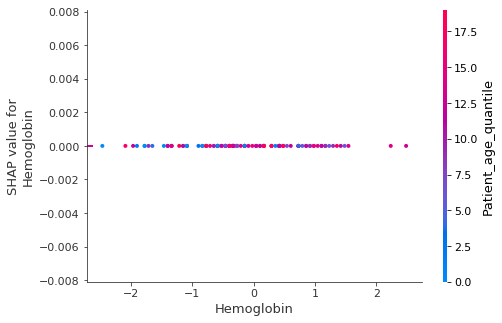

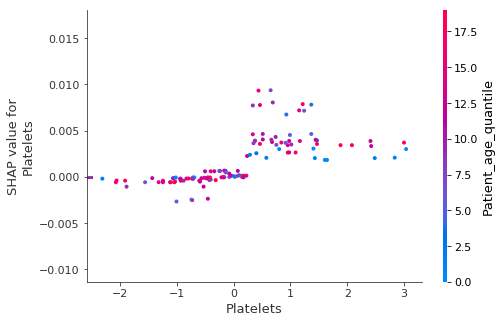

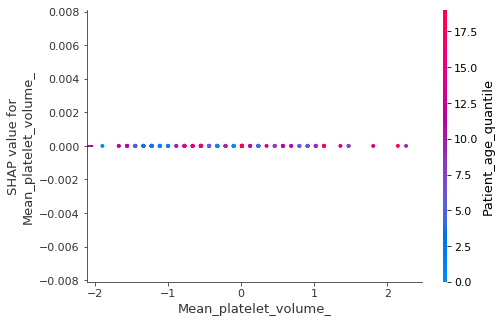

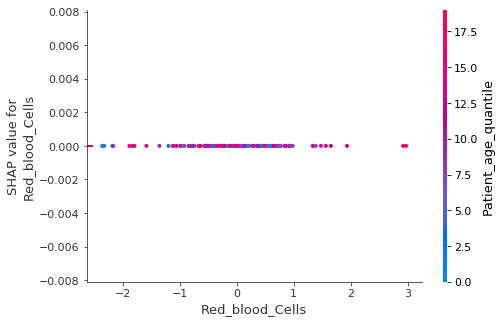

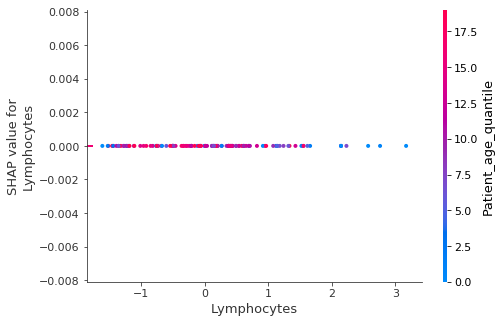

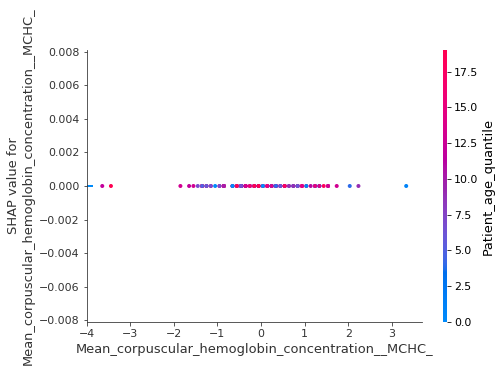

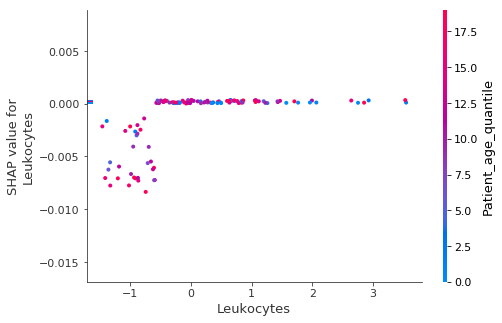

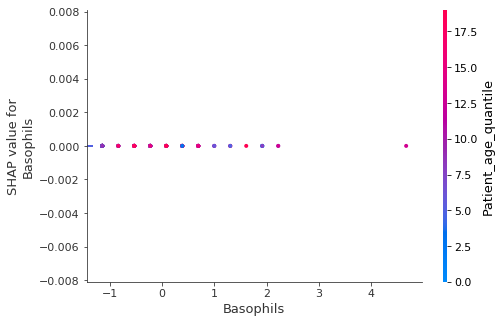

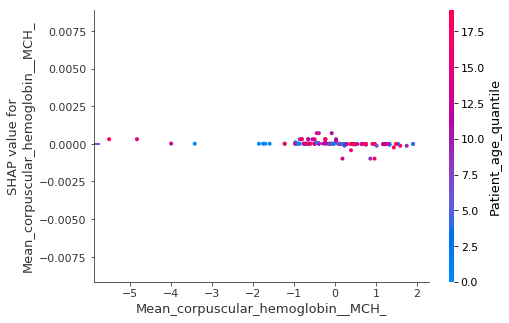

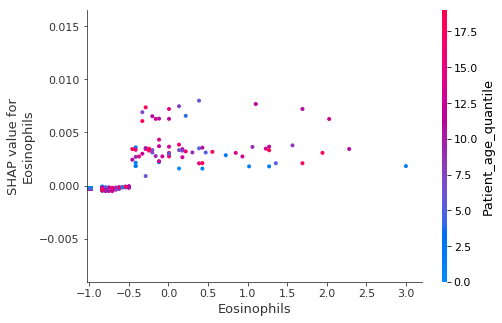

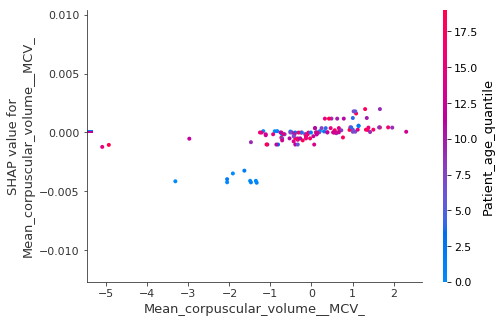

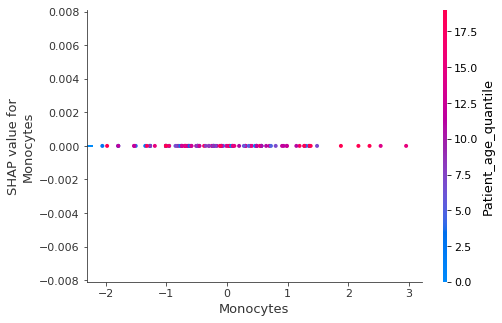

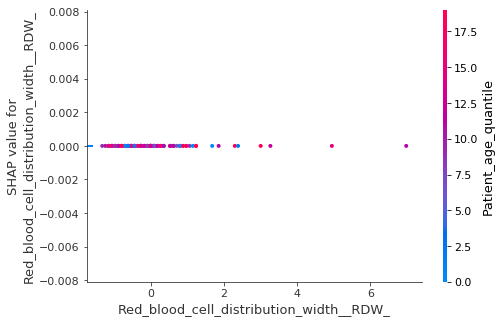

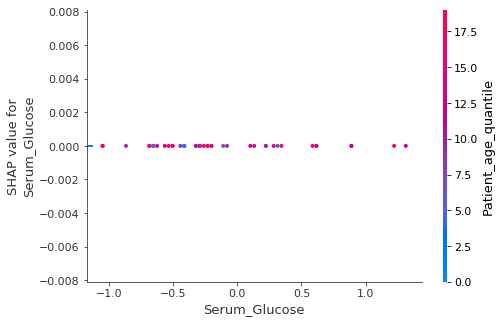

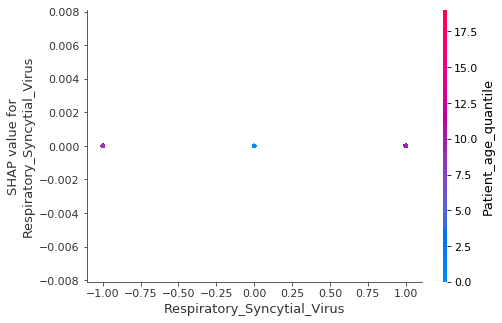

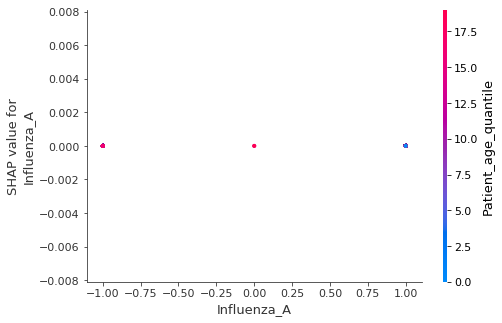

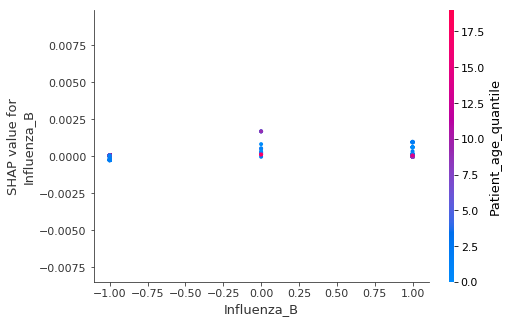

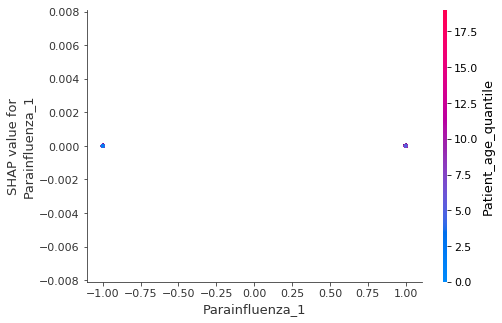

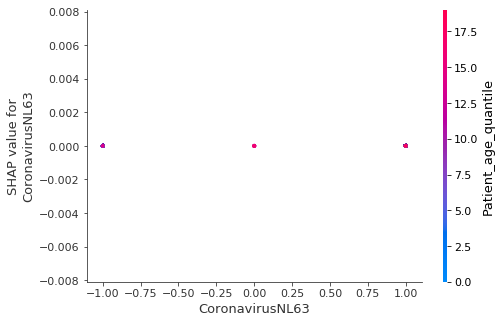

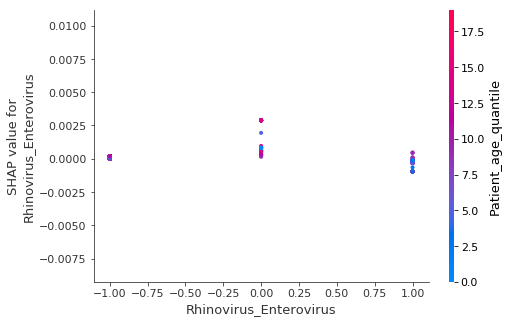

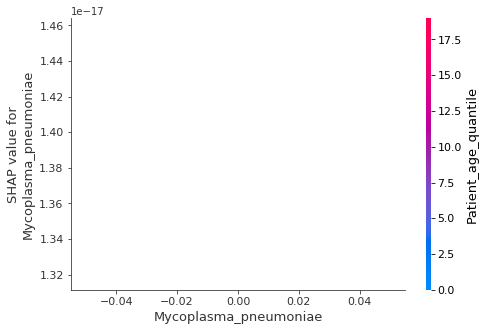

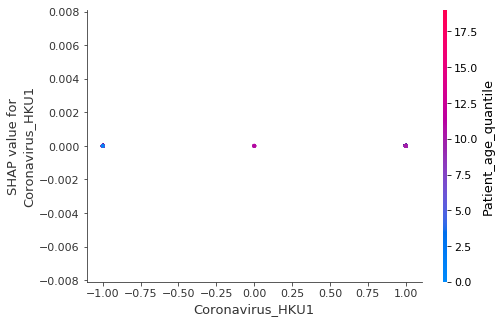

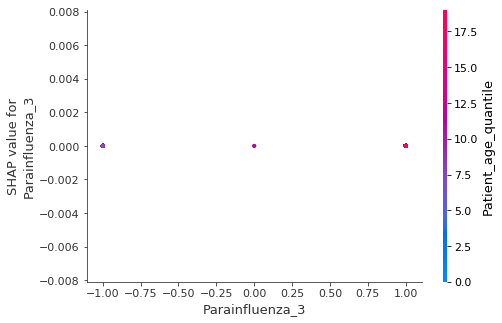

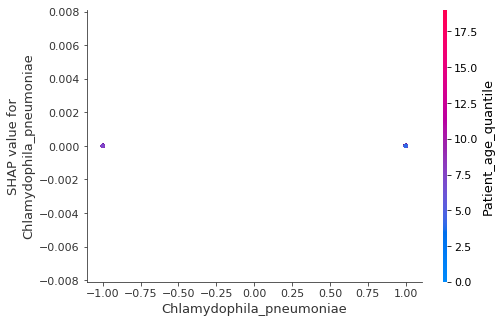

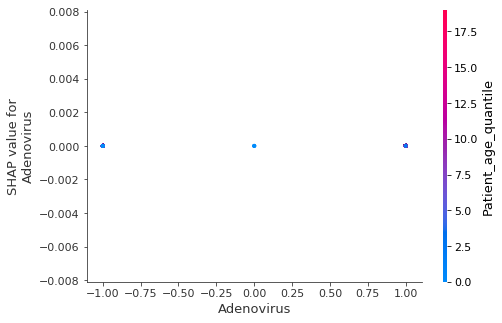

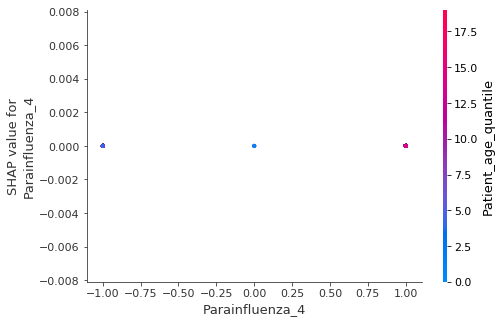

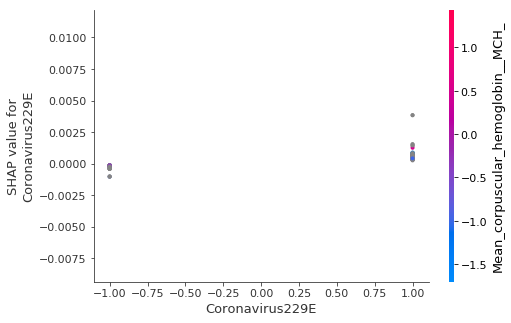

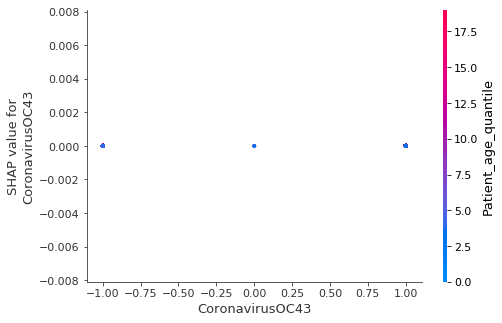

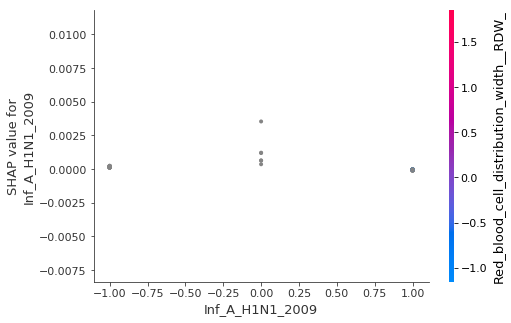

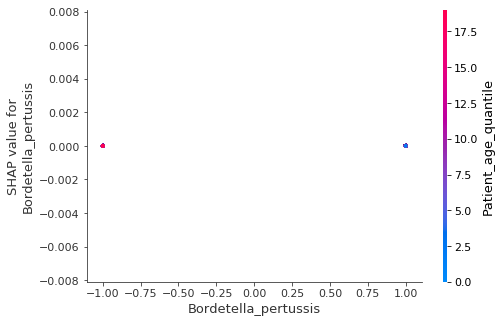

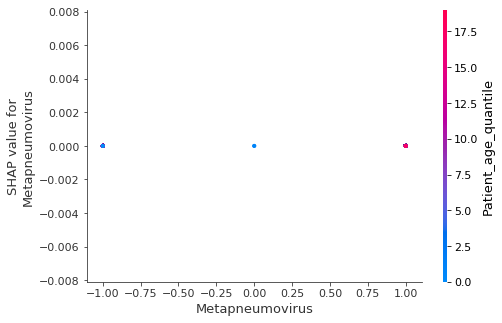

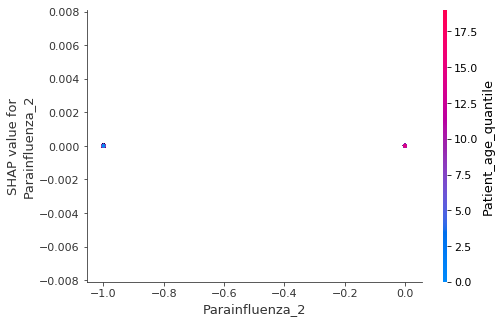

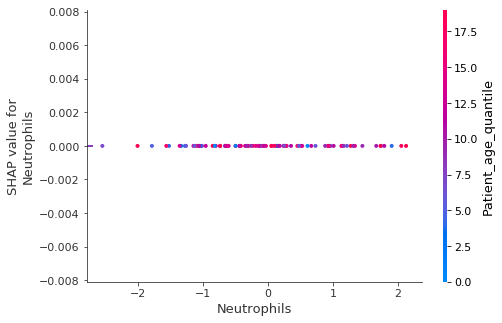

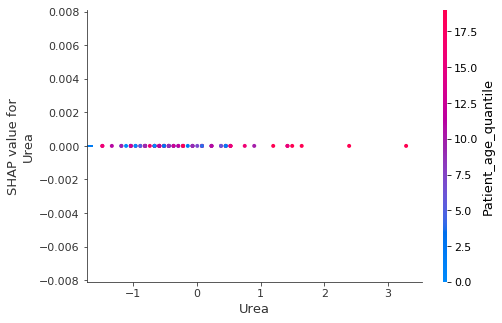

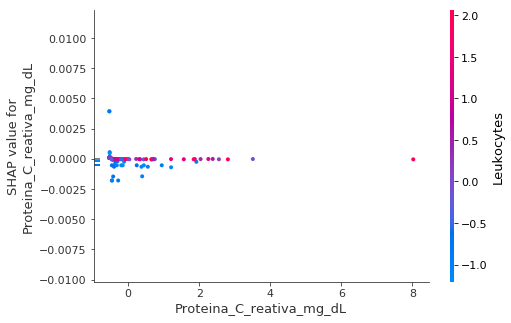

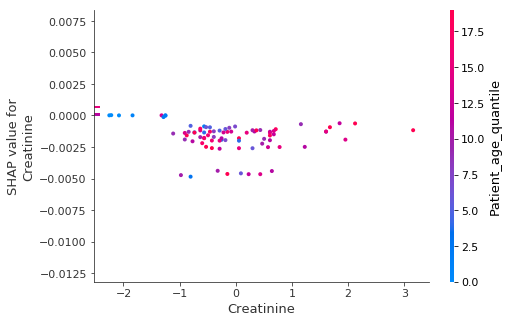

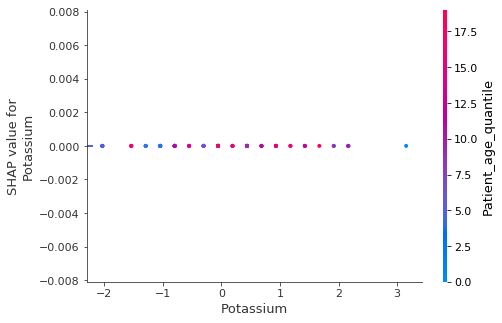

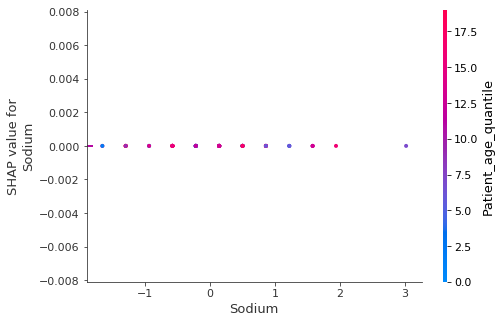

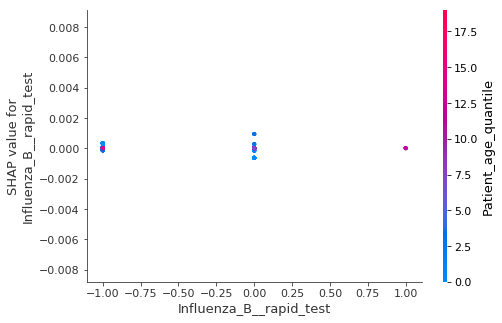

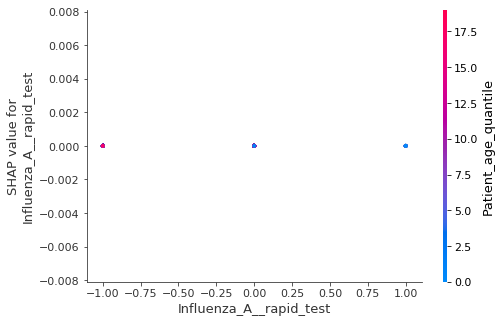

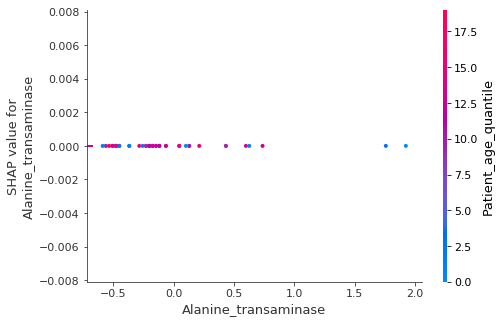

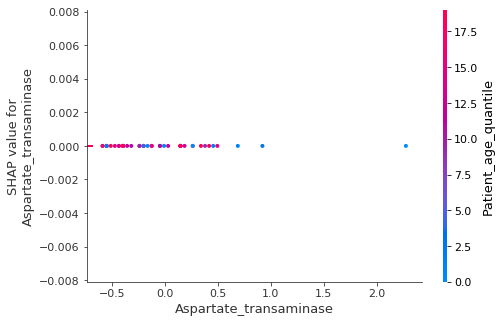

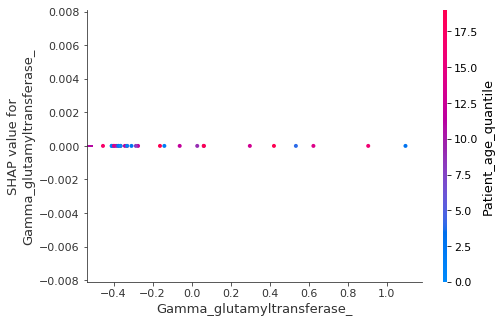

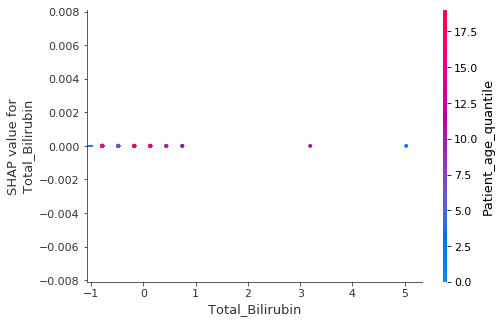

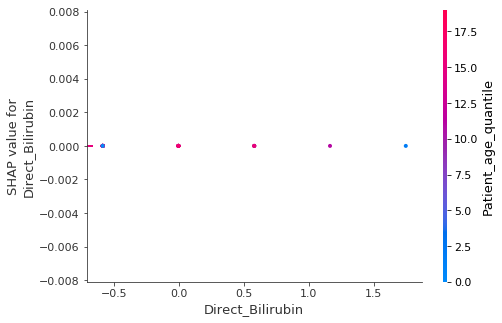

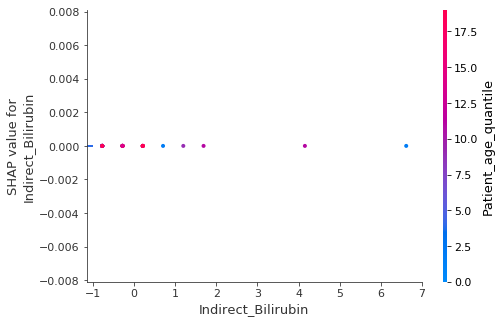

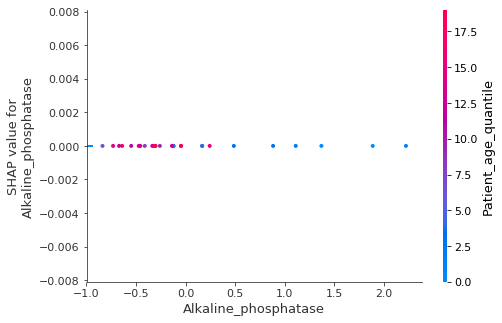

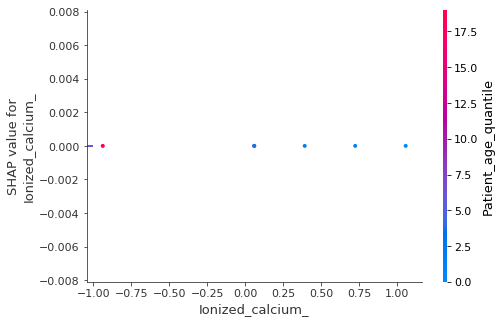

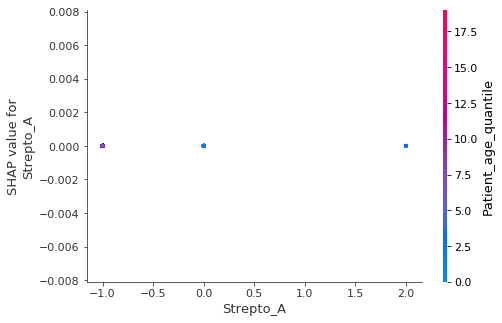

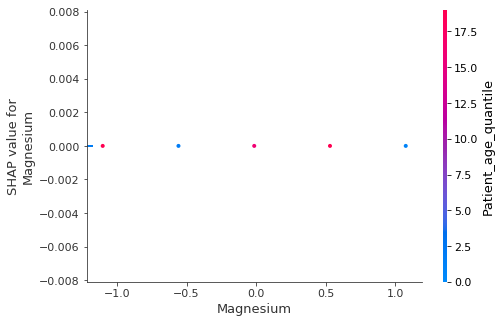

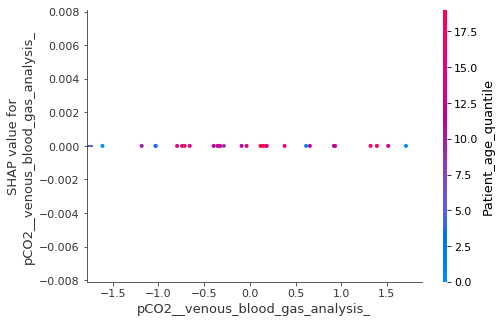

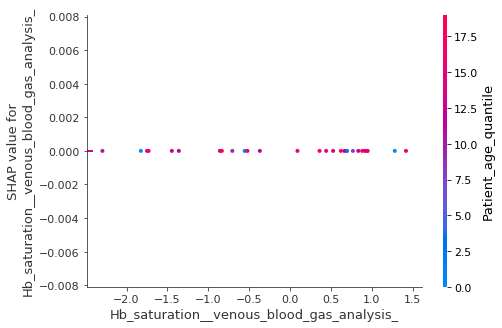

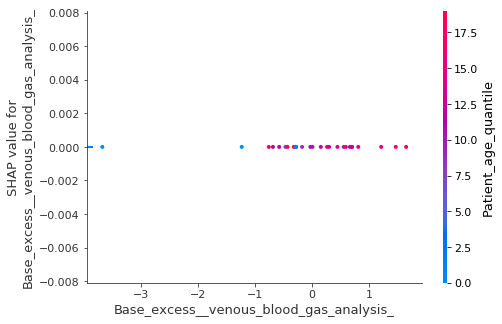

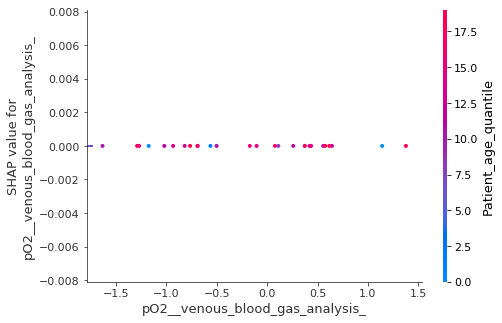

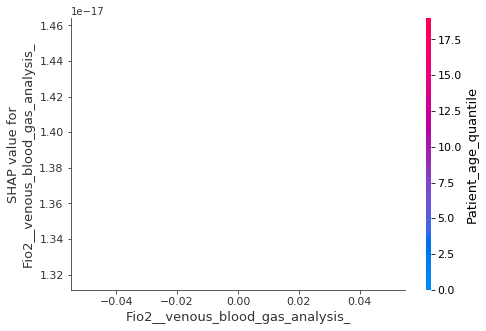

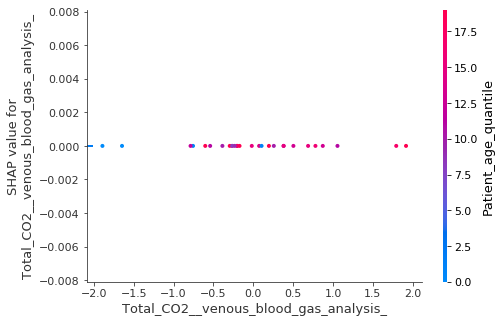

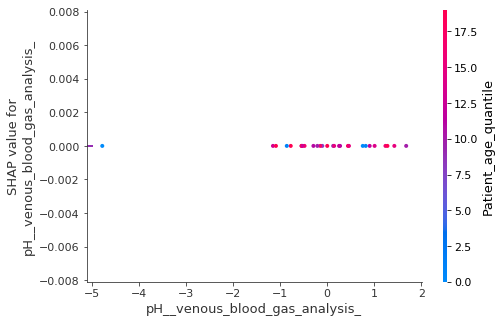

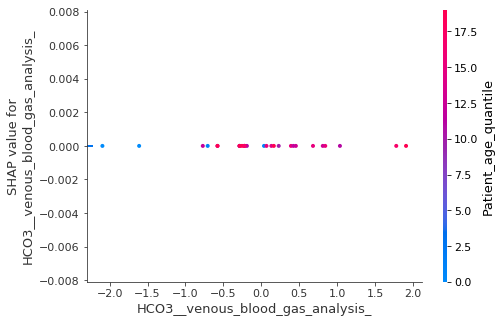

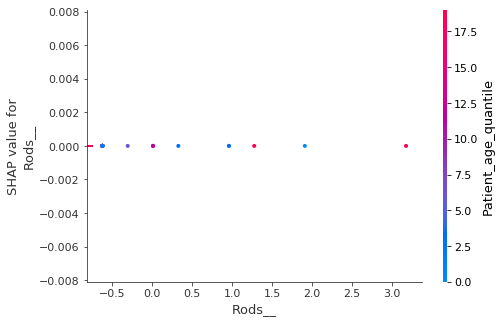

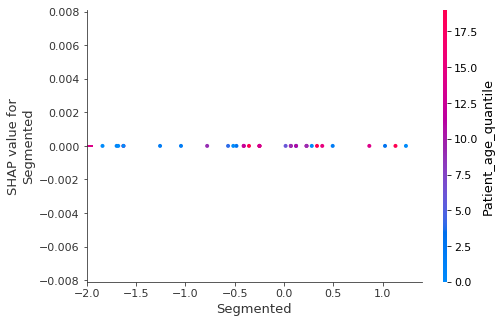

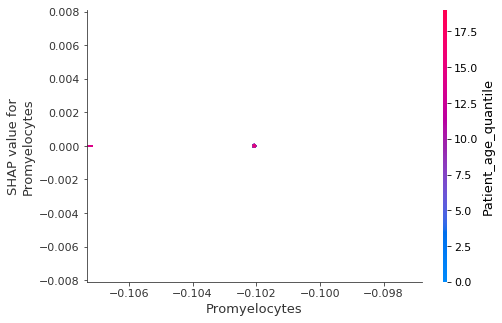

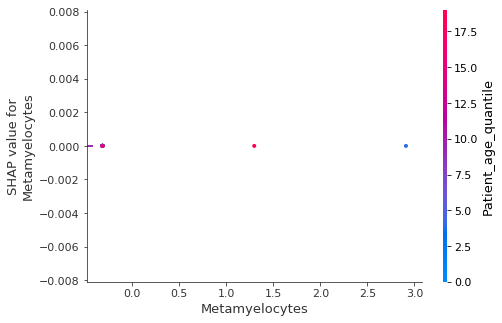

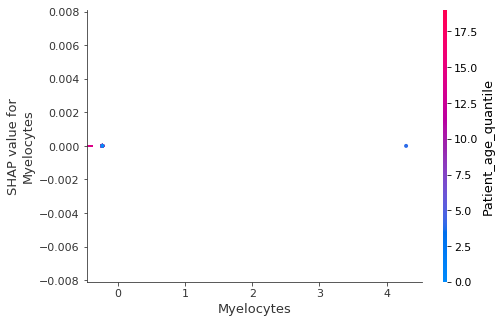

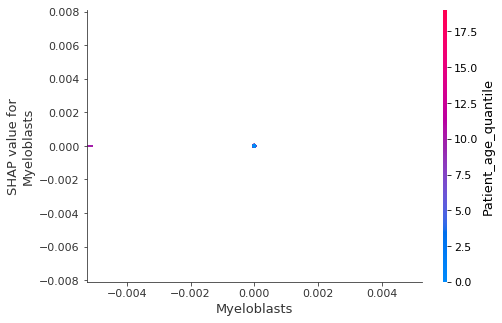

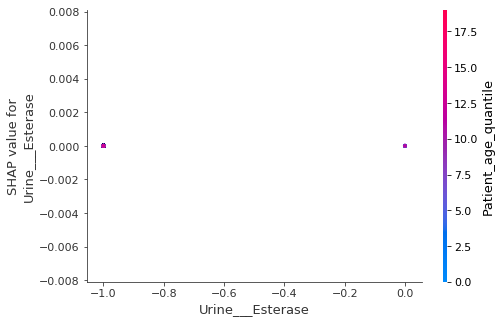

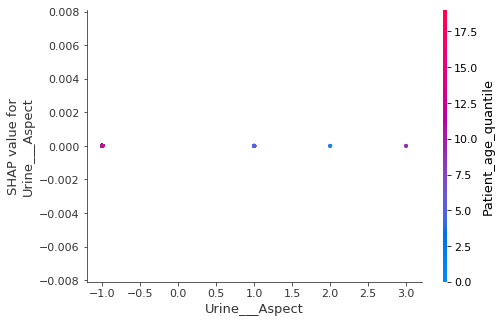

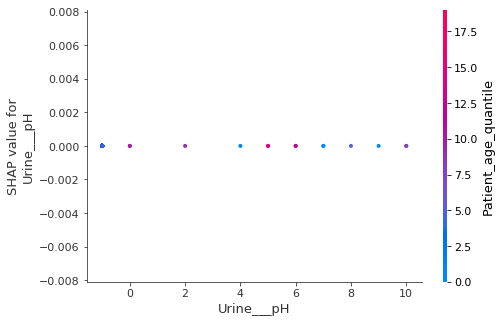

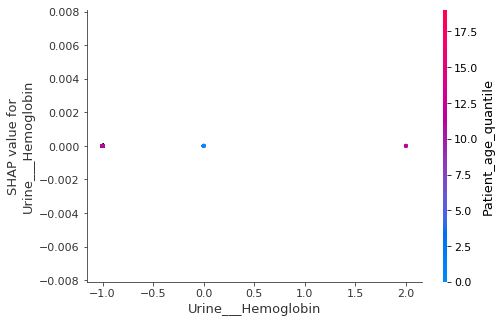

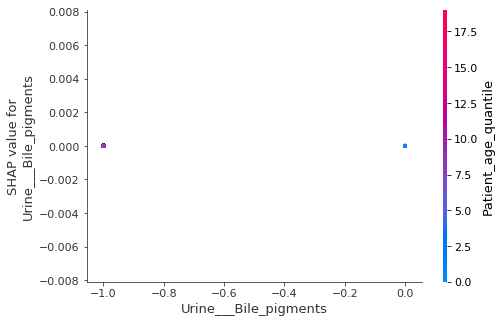

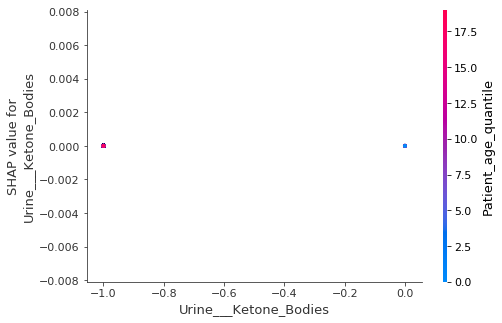

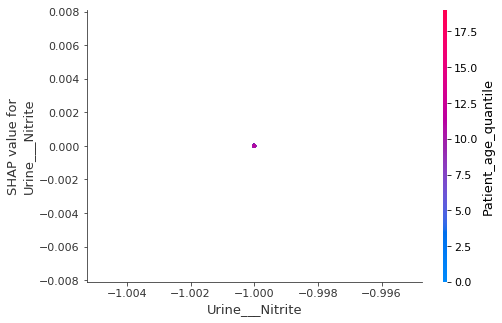

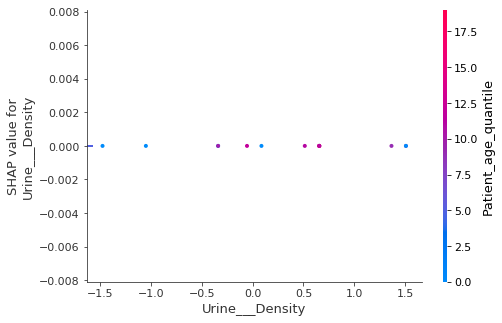

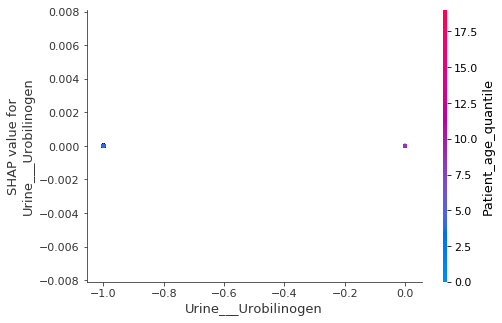

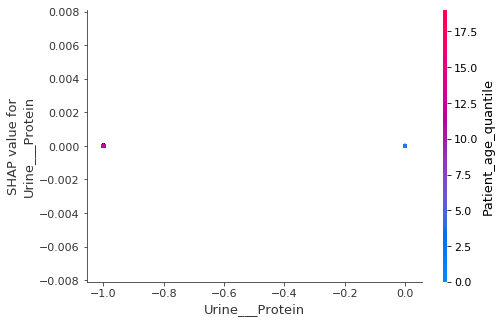

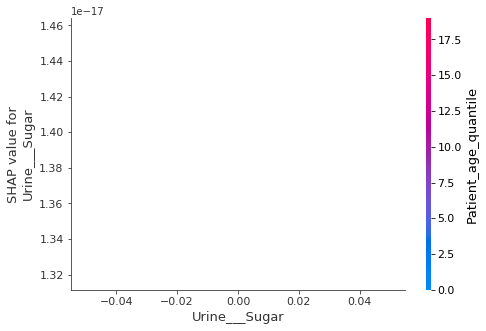

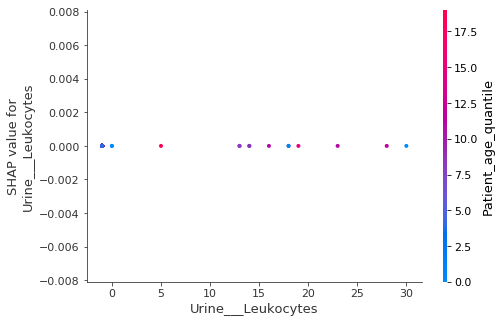

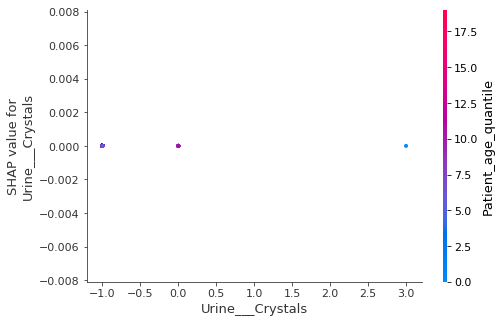

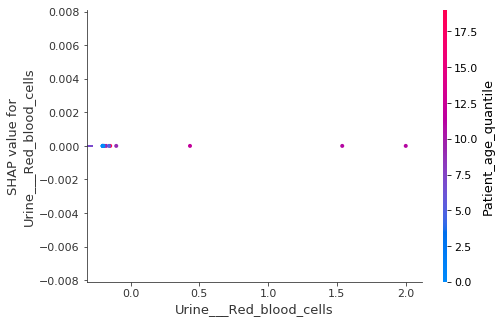

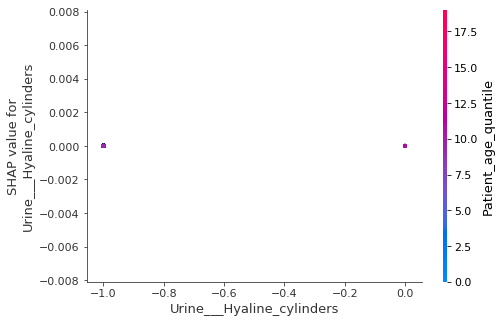

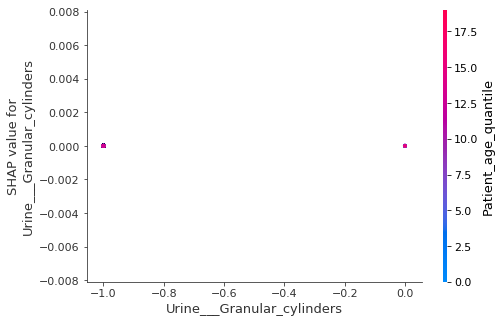

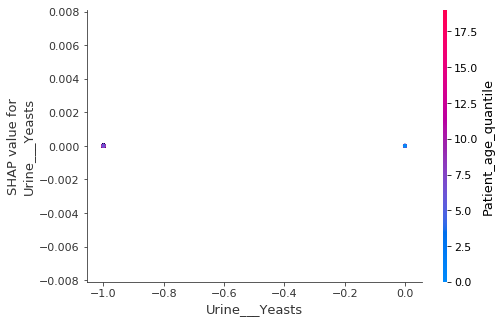

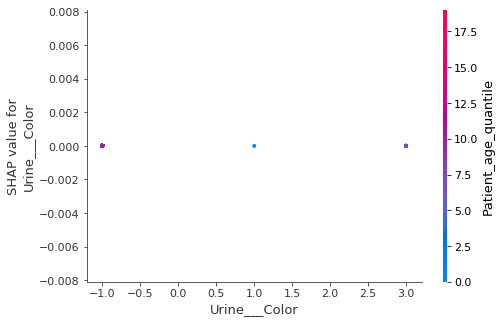

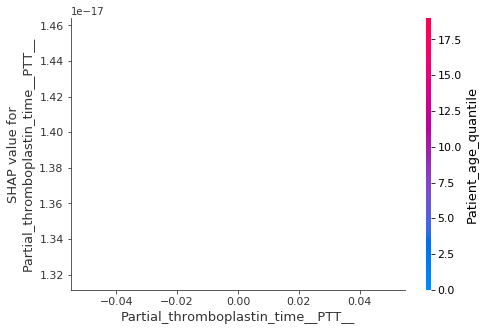

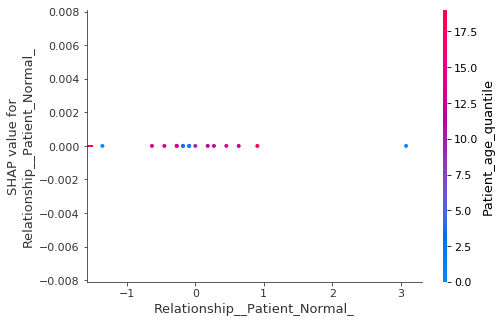

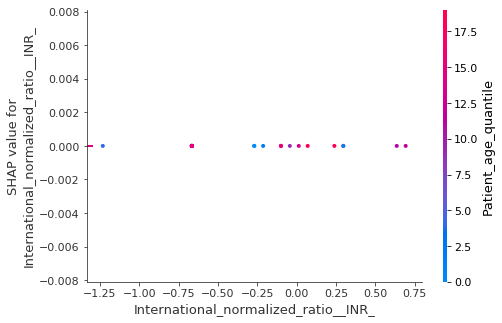

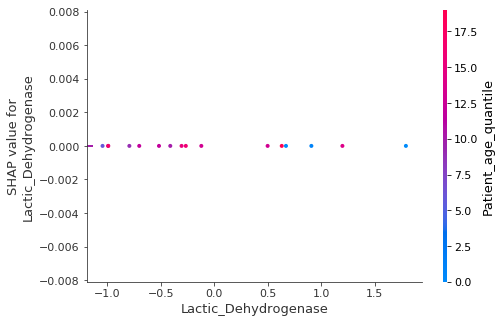

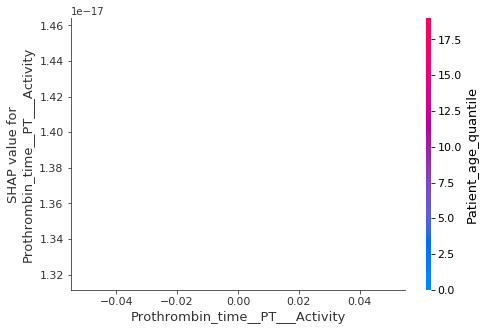

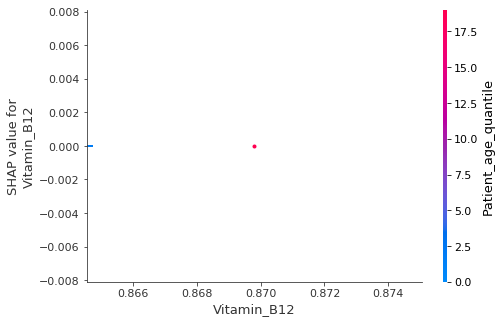

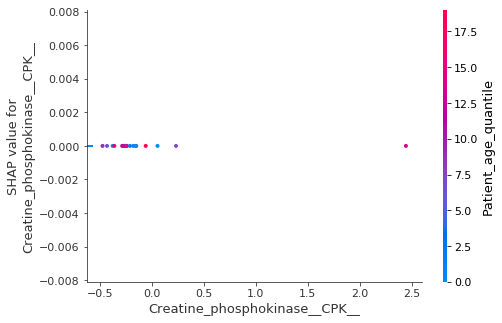

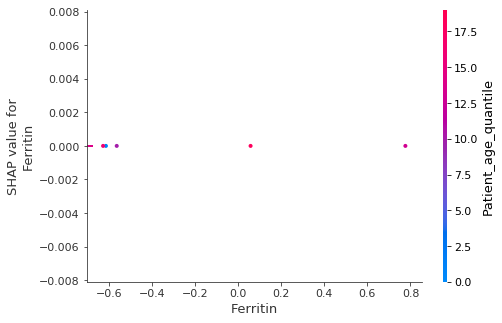

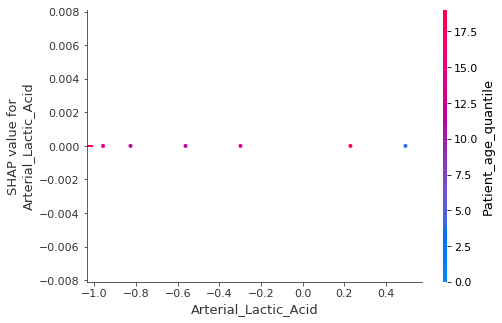

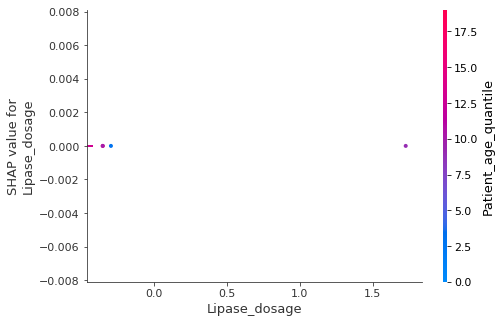

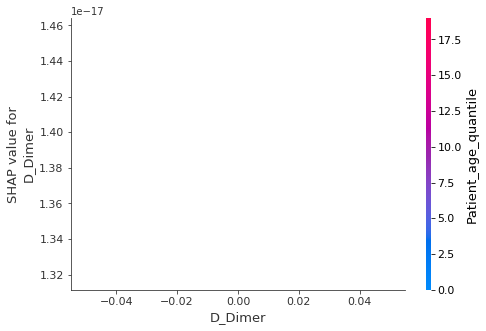

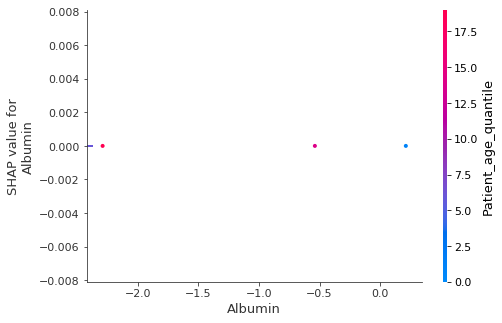

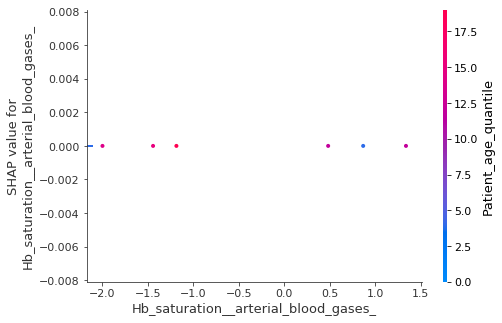

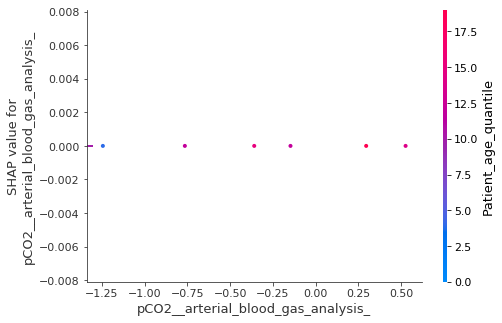

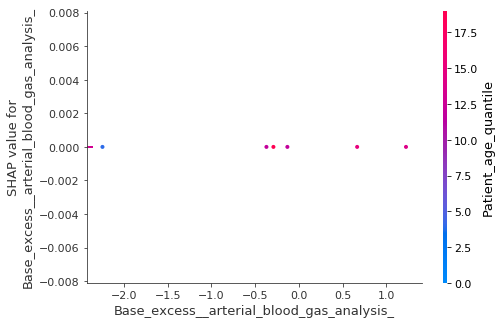

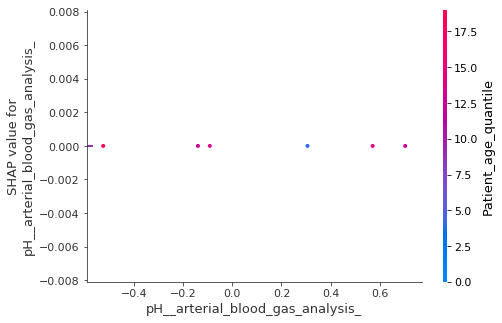

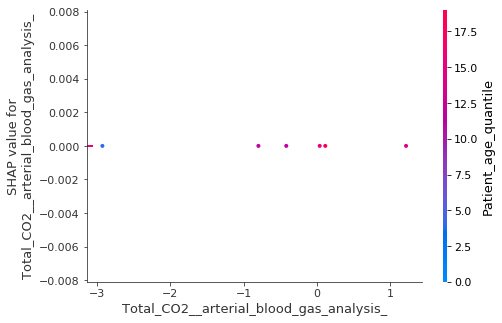

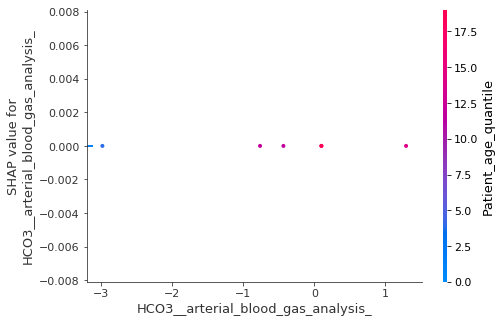

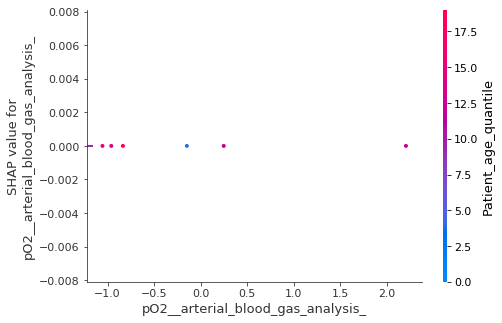

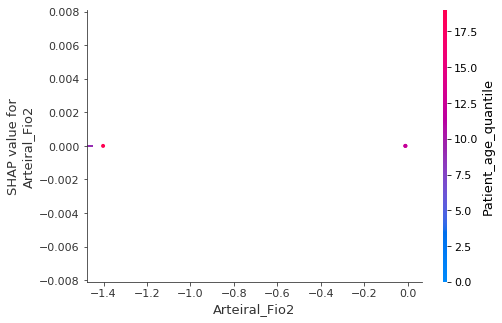

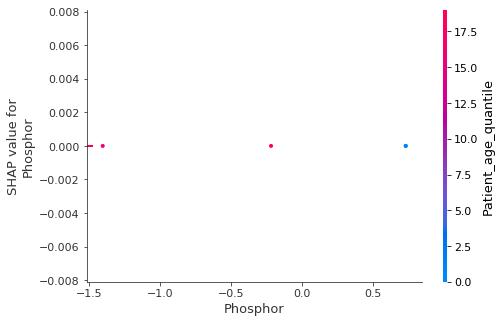

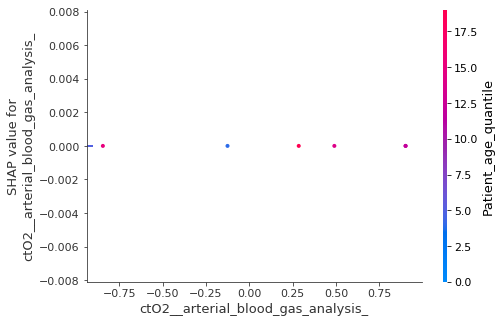

In [18]:
print("Total columns to display:", len(valid_x.columns))
for i in valid_x.columns:
    shap.dependence_plot(i, shap_values[0], valid_x)
    plt.show()

# Feature importance LGBM

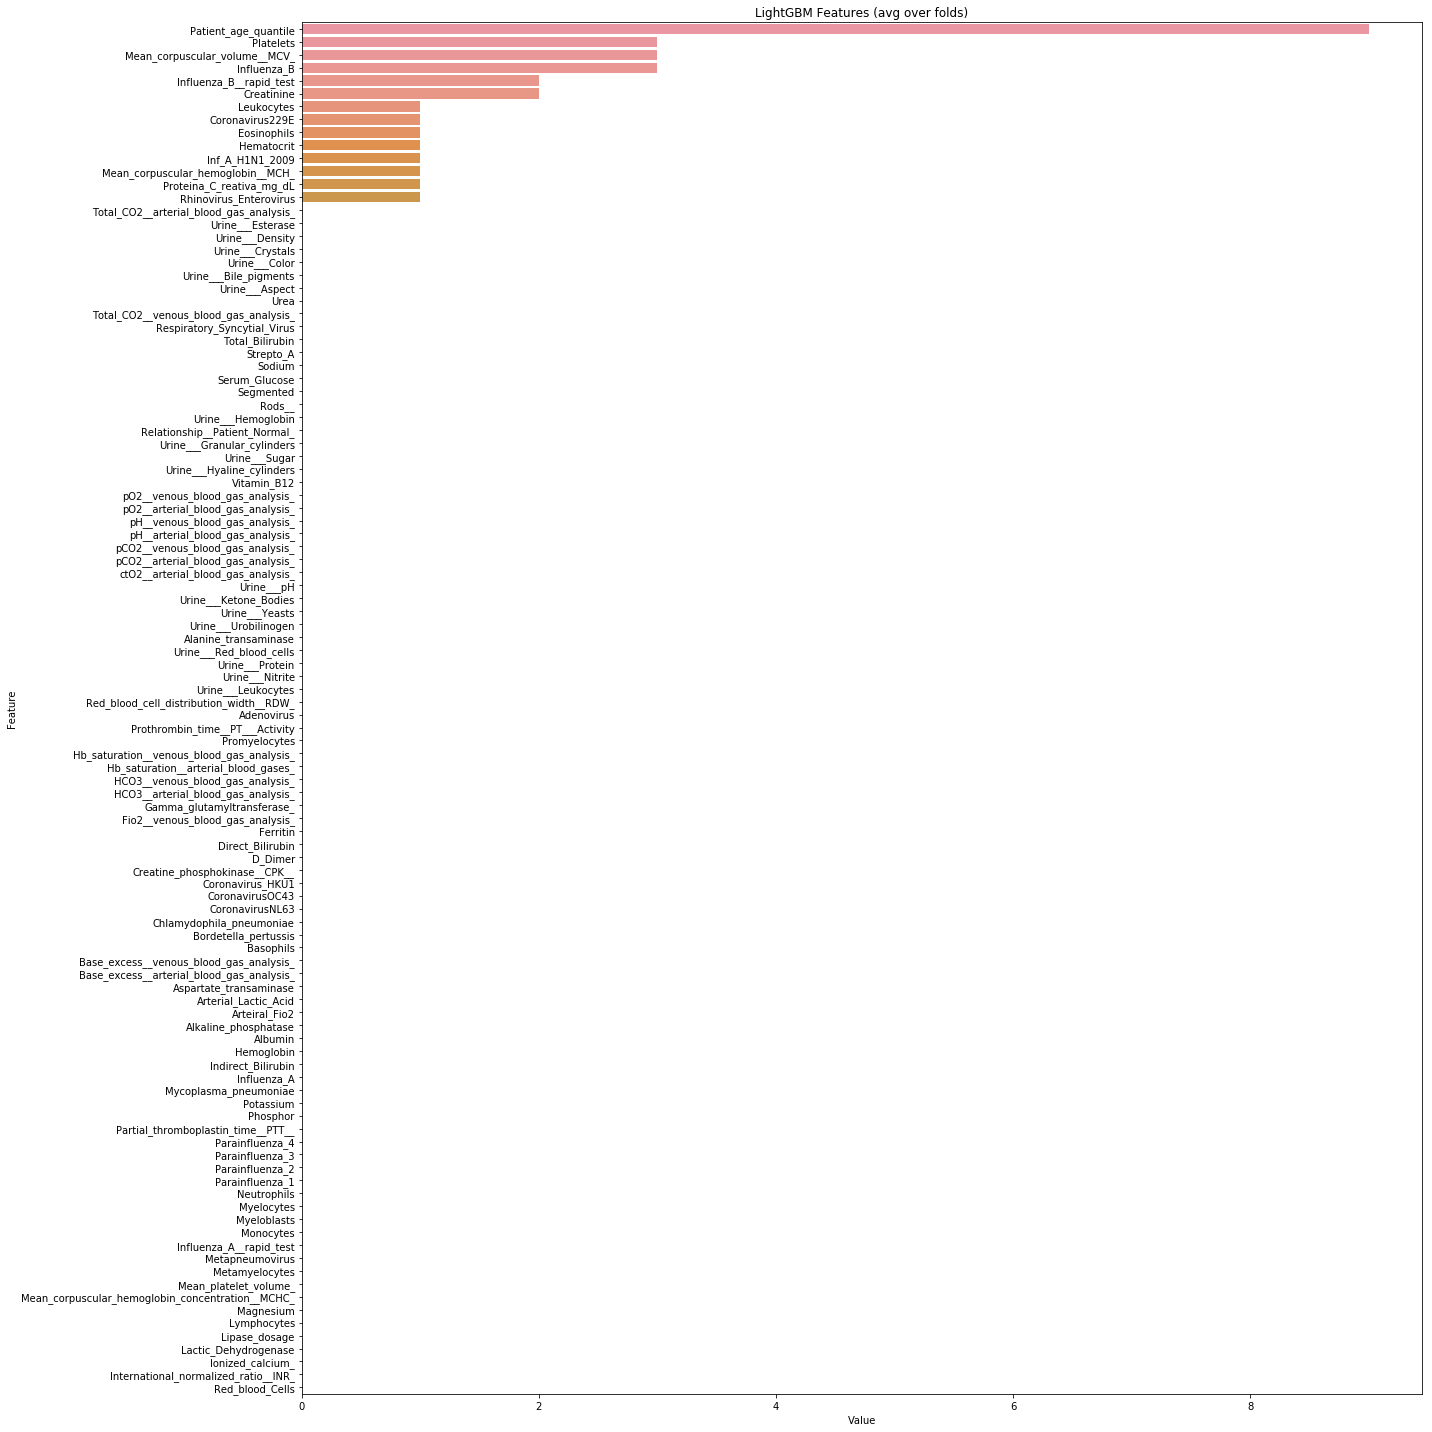

In [19]:
# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importance(),x.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 20))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()


# Let's remove age

In [20]:
y = (df['SARS-Cov-2 exam result'] == 'positive').astype(int)
x = df_lgb.drop([
    'Patient_age_quantile',
    'Patient_ID', 
    'SARS_Cov_2_exam_result', 
    'Patient_addmited_to_regular_ward__1_yes__0_no_', 
    'Patient_addmited_to_semi_intensive_unit__1_yes__0_no_', 
    'Patient_addmited_to_intensive_care_unit__1_yes__0_no_'
], axis=1)
print(y.shape, x.shape, df_lgb.shape)

# x/y train/test
# x/y train/test
while True:
    train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.2, shuffle=True, stratify=y)
    train_weight = 1-train_y.replace(train_y.value_counts()/len(train_y))
    valid_weight = 1-valid_y.replace(valid_y.value_counts()/len(valid_y))
    if len(train_y.unique()) > 1 and len(valid_y.unique()) > 1:
        break
positive_weight = train_weight[train_y==1].values[0]
train_data=lgb.Dataset(train_x,label=train_y, weight=train_weight)
valid_data=lgb.Dataset(valid_x,label=valid_y, weight=valid_weight, reference=train_data)

print("train_y:\n",train_y.value_counts())
print("valid_y:\n",valid_y.value_counts())
print("y:\n", y.value_counts())

#Select Hyper-Parameters
params = {'metric': 'auc',
          'objective':'binary',
          'eta': 0.004,
          'boosting_type': 'gbdt',
          'colsample_bytree': 0.9,
          'max_depth': 9,
          'n_estimators': 1200,
          'subsample': 0.9,
          'num_threads': -1,
          'scale_pos_weight': positive_weight
}
#Train model on selected parameters and number of iterations
lgbm = lgb.train(
    params=params,
    train_set=train_data,
    valid_sets=valid_data,
    early_stopping_rounds=500,
    verbose_eval=100,
#    categorical_feature=cat_features
)

(5644,) (5644, 105) (5644, 111)
train_y:
 0    4069
1     446
Name: SARS-Cov-2 exam result, dtype: int64
valid_y:
 0    1017
1     112
Name: SARS-Cov-2 exam result, dtype: int64
y:
 0    5086
1     558
Name: SARS-Cov-2 exam result, dtype: int64
Training until validation scores don't improve for 500 rounds


Found `n_estimators` in params. Will use it instead of argument


[100]	valid_0's auc: 0.585866
[200]	valid_0's auc: 0.597472
[300]	valid_0's auc: 0.600795
[400]	valid_0's auc: 0.603741
[500]	valid_0's auc: 0.598342
[600]	valid_0's auc: 0.597508
[700]	valid_0's auc: 0.598052
[800]	valid_0's auc: 0.599544
[900]	valid_0's auc: 0.602556
Early stopping, best iteration is:
[416]	valid_0's auc: 0.605119


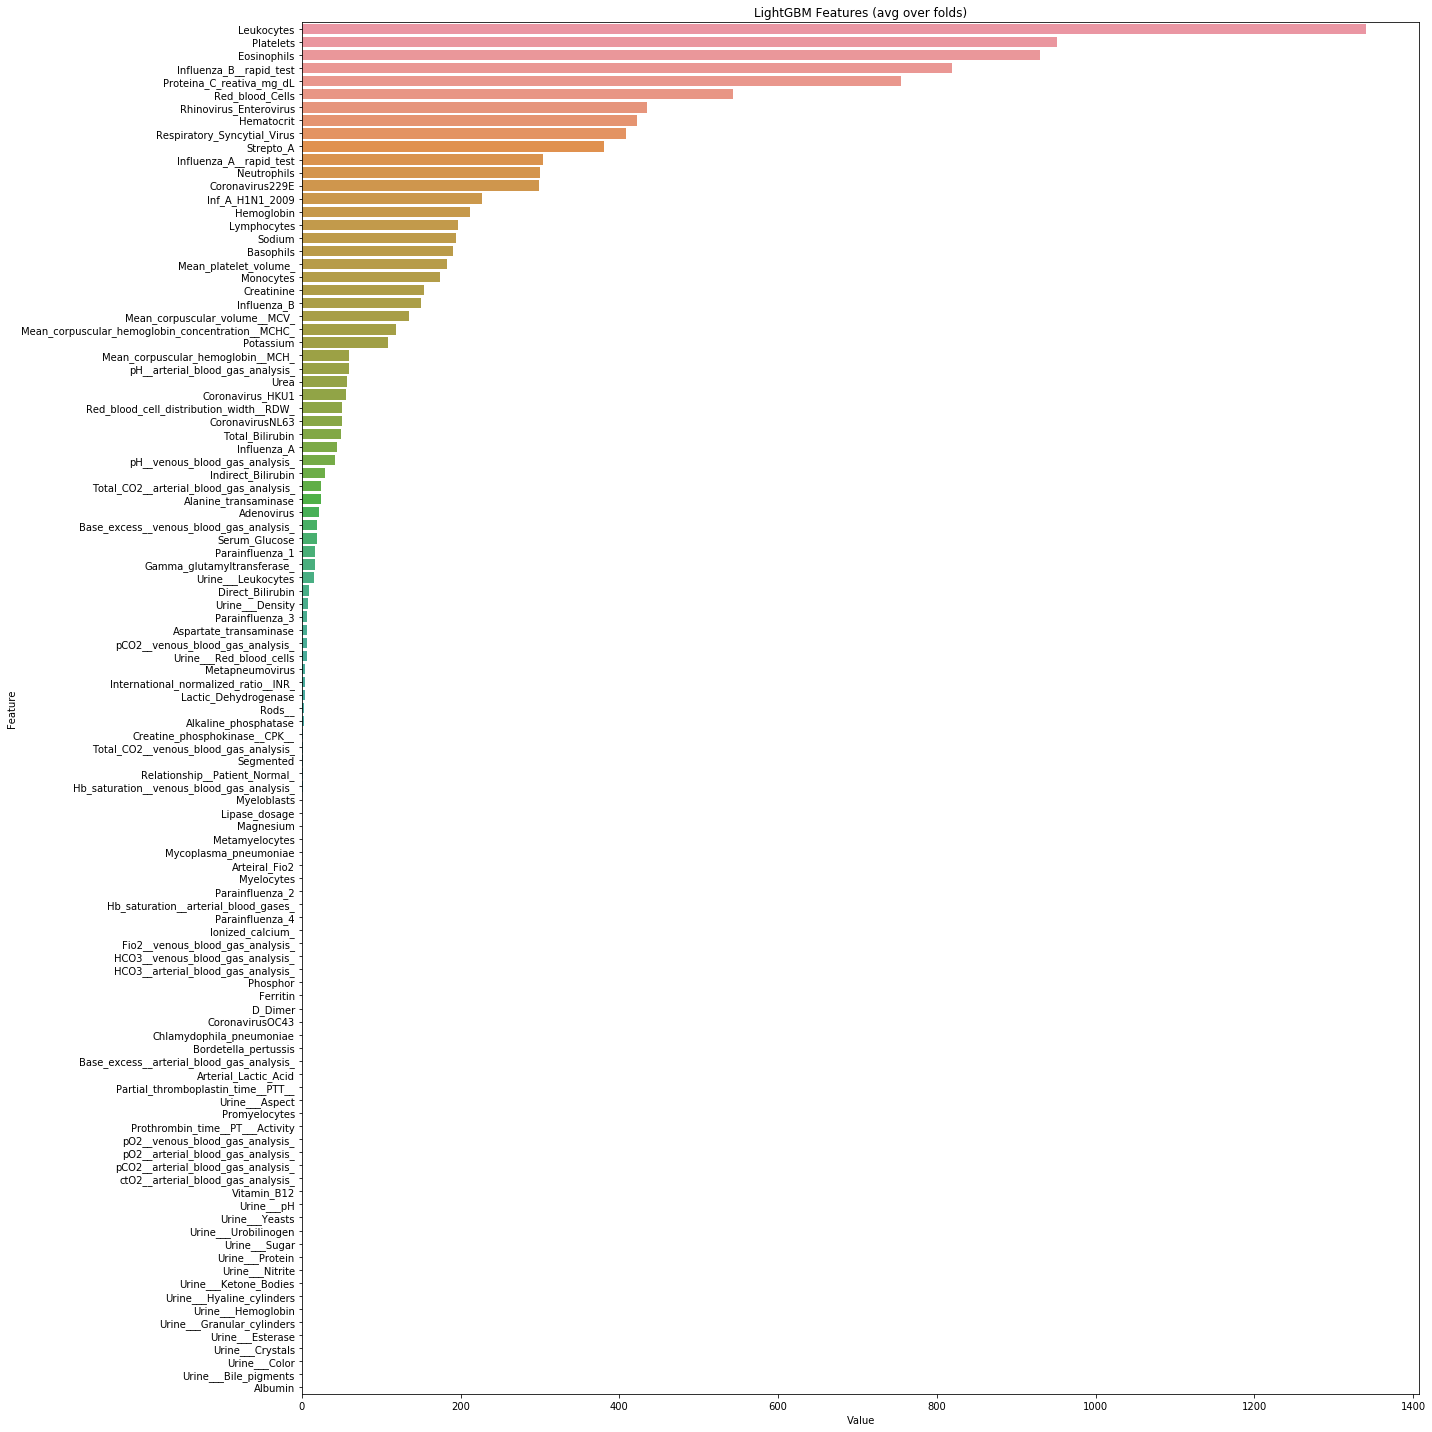

In [21]:
# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importance(),x.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 20))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()


In [22]:
%time shap_values = shap.TreeExplainer(lgbm).shap_values(valid_x)
print(shap_values[0].shape)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


CPU times: user 6.2 s, sys: 24.6 ms, total: 6.22 s
Wall time: 2.29 s
(1129, 105)


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


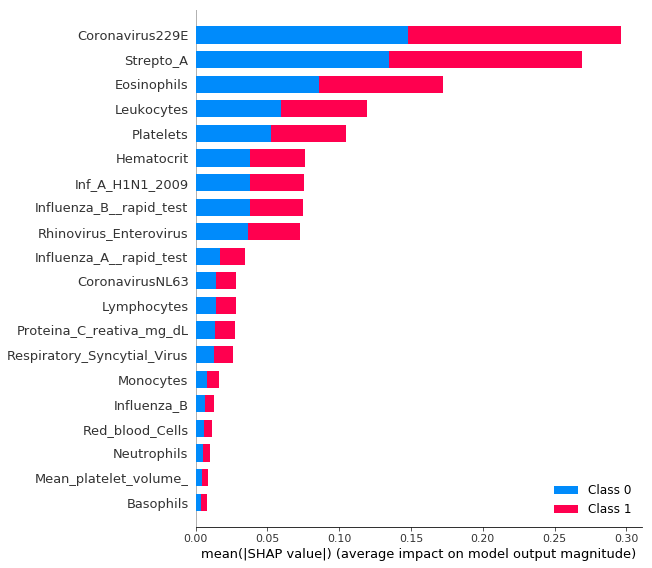

In [23]:
shap.summary_plot(shap_values, valid_x)


Total columns to display: 105


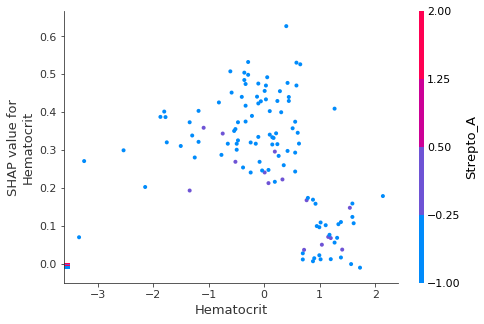

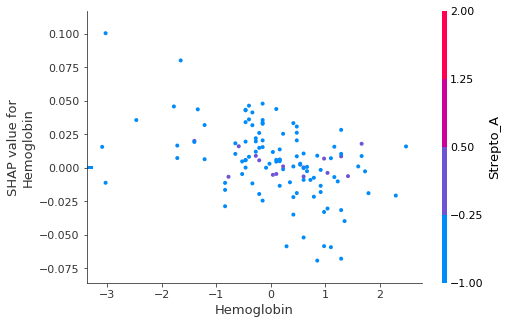

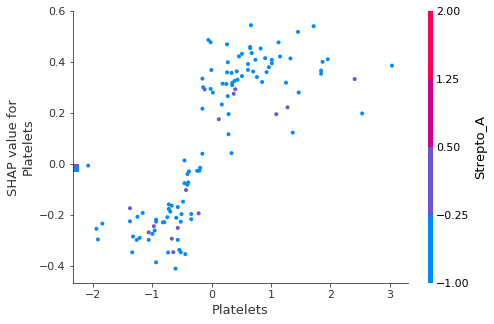

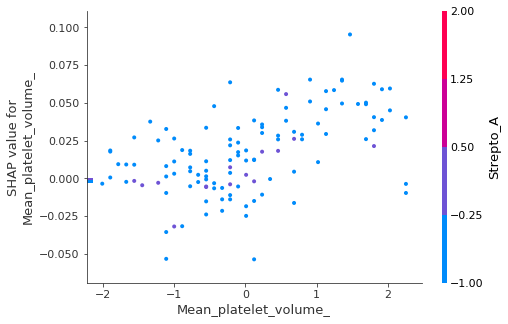

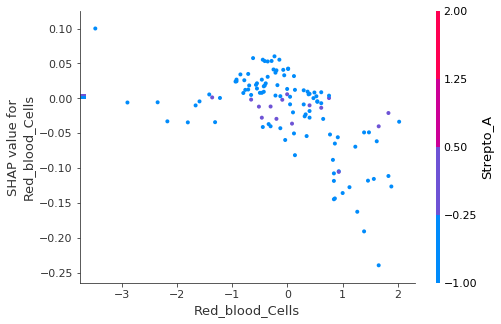

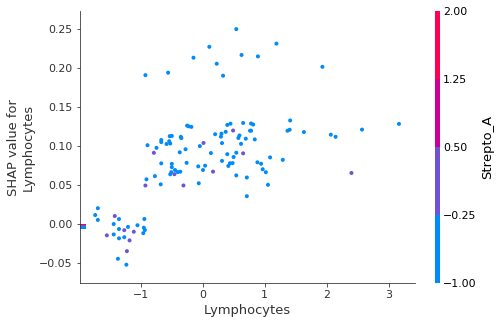

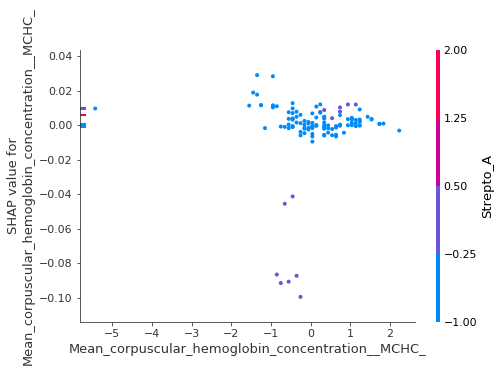

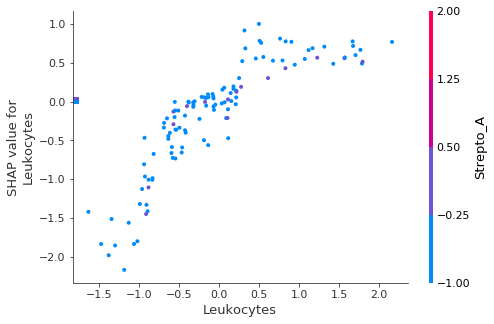

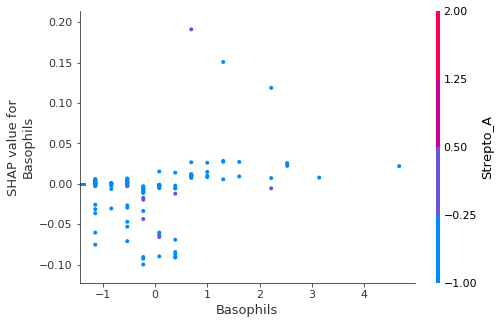

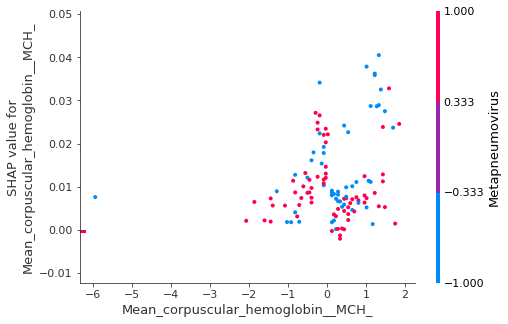

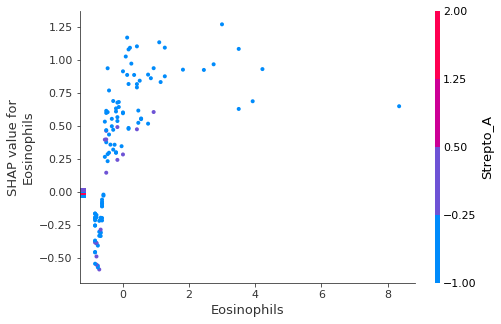

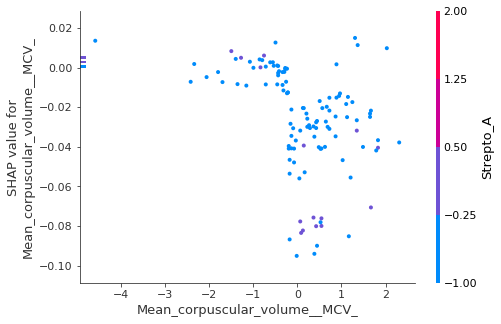

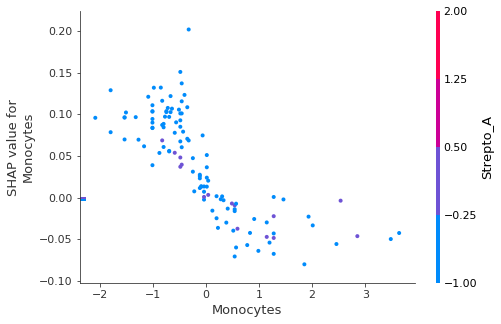

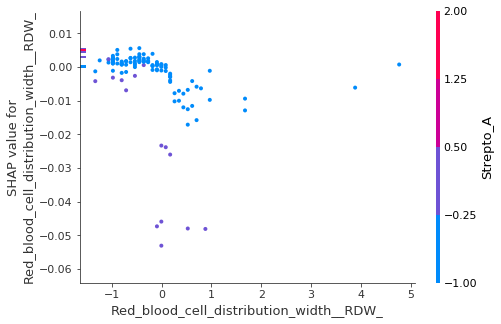

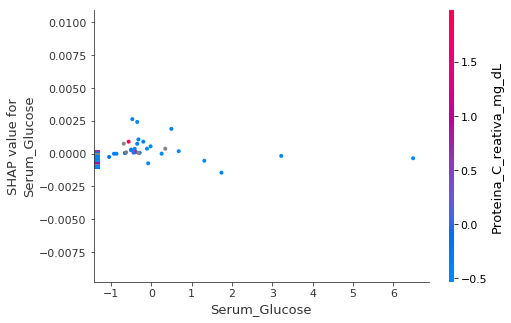

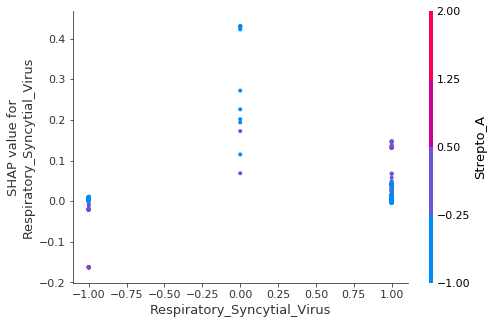

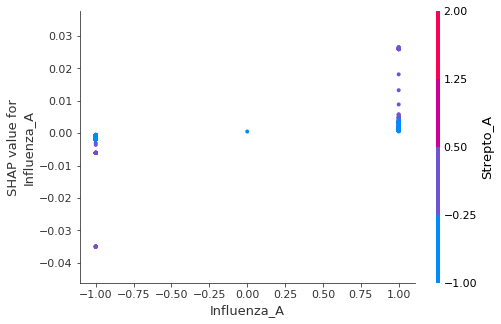

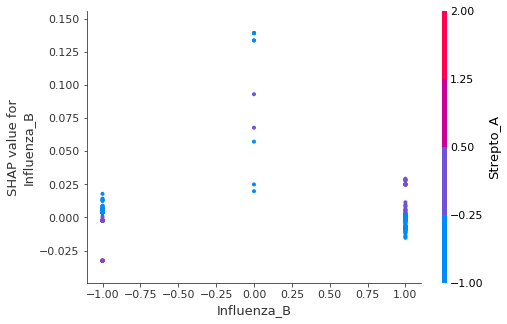

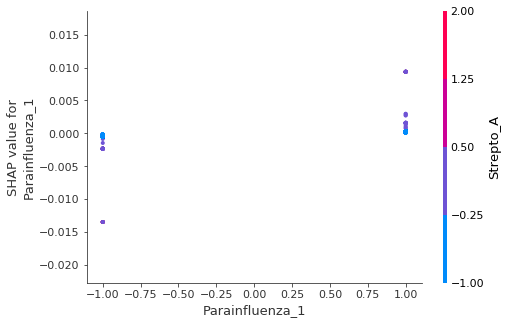

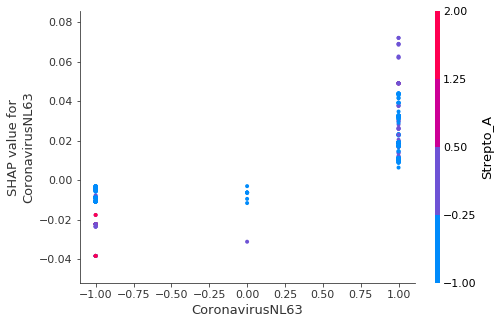

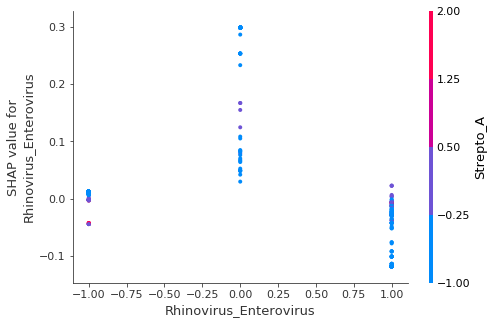

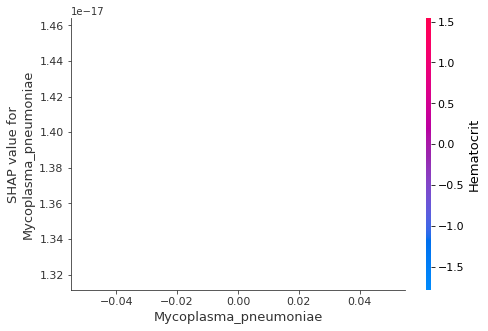

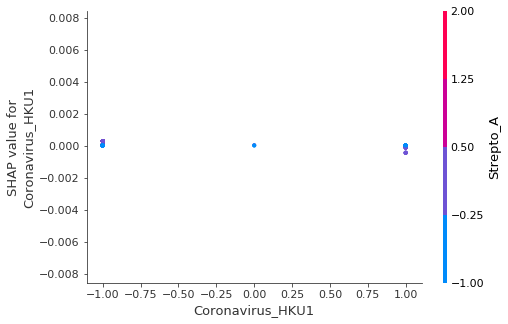

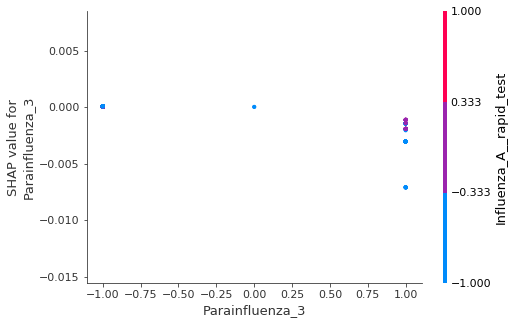

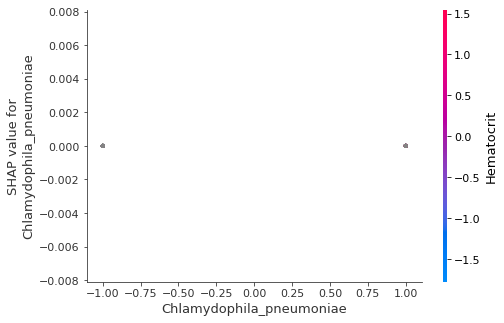

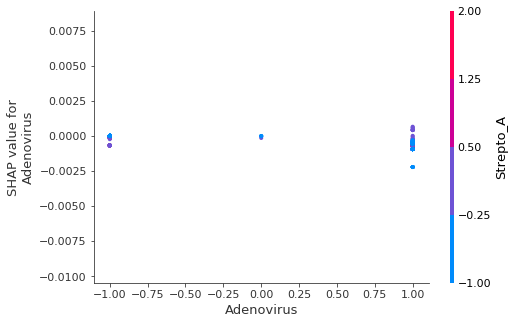

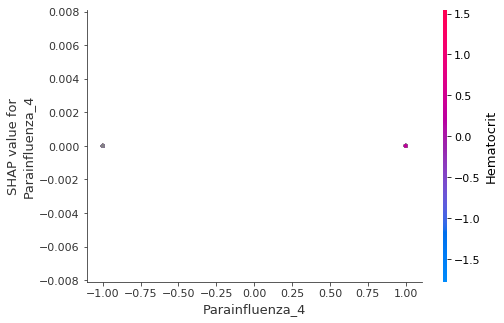

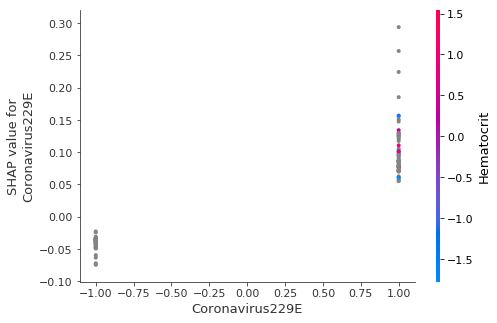

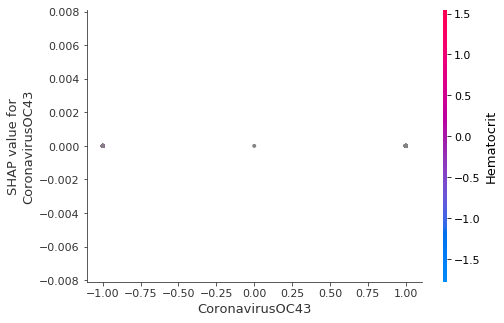

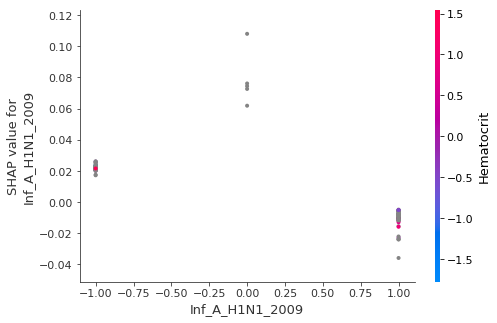

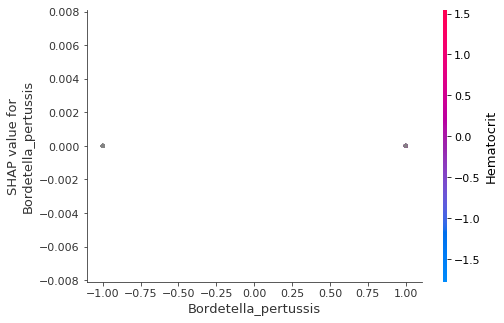

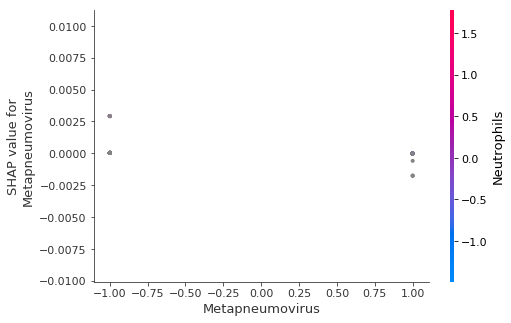

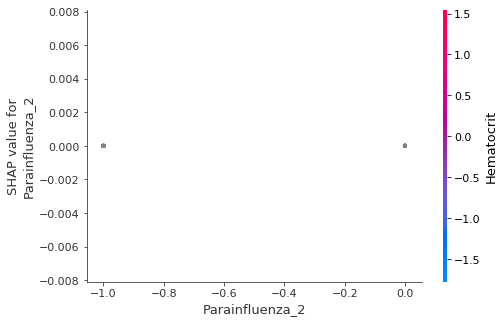

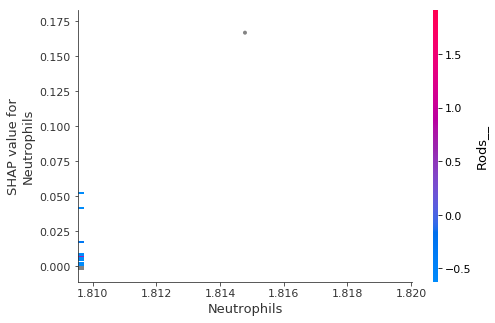

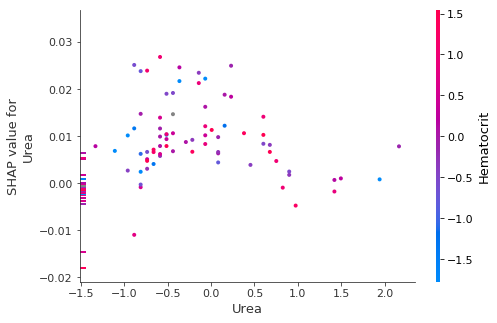

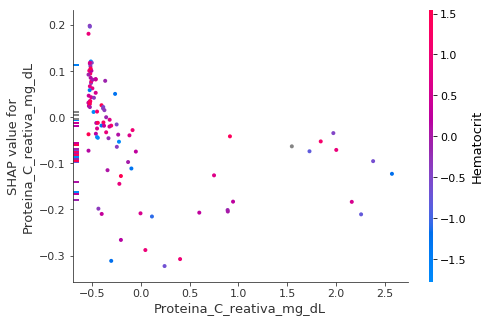

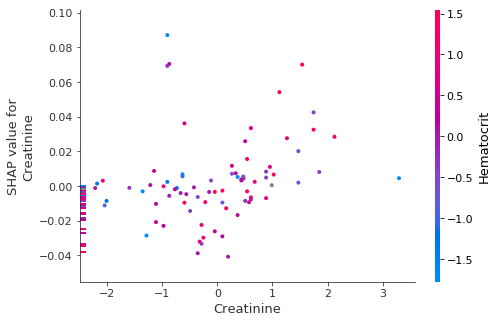

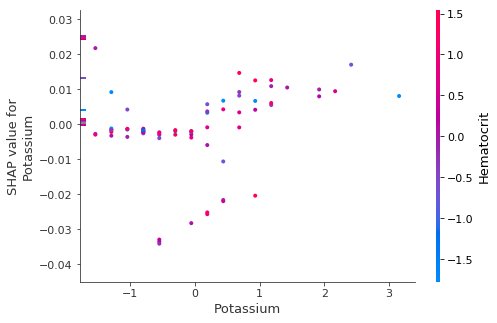

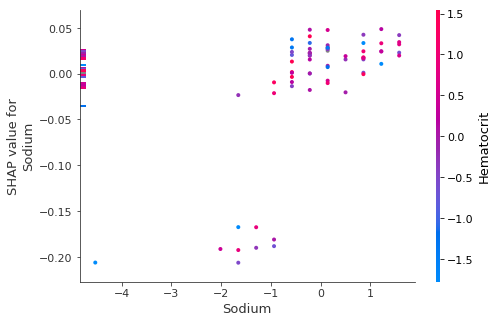

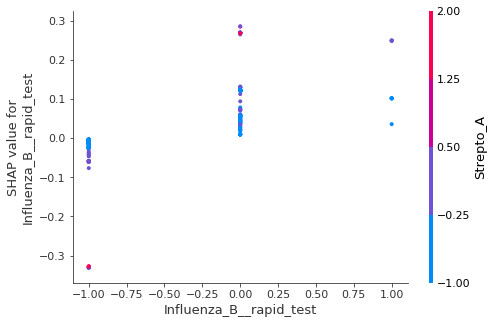

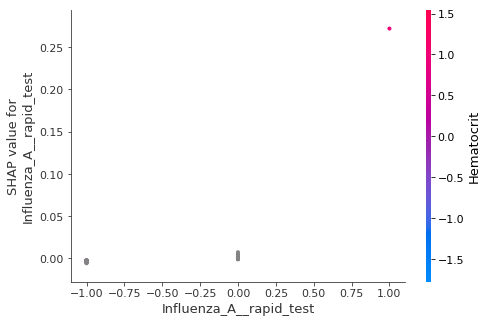

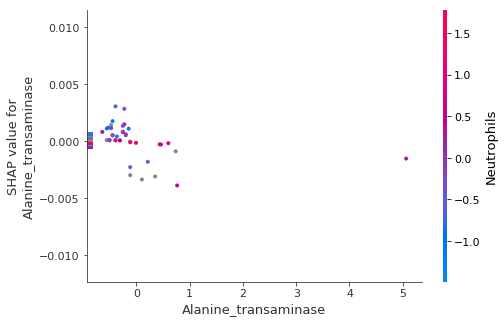

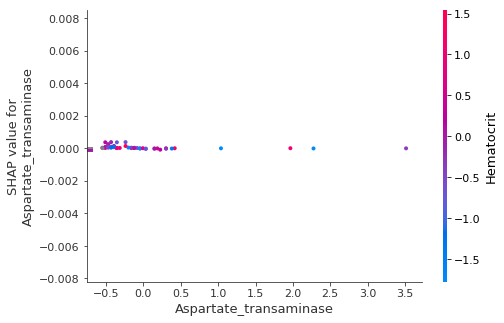

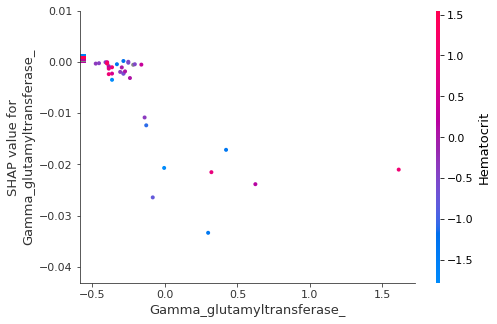

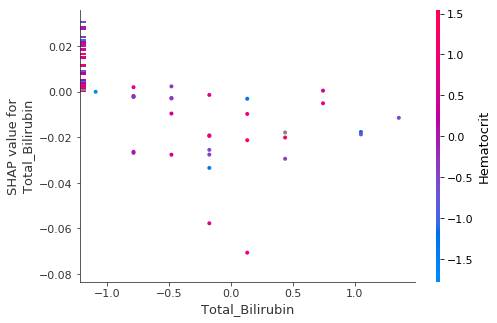

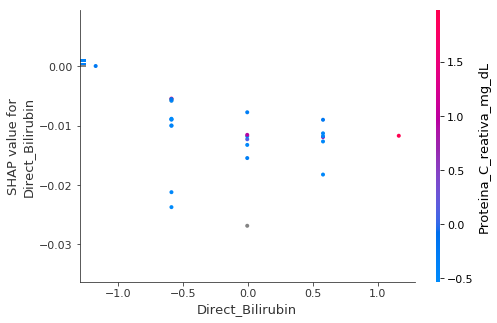

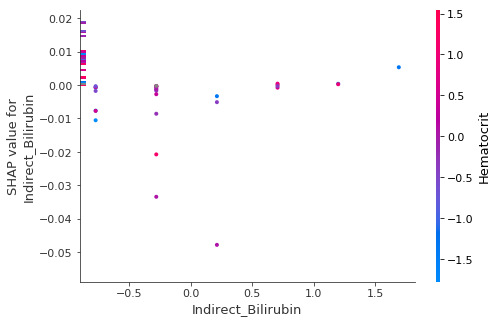

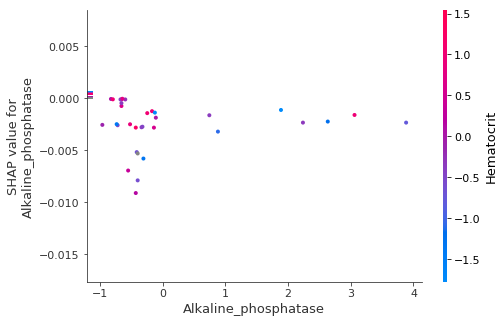

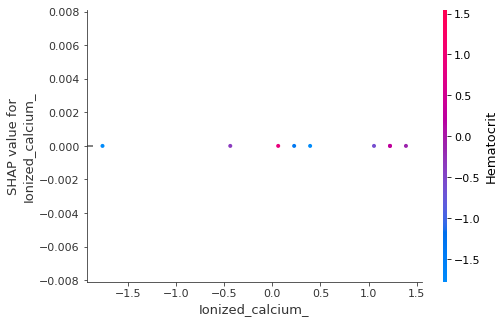

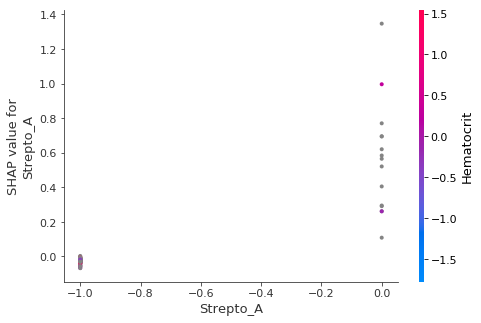

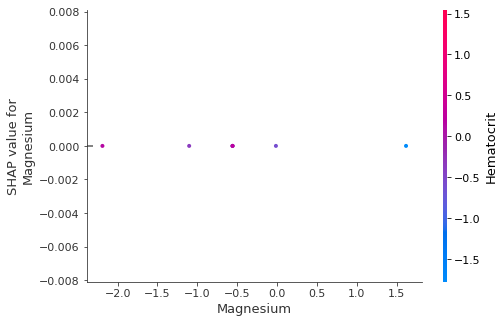

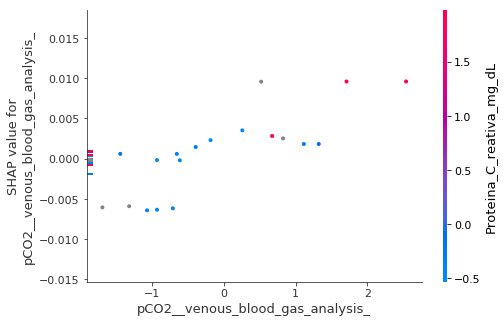

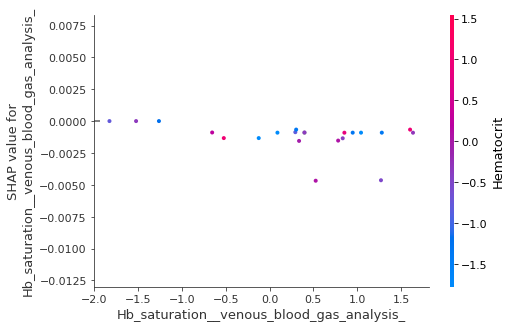

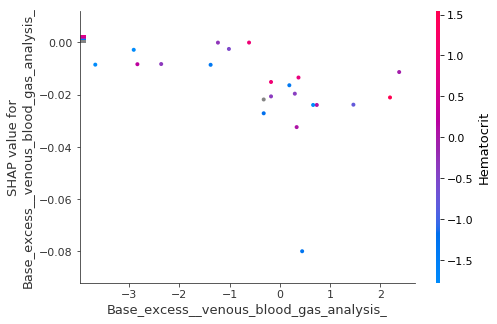

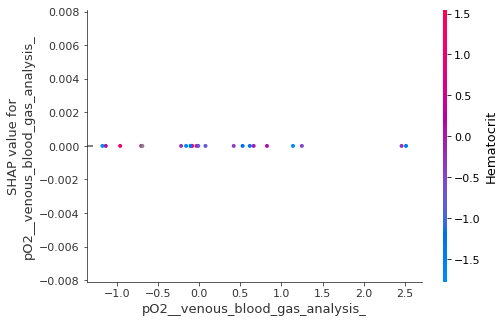

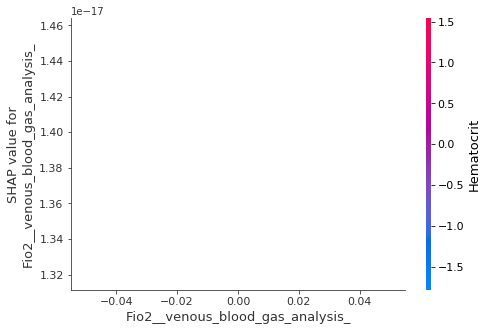

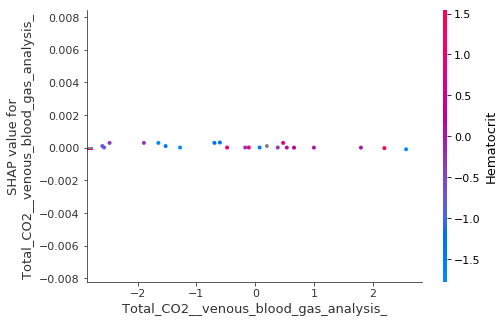

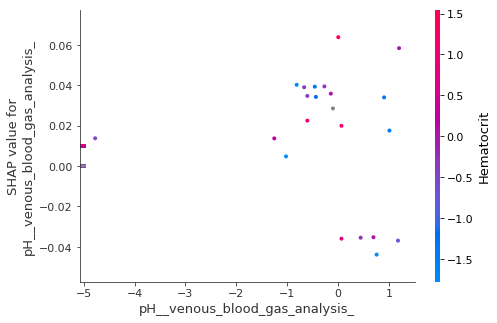

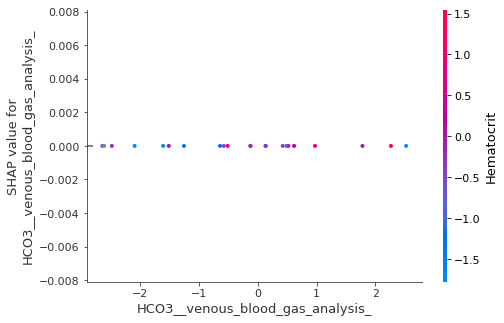

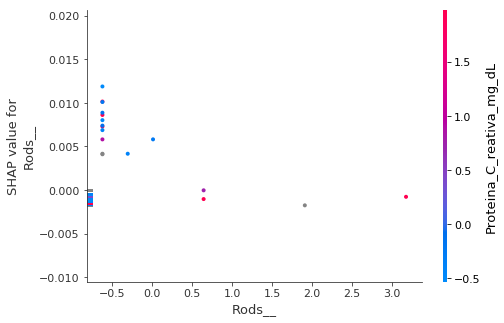

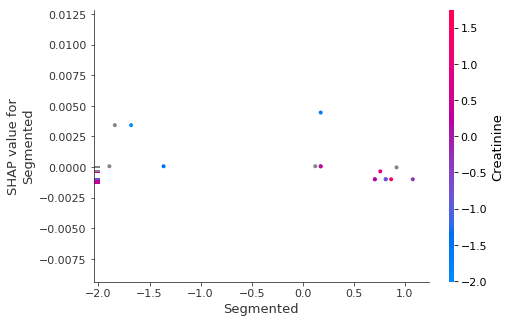

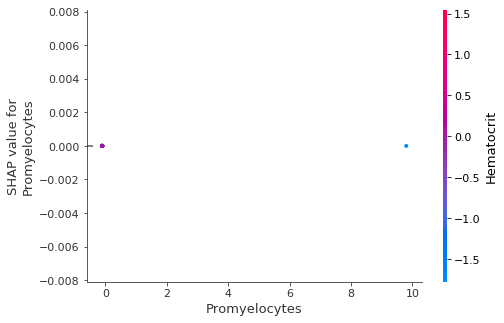

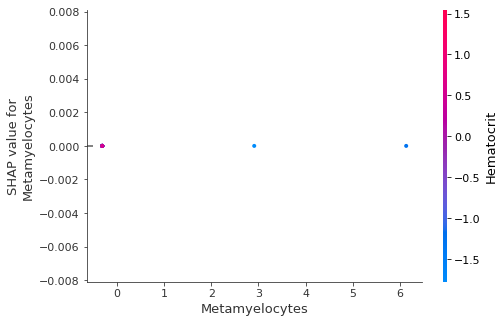

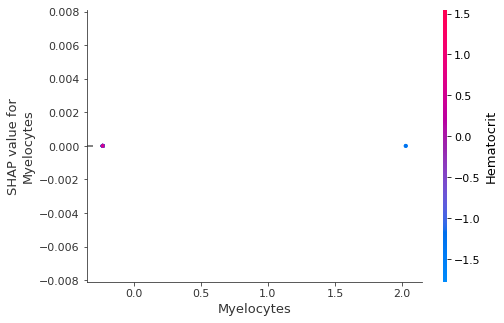

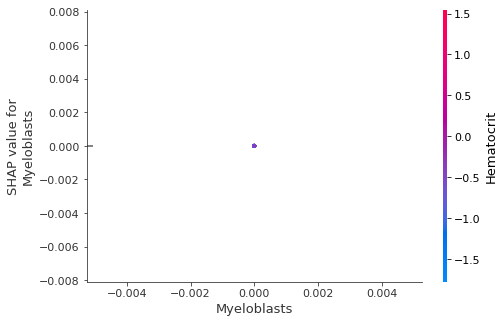

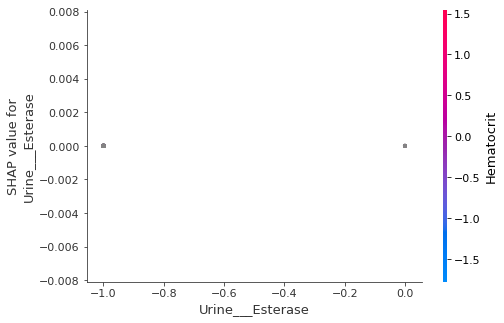

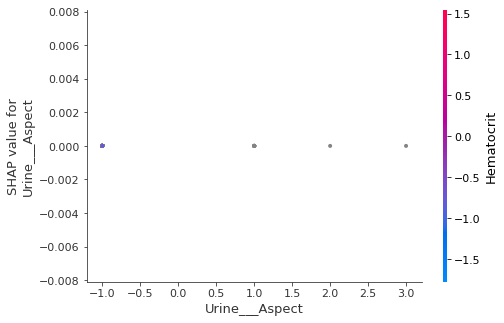

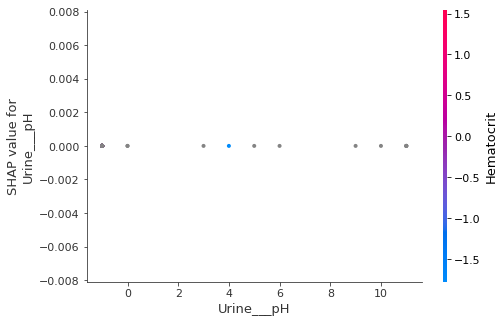

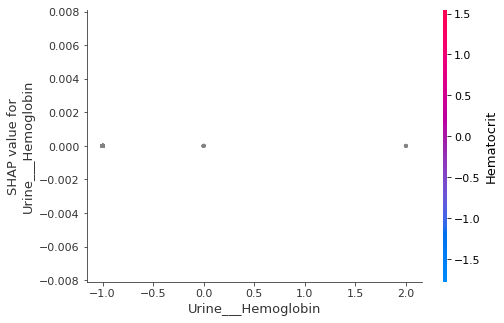

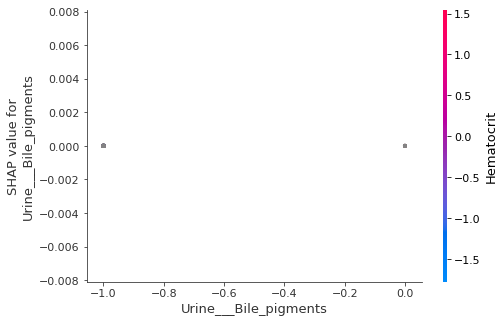

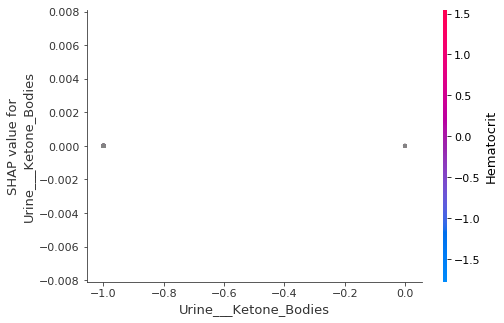

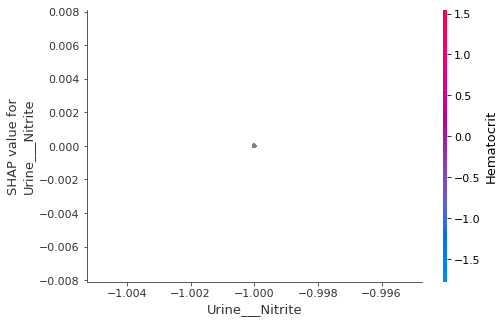

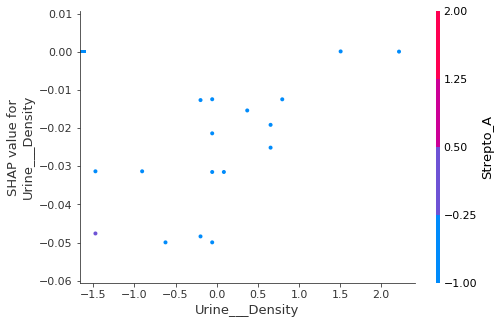

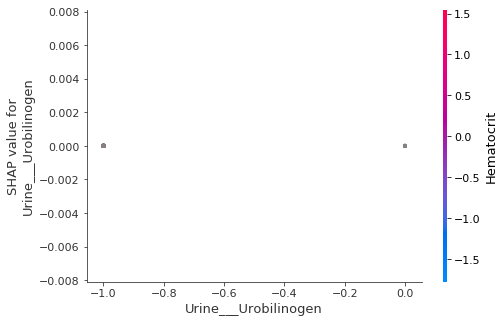

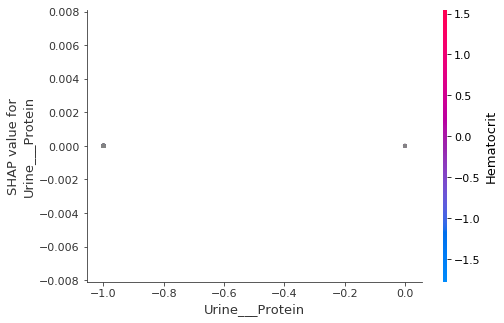

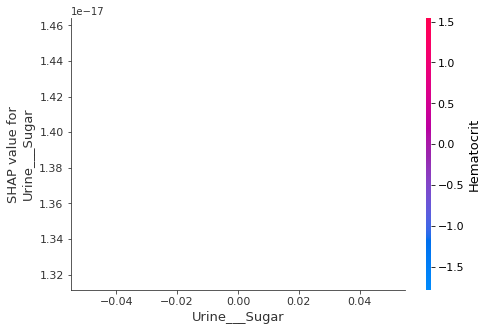

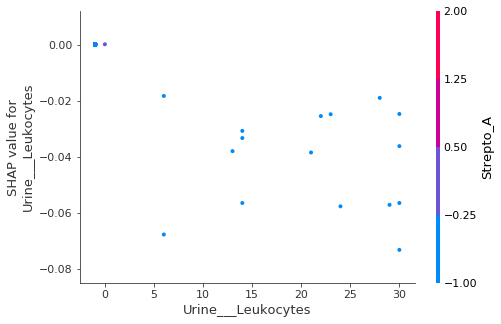

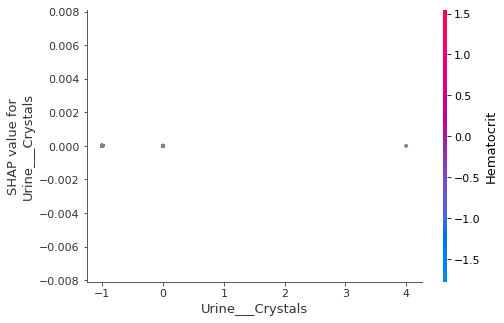

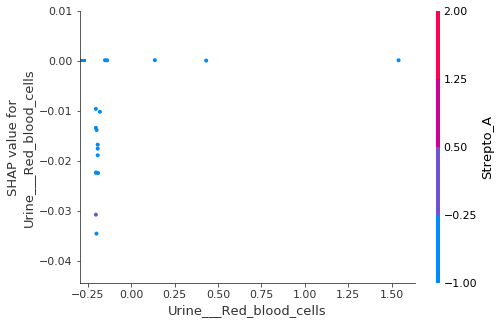

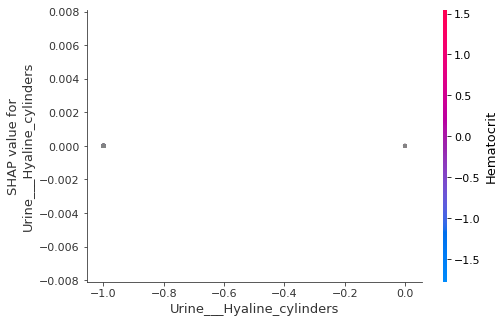

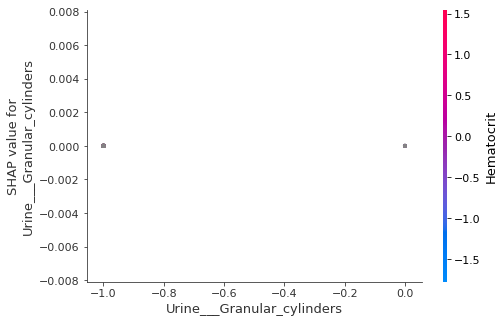

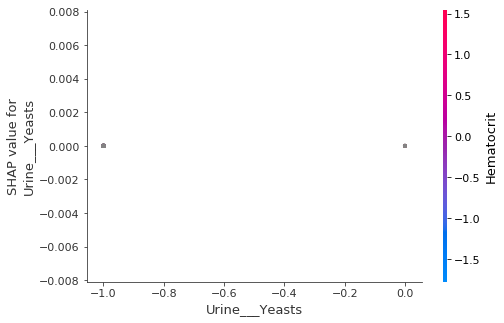

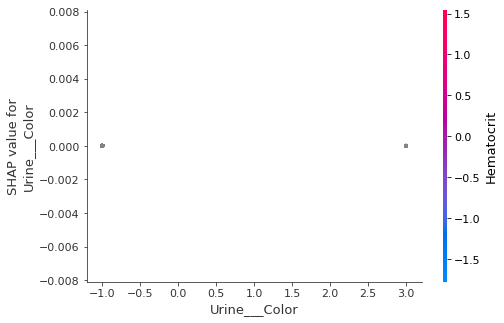

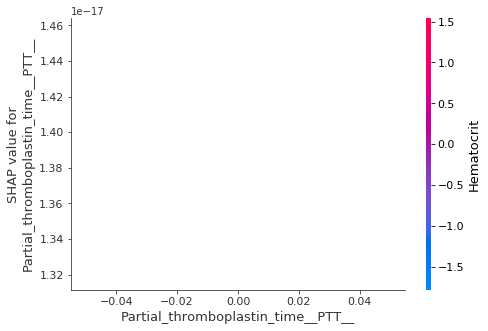

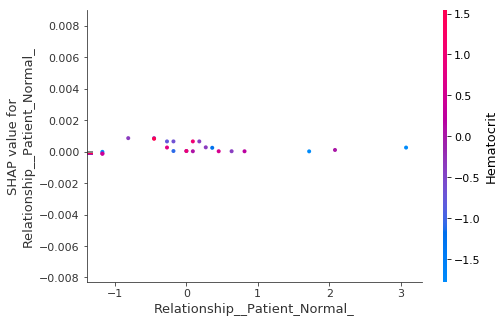

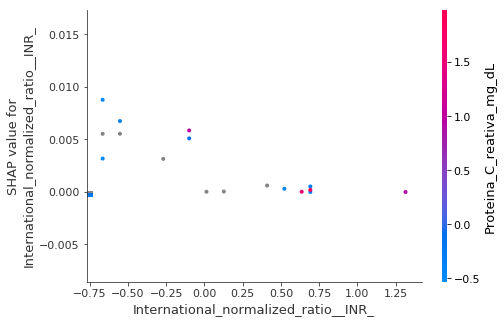

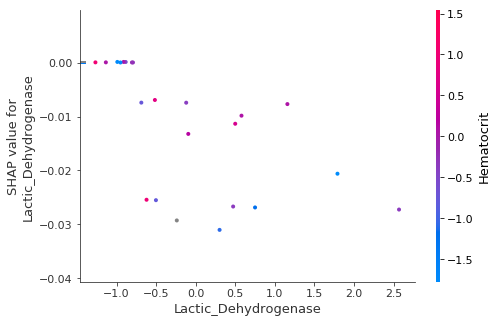

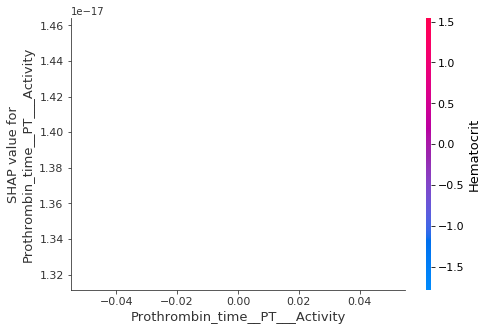

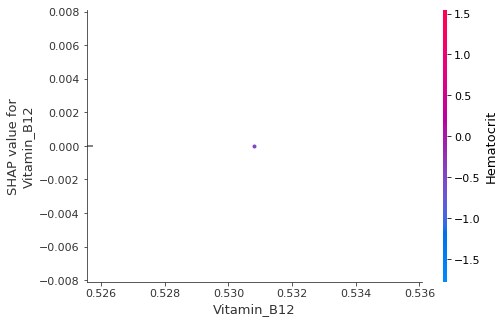

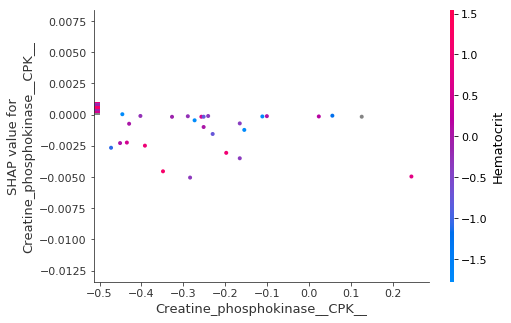

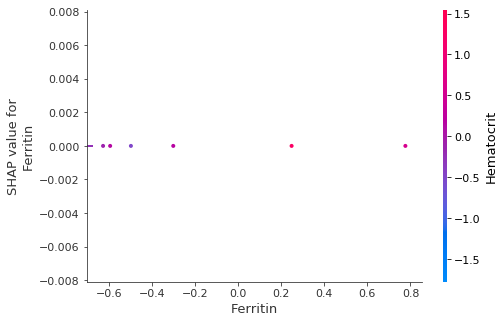

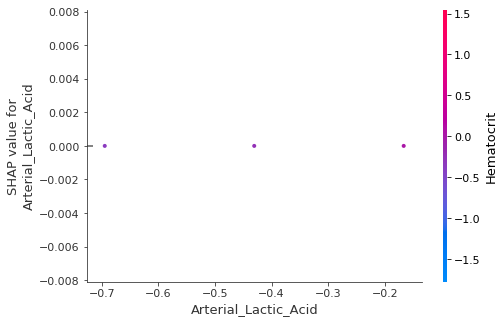

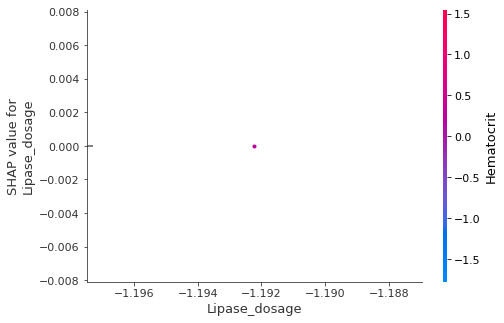

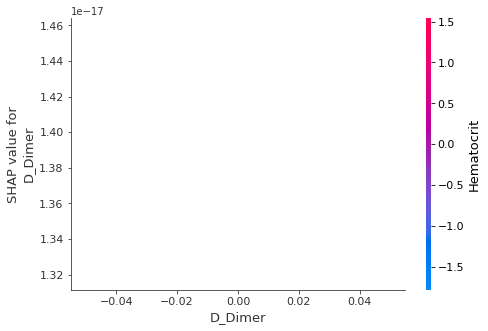

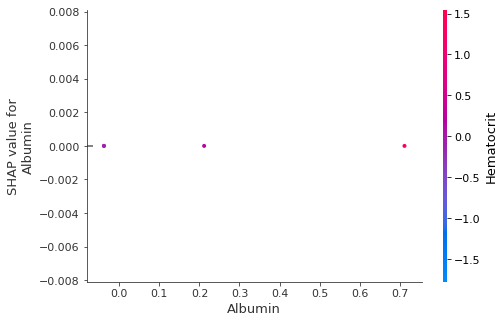

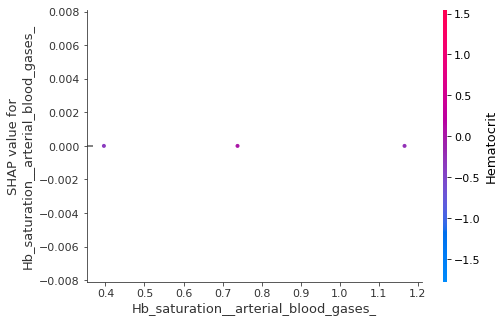

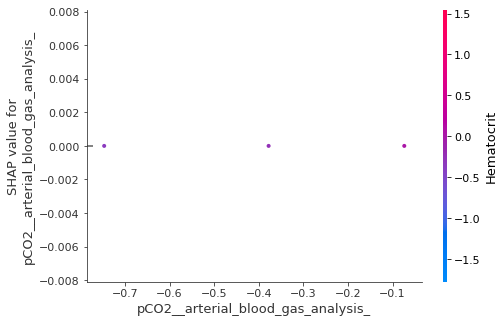

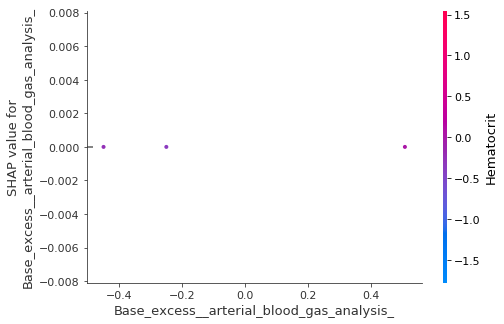

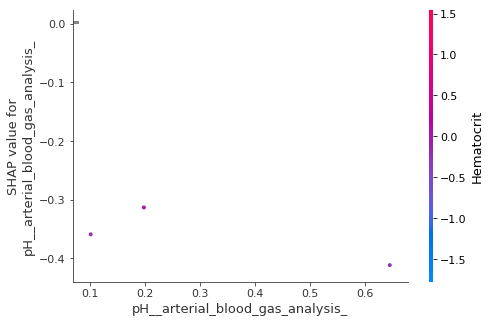

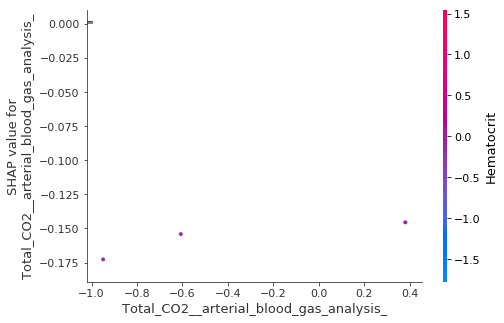

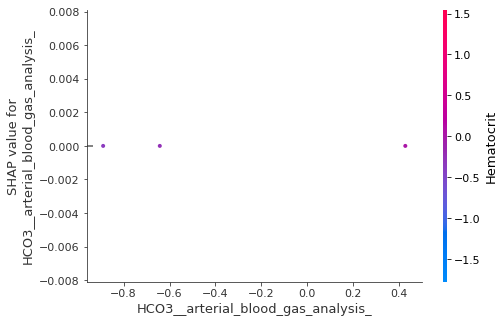

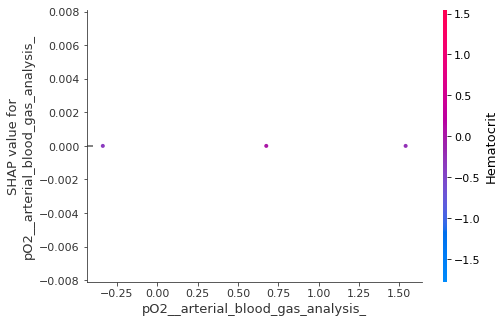

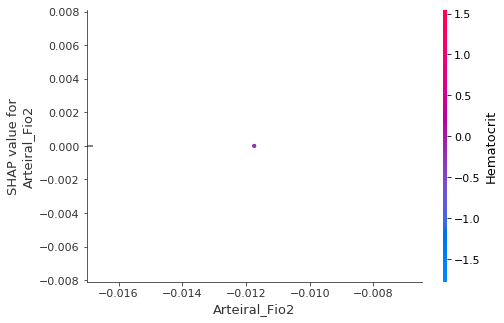

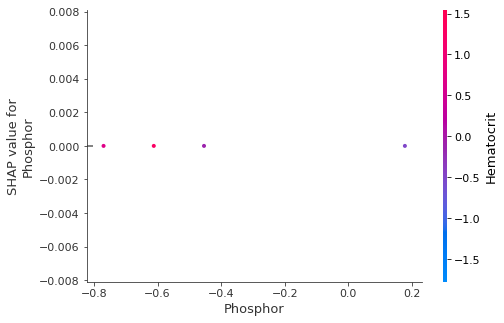

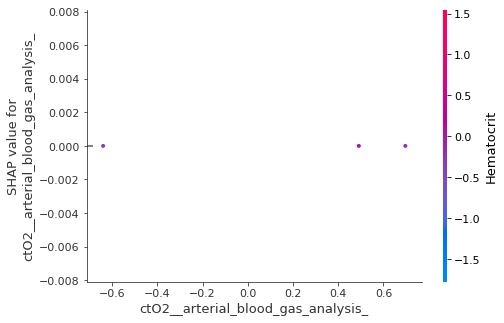

In [24]:
print("Total columns to display:", len(valid_x.columns))
for i in valid_x.columns:
    shap.dependence_plot(i, shap_values[0], valid_x)
    plt.show()

Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.


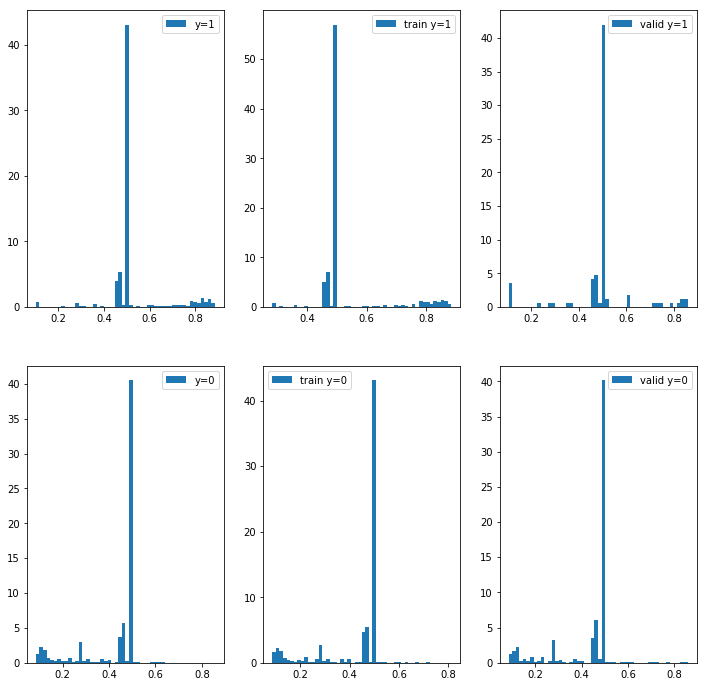

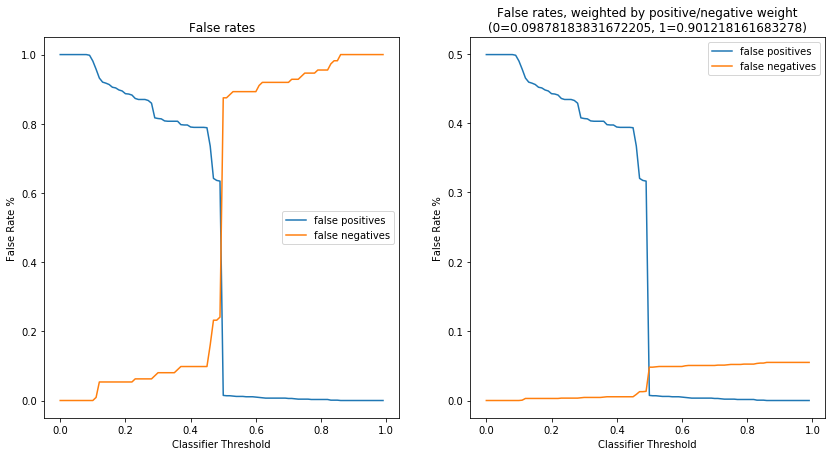

In [25]:
plt.figure(figsize=(12,12))
plt.subplot(2,3,1)
plt.hist(lgbm.predict(x[y==1]), label='y=1', bins=50, density=True)
plt.legend()
plt.subplot(2,3,2)
plt.hist(lgbm.predict(train_x[y==1]), label='train y=1', bins=50, density=True)
plt.legend()
plt.subplot(2,3,3)
plt.hist(lgbm.predict(valid_x[y==1]), label='valid y=1', bins=50, density=True)
plt.legend()

plt.subplot(2,3,4)
plt.hist(lgbm.predict(x[y==0]), label='y=0', bins=50, density=True)
plt.legend()
plt.subplot(2,3,5)
plt.hist(lgbm.predict(train_x[y==0]), label='train y=0', bins=50, density=True)
plt.legend()
plt.subplot(2,3,6)
plt.hist(lgbm.predict(valid_x[y==0]), label='valid y=0', bins=50, density=True)
plt.legend()
plt.show()

create_threshold_chart(
    y_hat=lgbm.predict(valid_x),
    y=valid_y,
    weight={0:1-positive_weight, 1:positive_weight}
)

# Let's test other tasks

TASK:  Patient_addmited_to_regular_ward__1_yes__0_no_ 


elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
Found `n_estimators` in params. Will use it instead of argument


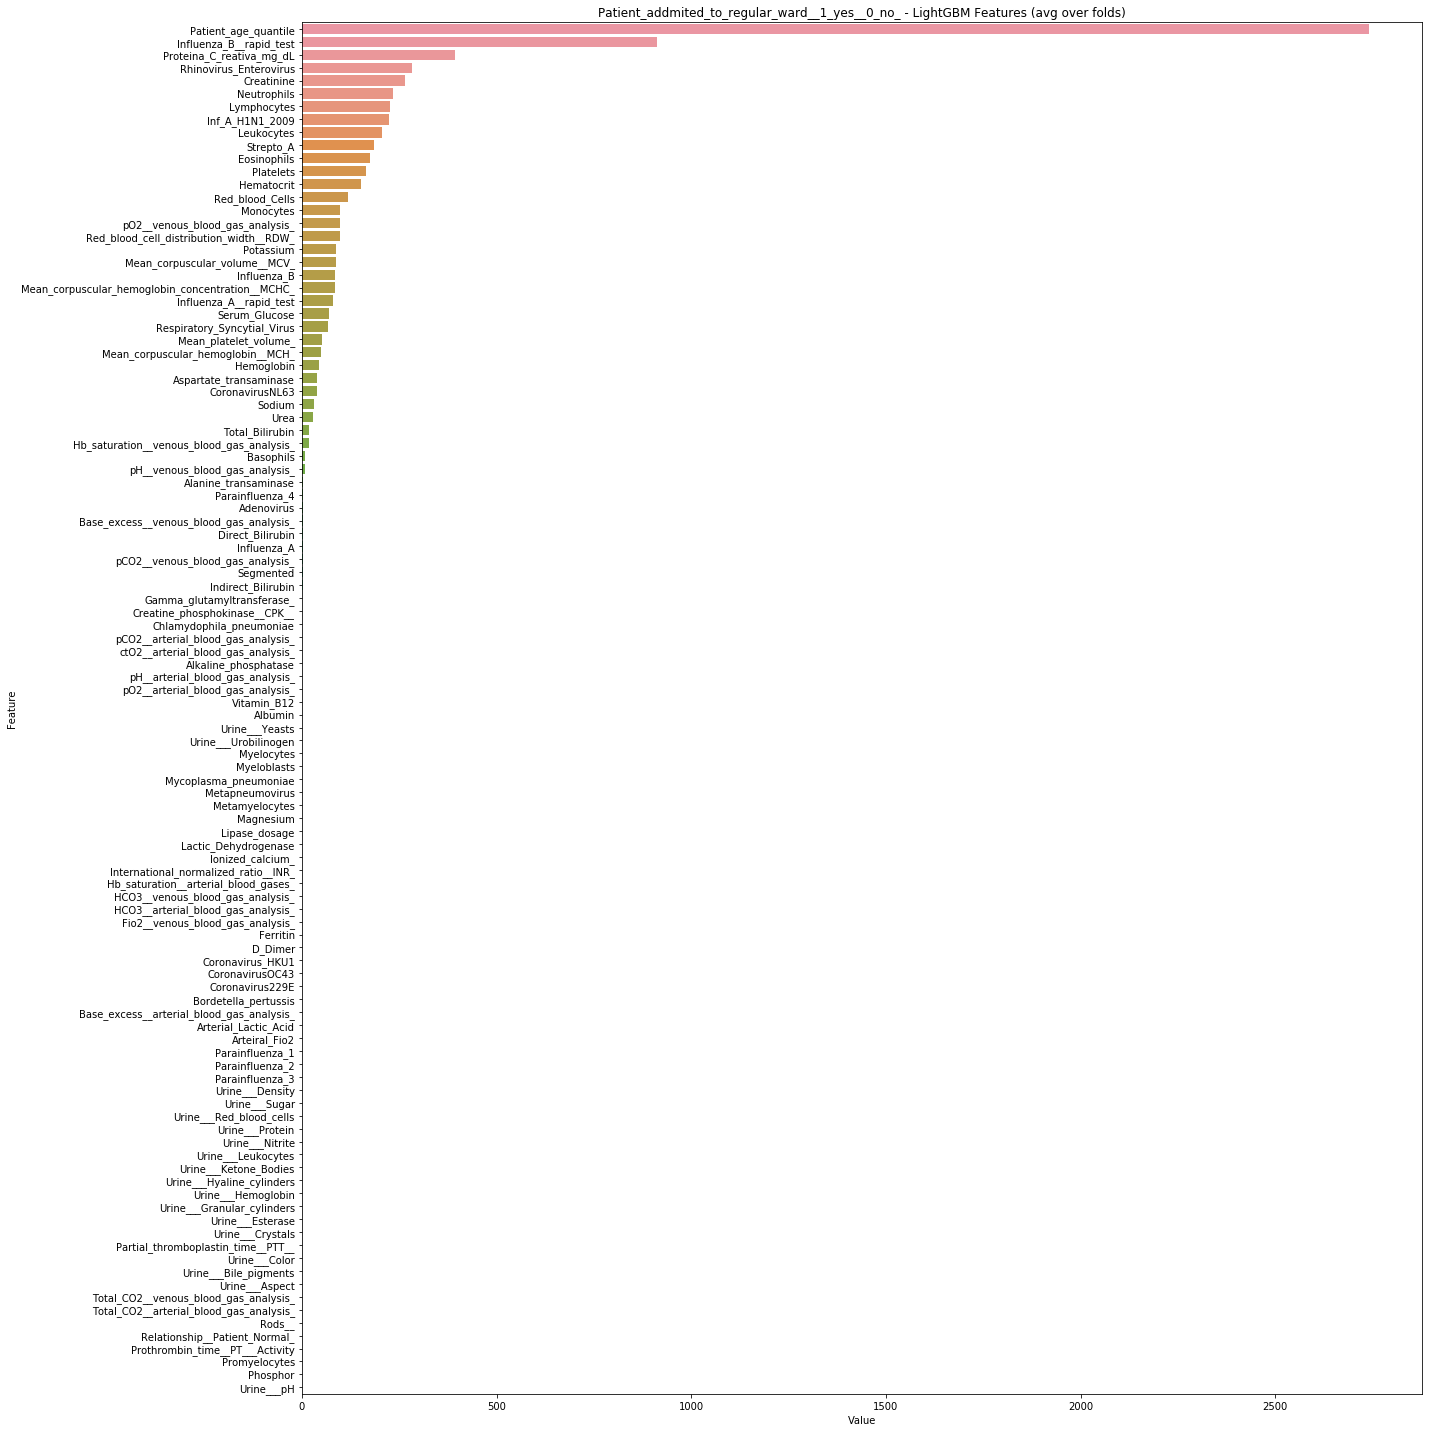

Setting feature_perturbation = "tree_path_dependent" because no background data was given.
LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


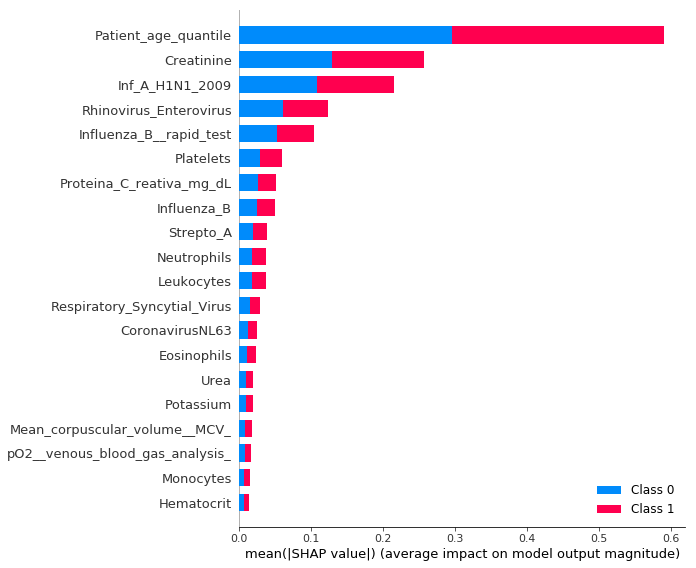

Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.


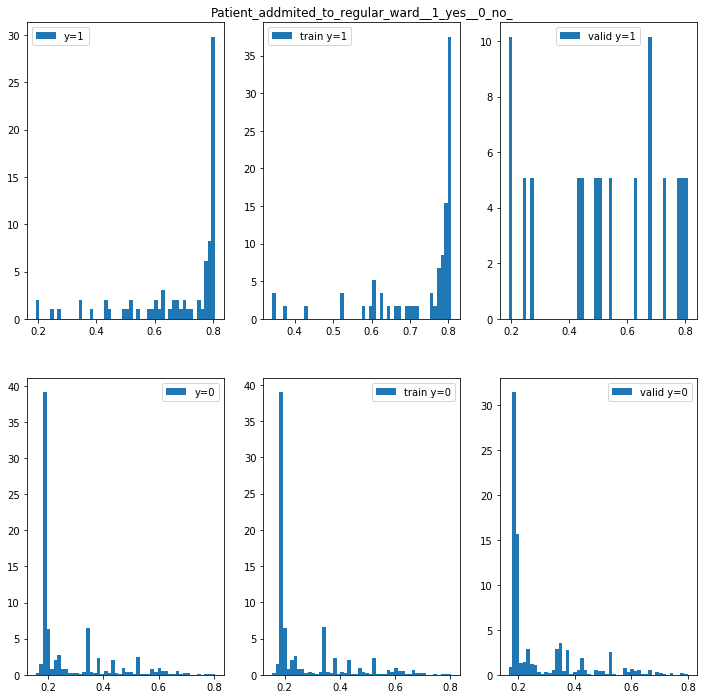

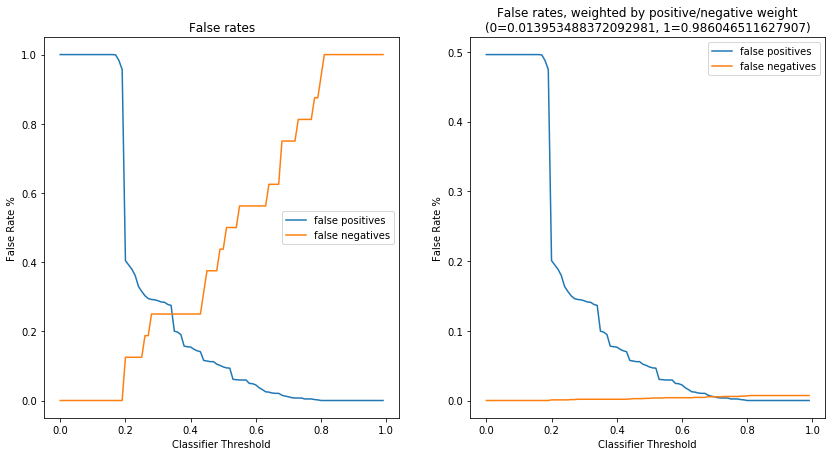

TASK:  Patient_addmited_to_semi_intensive_unit__1_yes__0_no_ 


elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
Found `n_estimators` in params. Will use it instead of argument


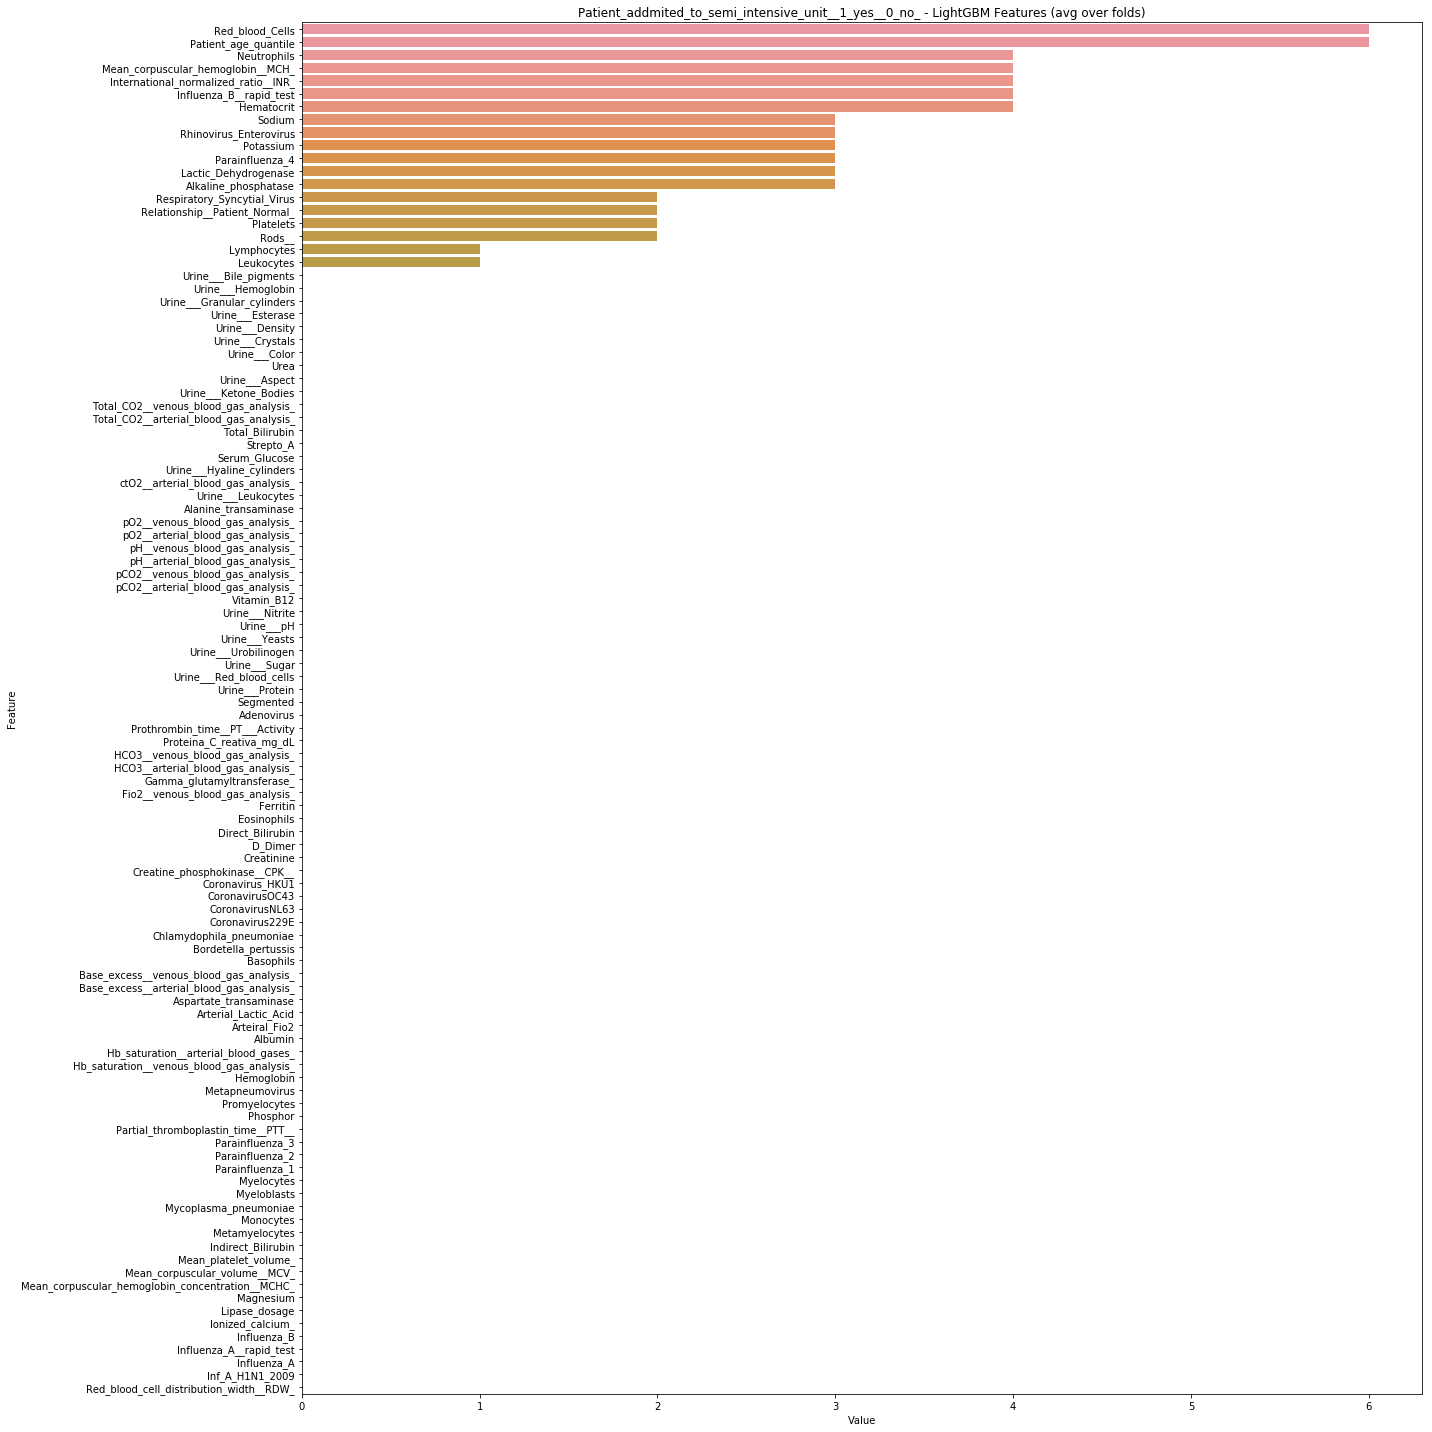

Setting feature_perturbation = "tree_path_dependent" because no background data was given.
LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


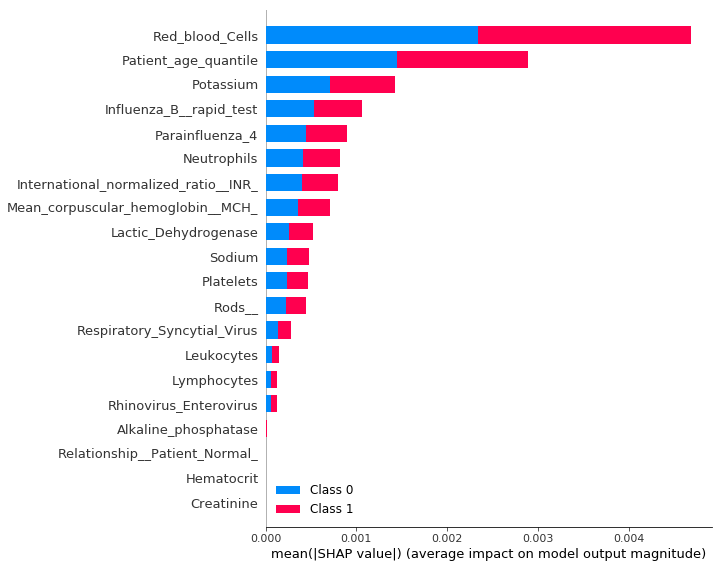

Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.


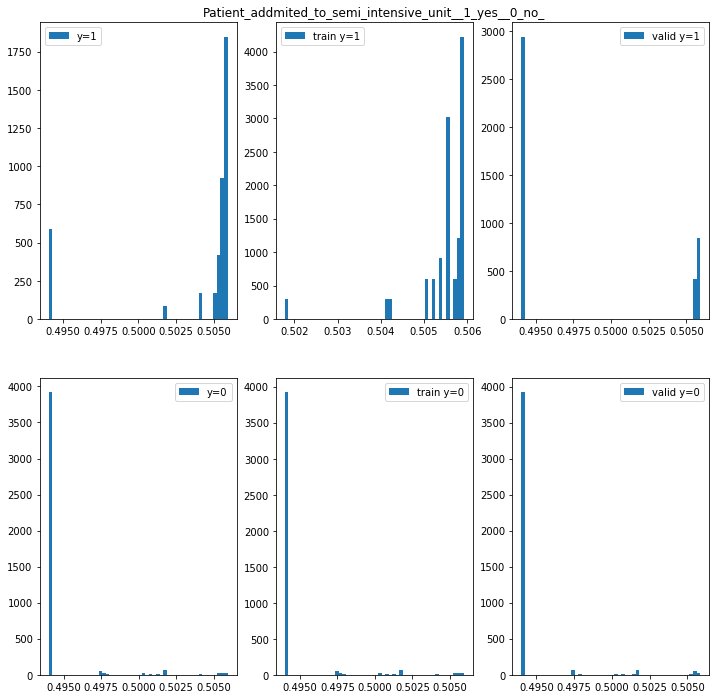

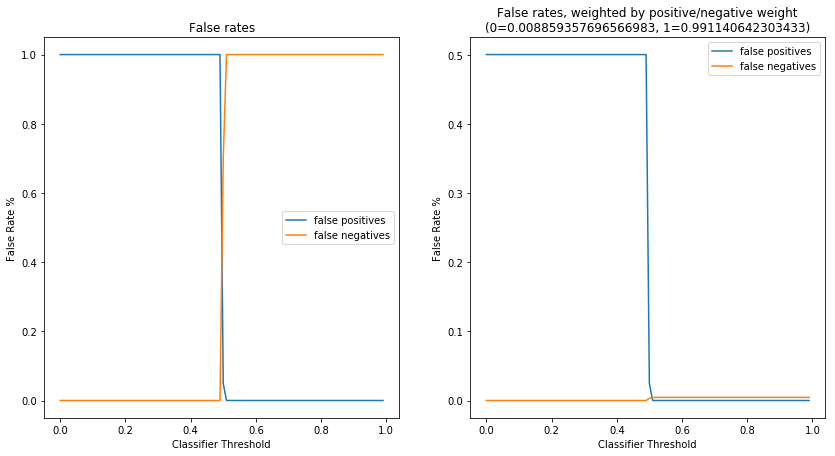

TASK:  Patient_addmited_to_intensive_care_unit__1_yes__0_no_ 


elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
Found `n_estimators` in params. Will use it instead of argument


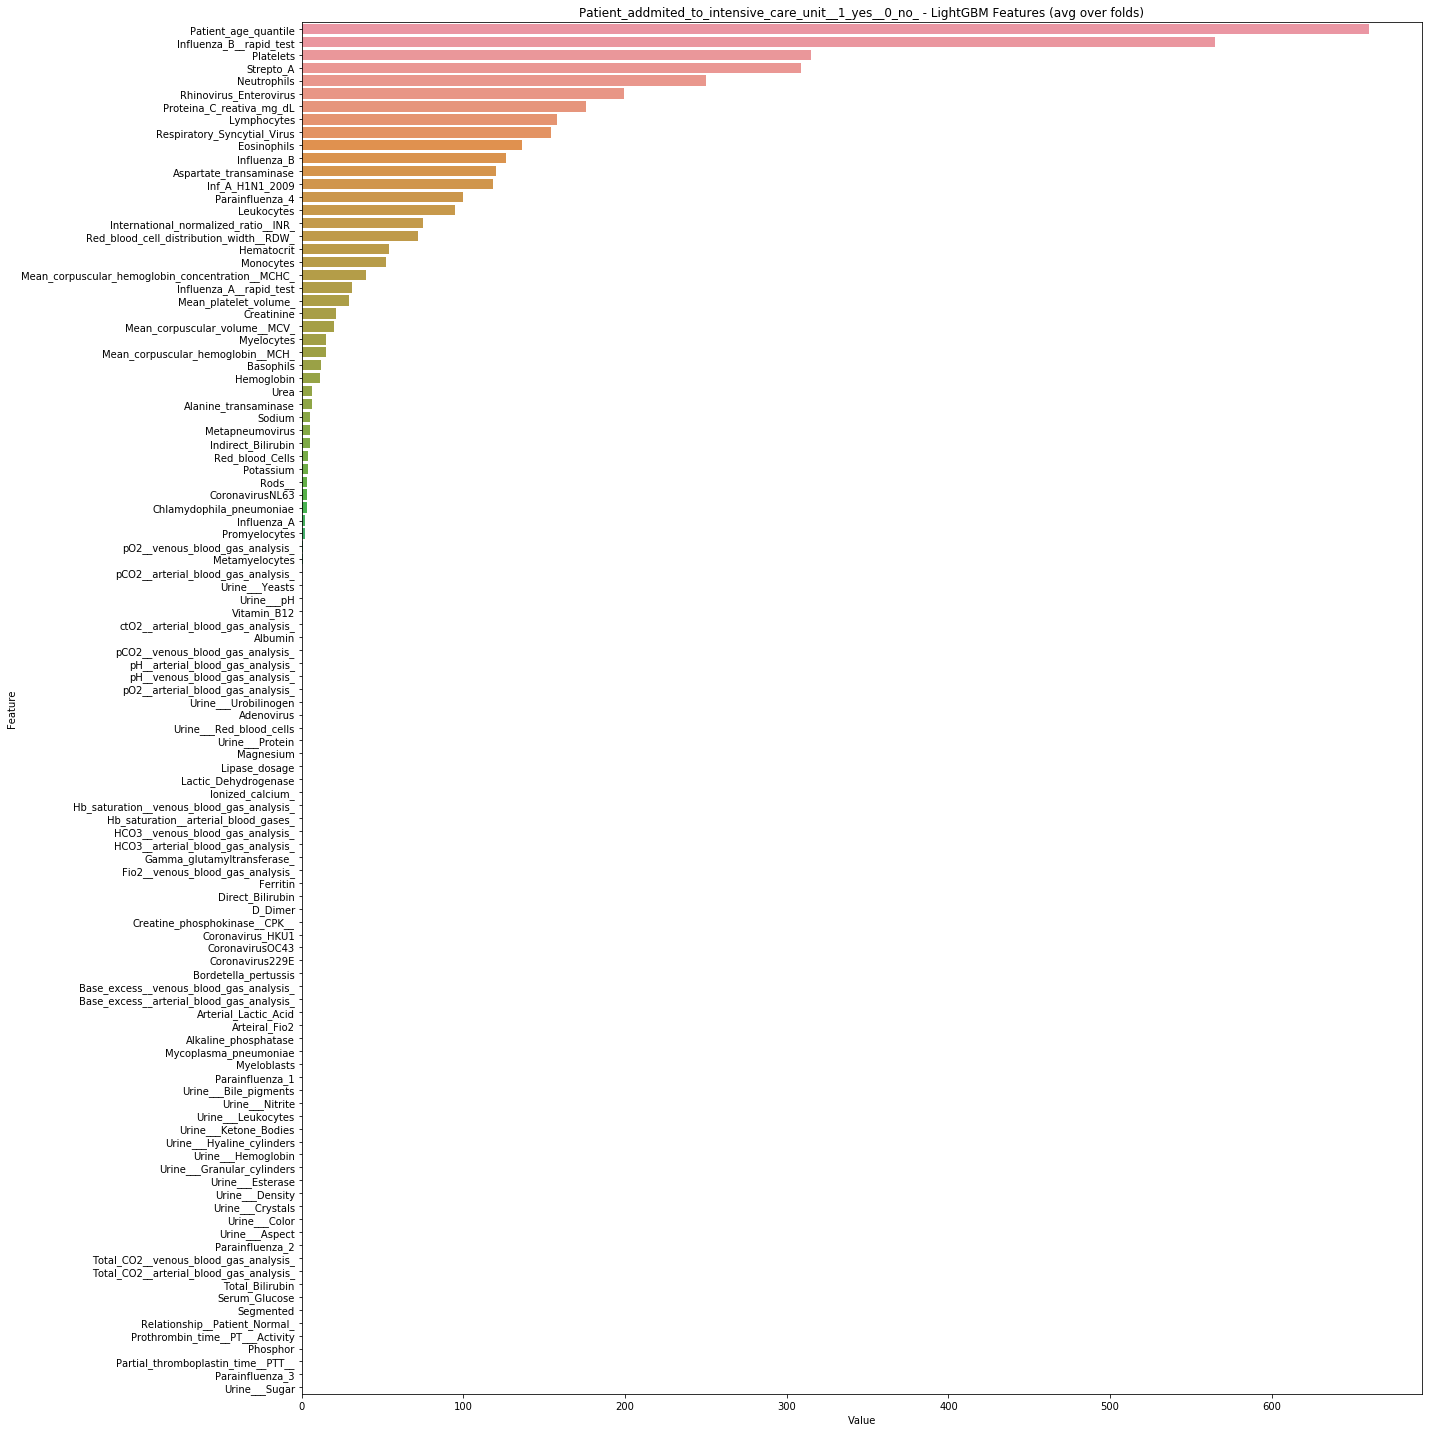

Setting feature_perturbation = "tree_path_dependent" because no background data was given.
LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


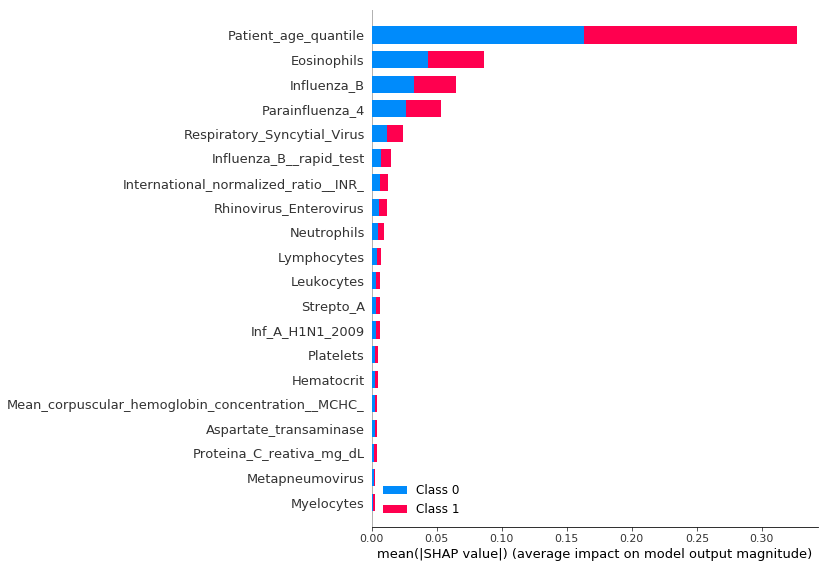

Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.


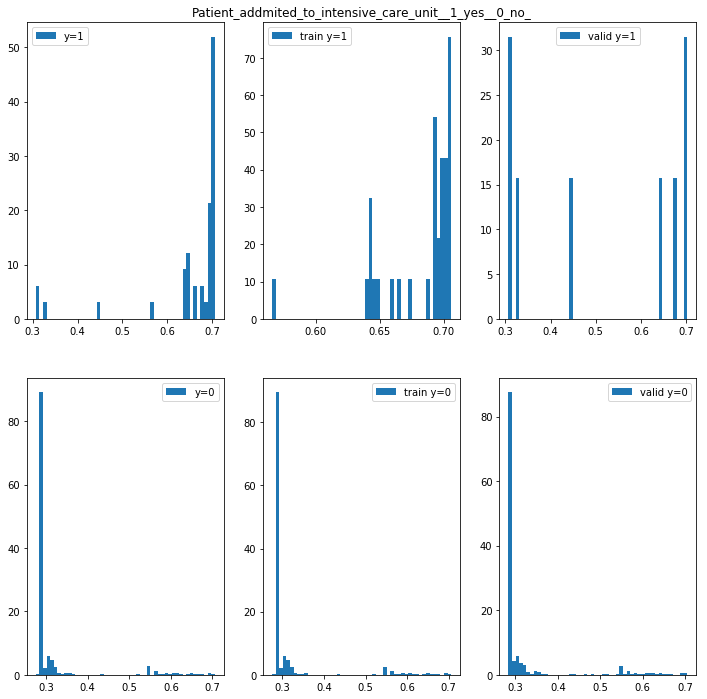

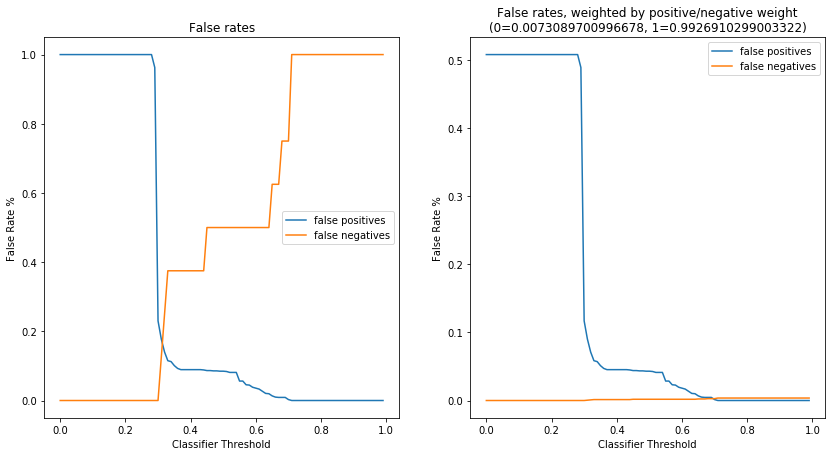

TASK:  Patient_addmited_to_regular_ward__1_yes__0_no_ without age column


elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
Found `n_estimators` in params. Will use it instead of argument


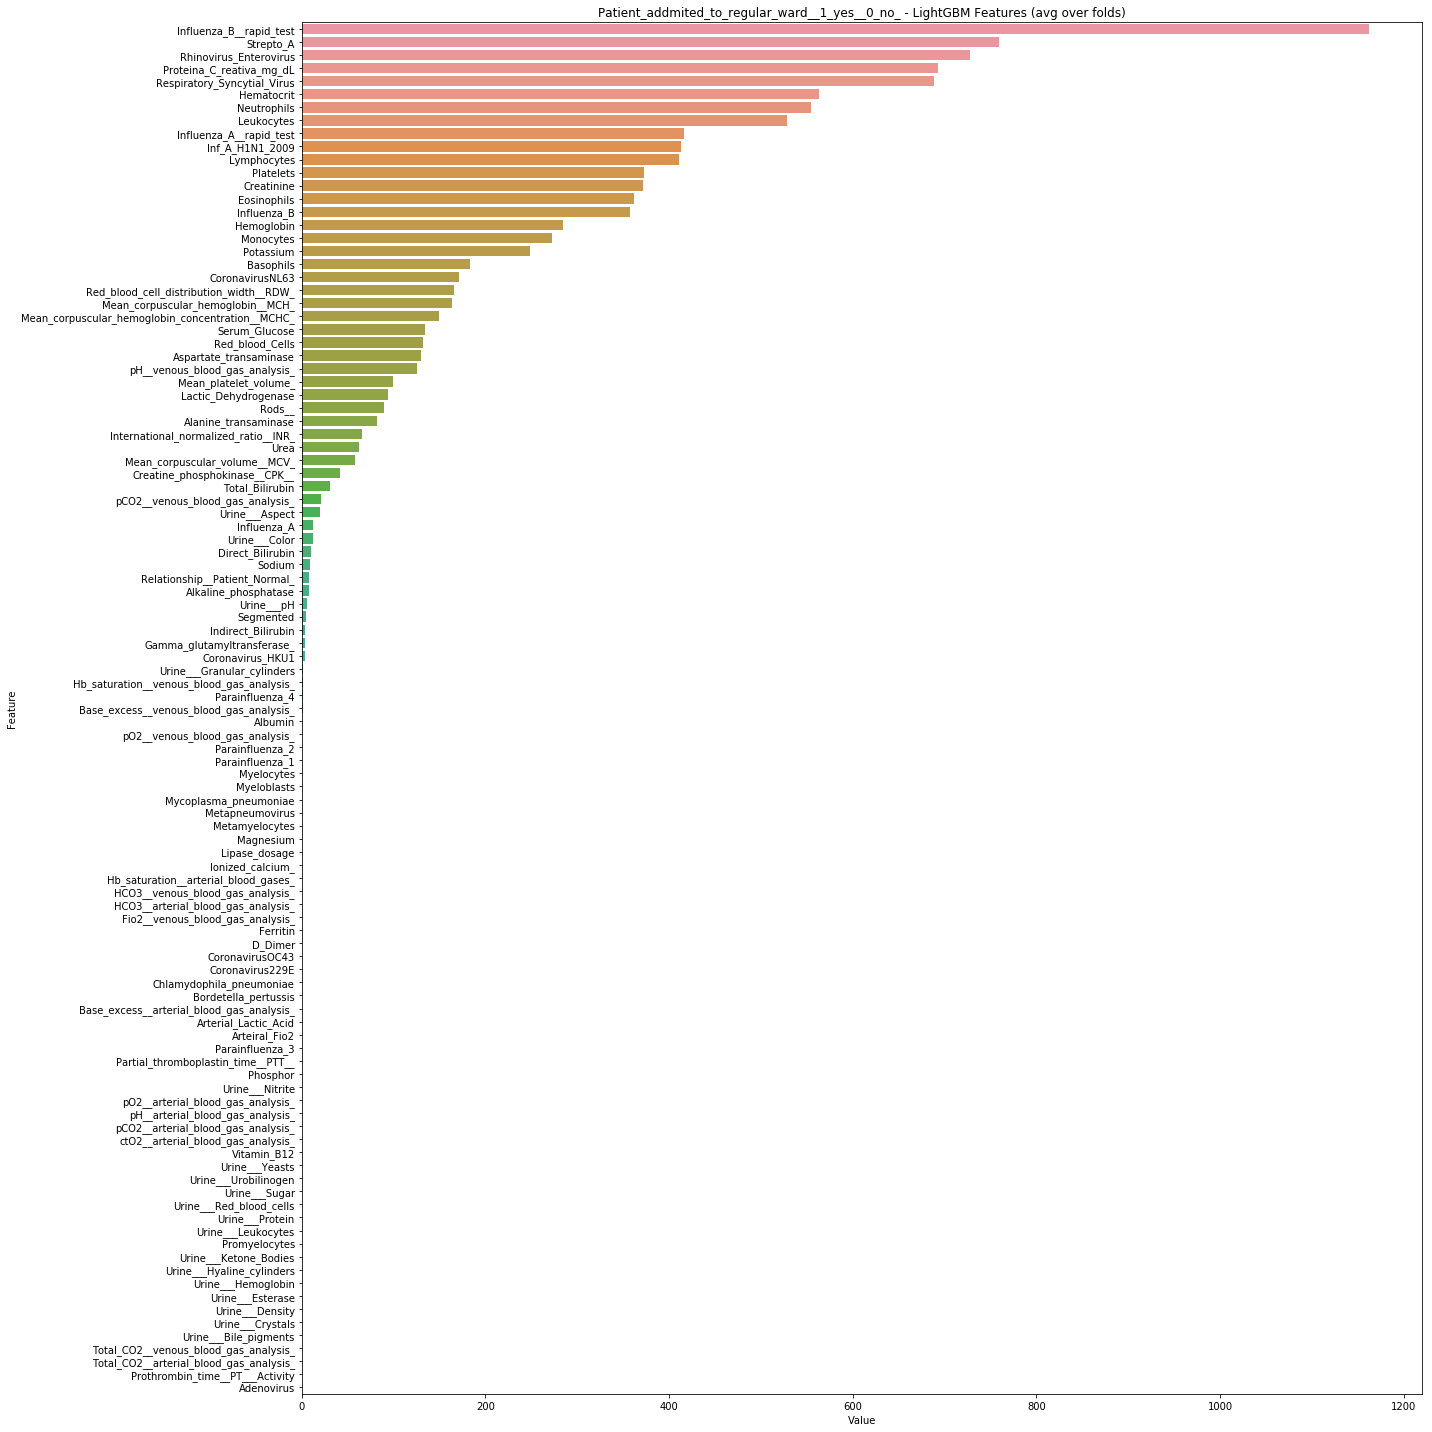

Setting feature_perturbation = "tree_path_dependent" because no background data was given.
LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


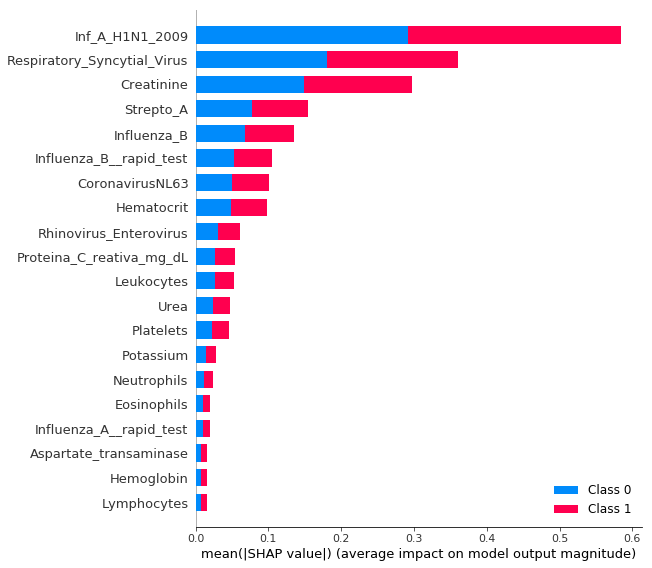

Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.


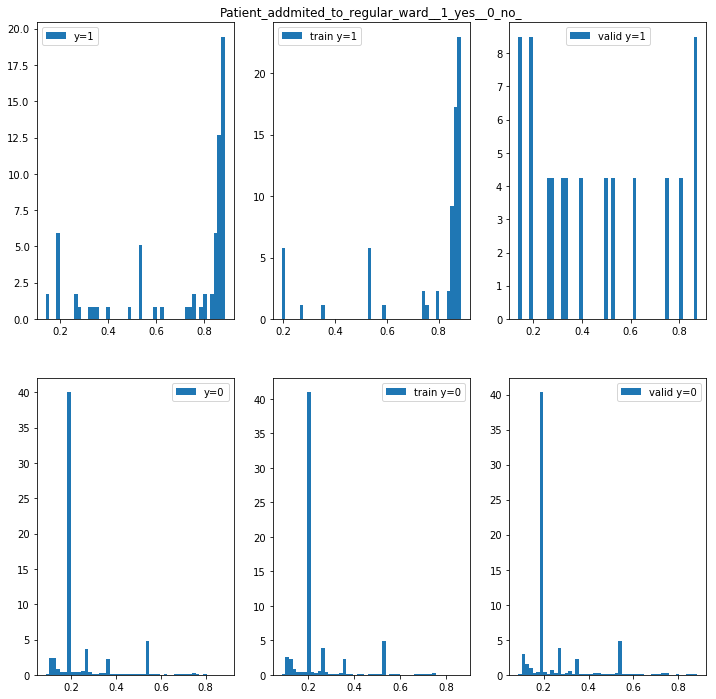

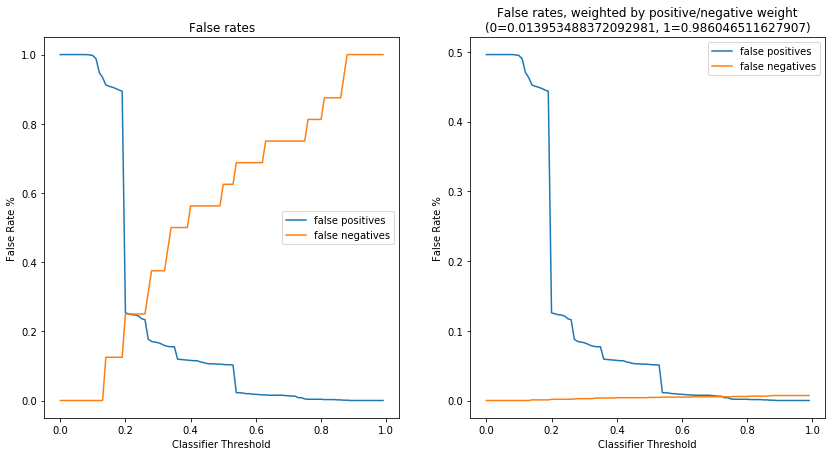

TASK:  Patient_addmited_to_semi_intensive_unit__1_yes__0_no_ without age column


elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
Found `n_estimators` in params. Will use it instead of argument


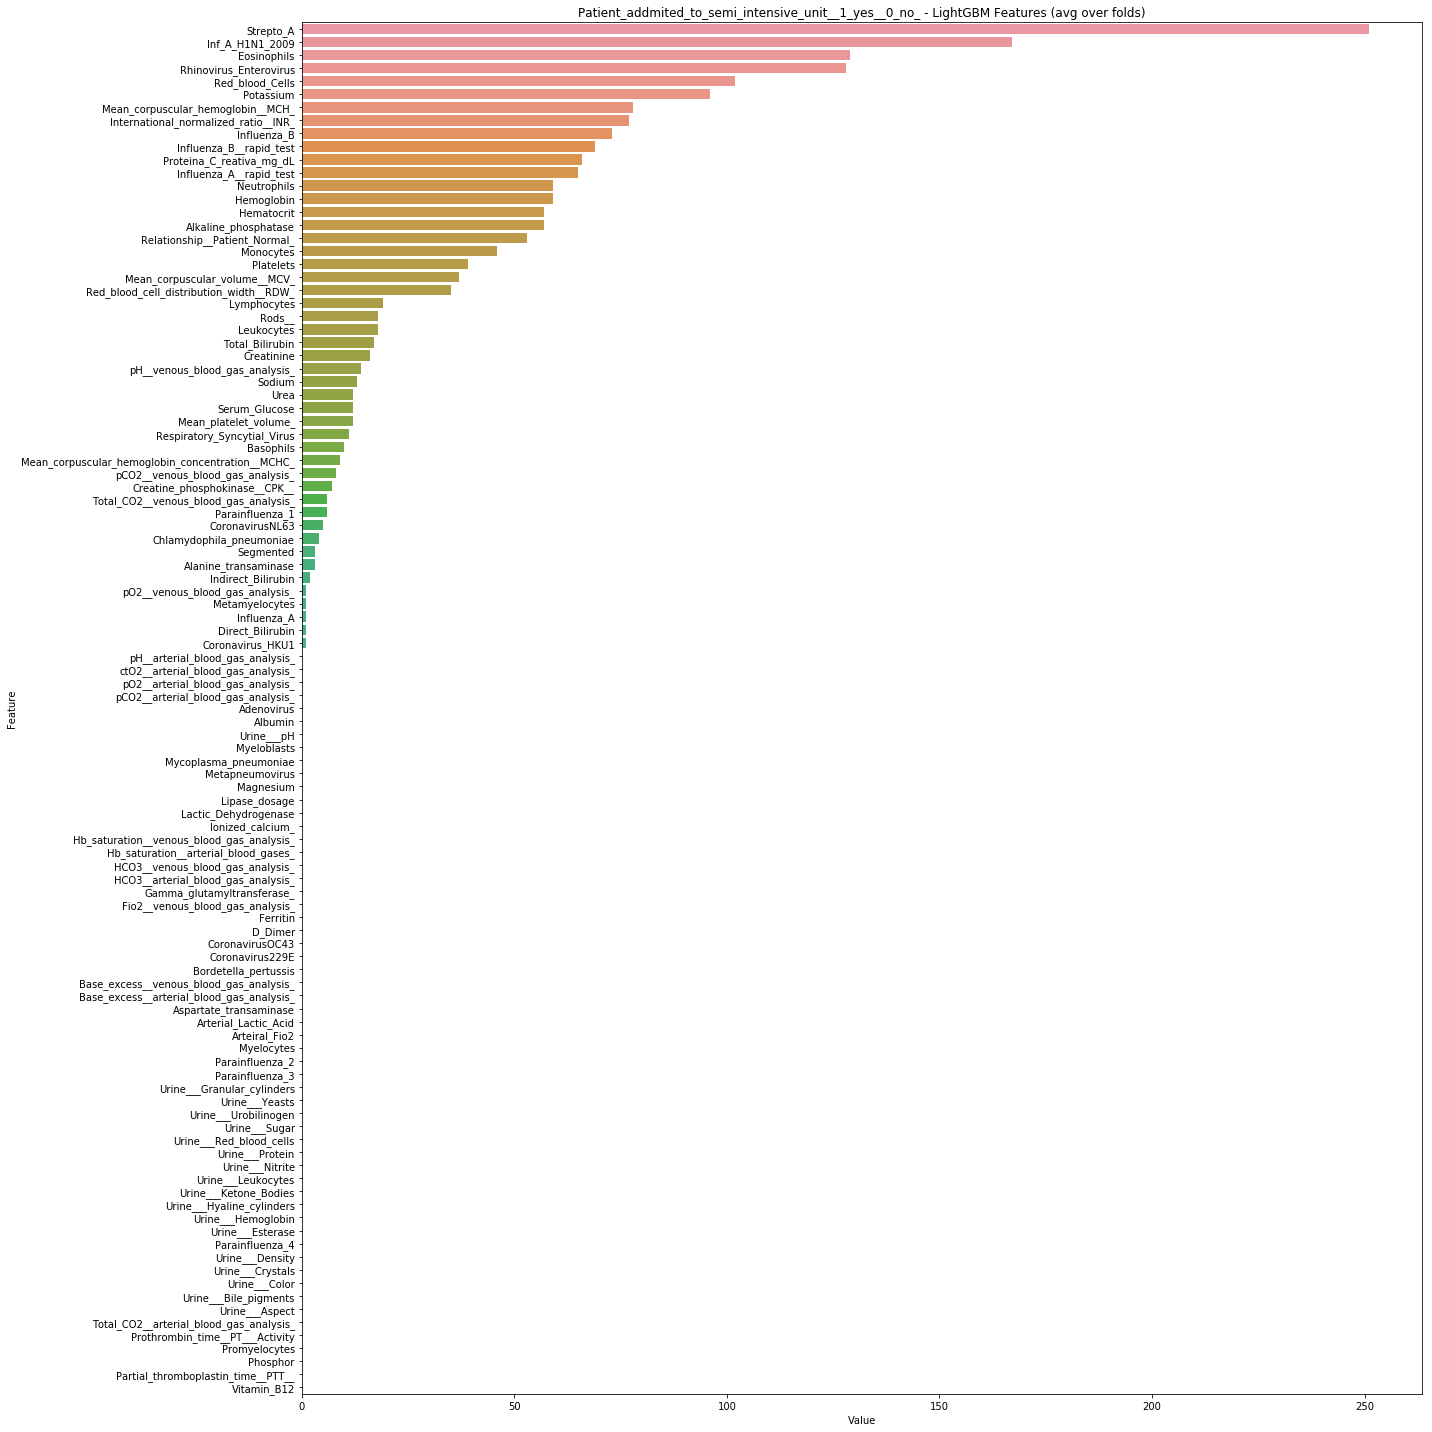

Setting feature_perturbation = "tree_path_dependent" because no background data was given.
LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


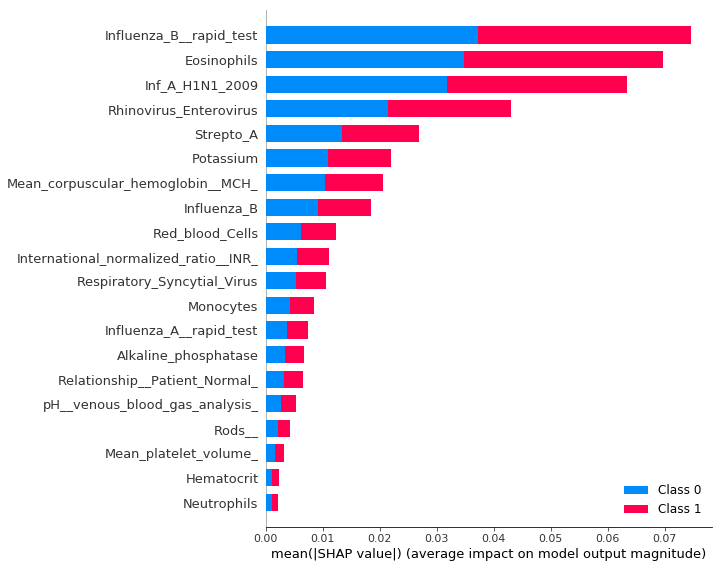

Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.


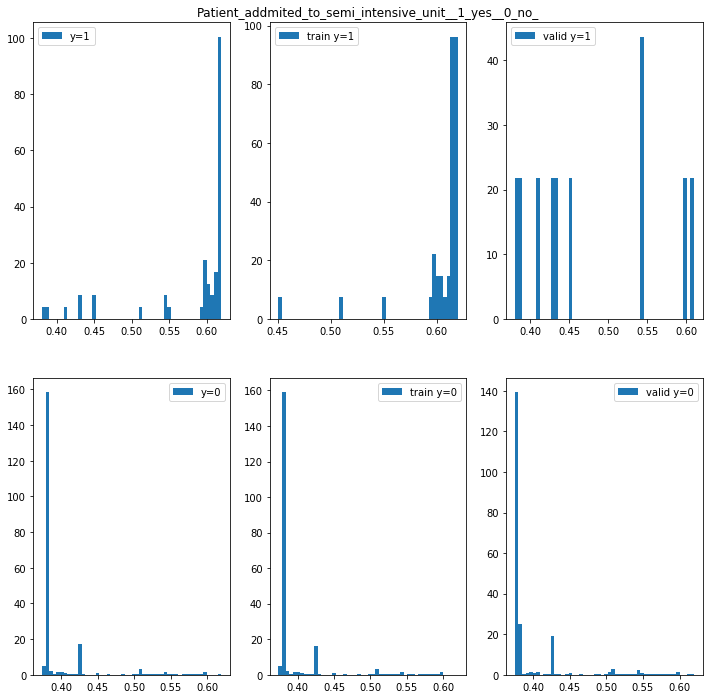

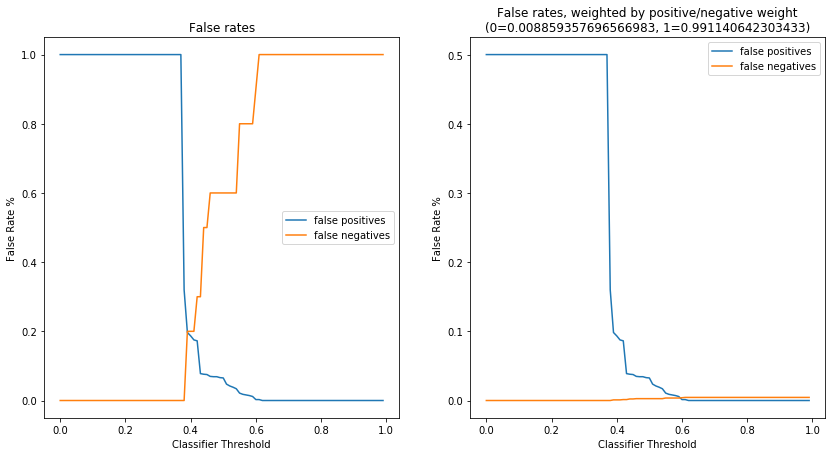

TASK:  Patient_addmited_to_intensive_care_unit__1_yes__0_no_ without age column


elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
Found `n_estimators` in params. Will use it instead of argument


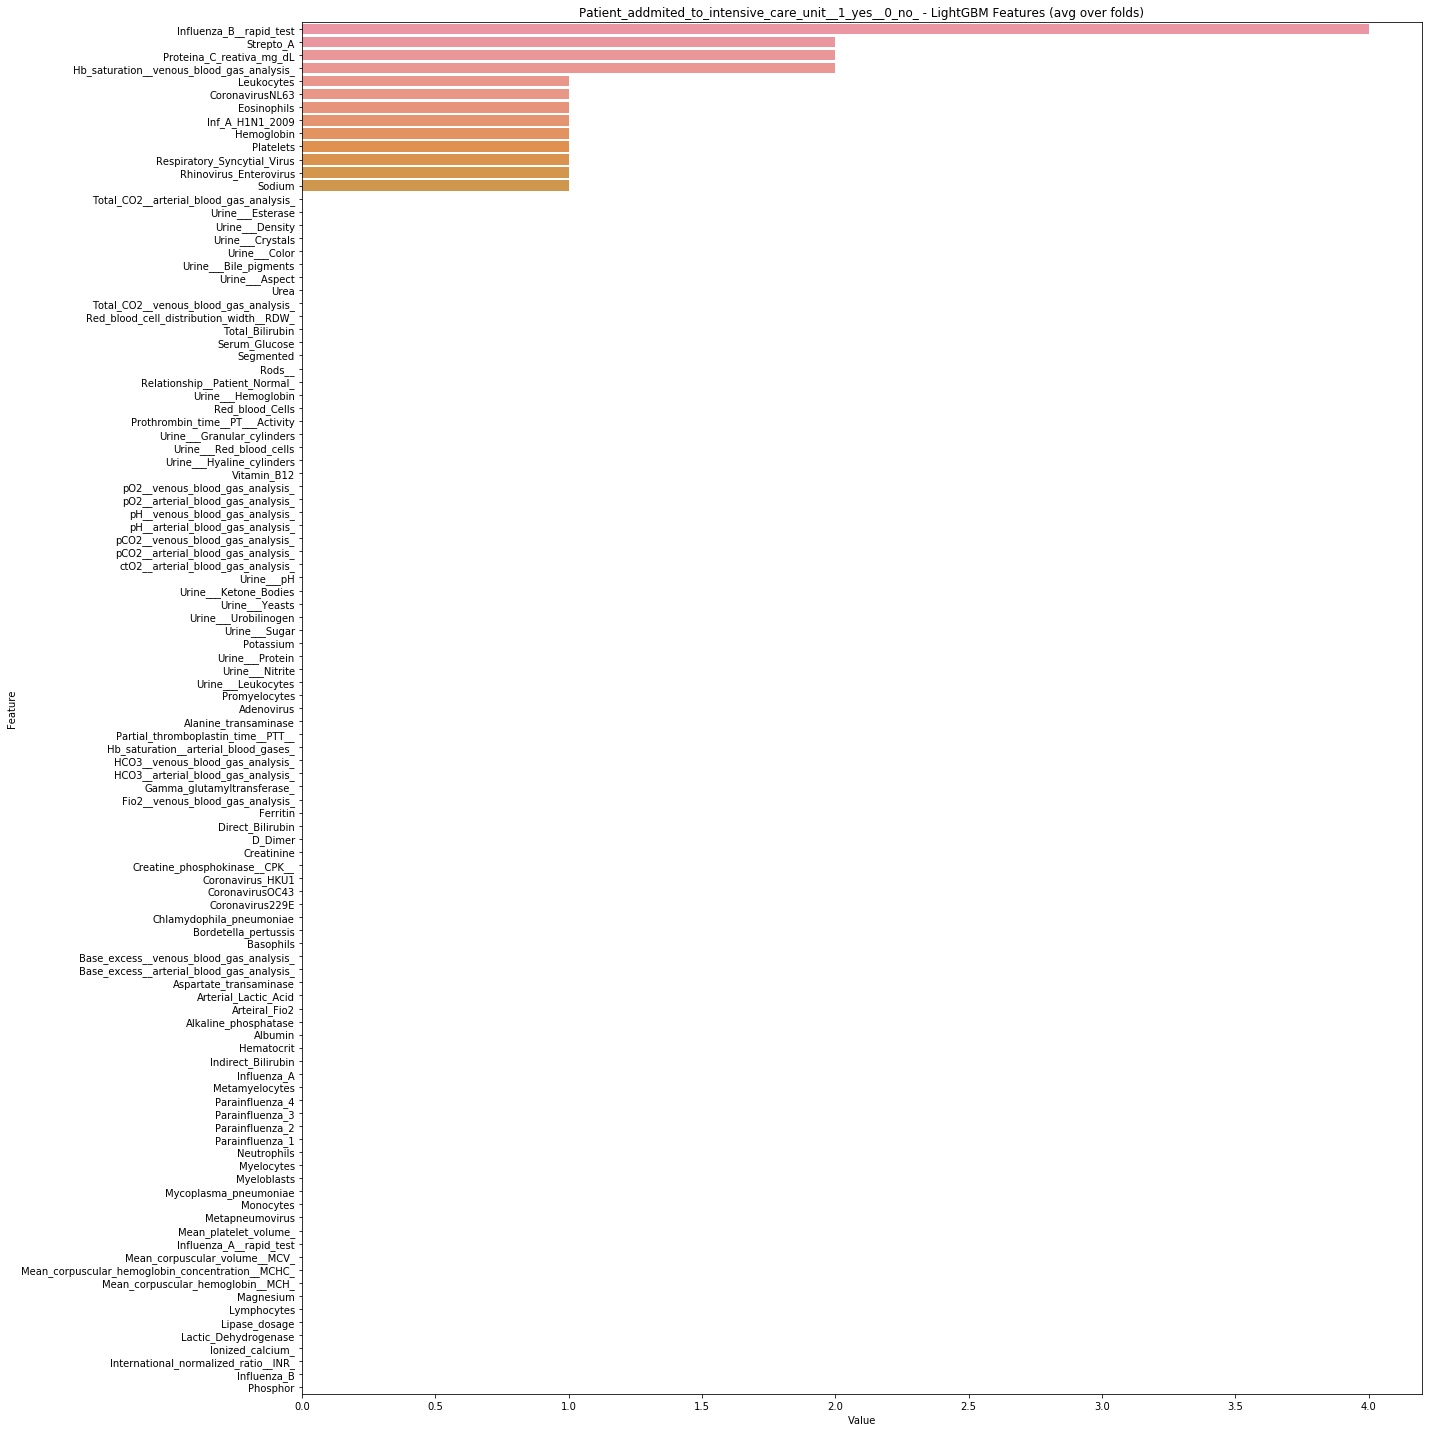

Setting feature_perturbation = "tree_path_dependent" because no background data was given.
LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


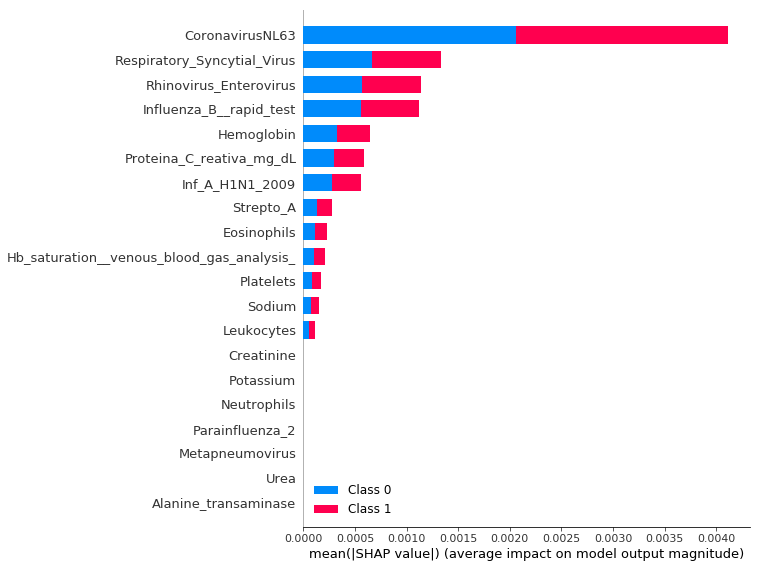

Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.


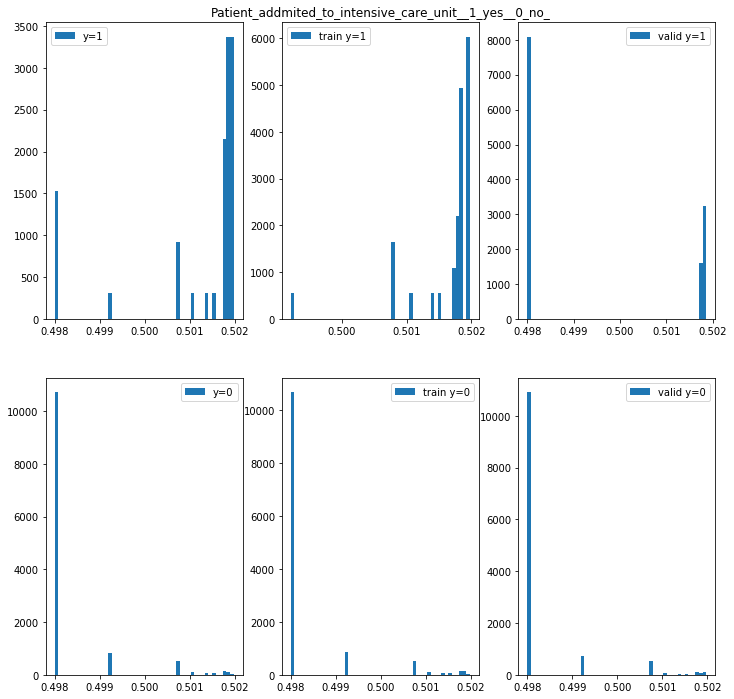

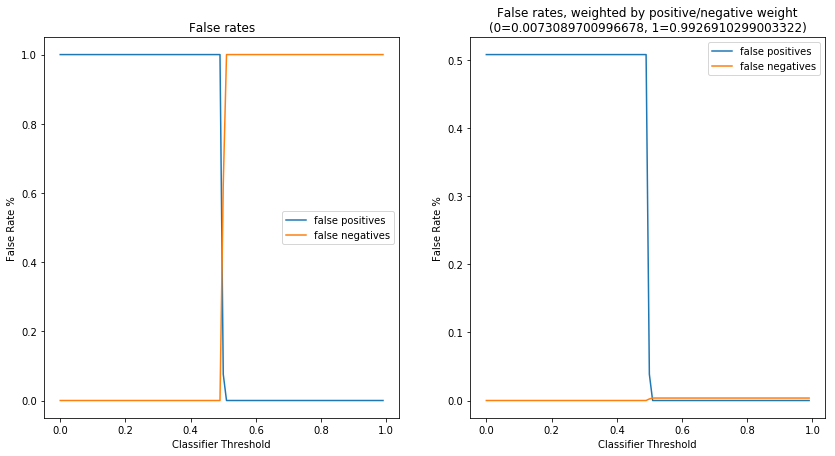

In [26]:
cat_features = [
    i for i in df.columns if str(df[i].dtype) in ['object', 'category']
]
if len(cat_features) > 0:
    df[cat_features] = df[cat_features].astype('category')

# lgb don't like strings/category, only numbers and boolean
df_lgb = df.copy()
for i in cat_features:
    df_lgb[i] = df[i].cat.codes
# it don't like complex names too..
df_lgb.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in df_lgb.columns]

for with_without in [0,1]:
    for task in [
         'Patient_addmited_to_regular_ward__1_yes__0_no_', 
         'Patient_addmited_to_semi_intensive_unit__1_yes__0_no_', 
         'Patient_addmited_to_intensive_care_unit__1_yes__0_no_'
    ]:
        print('TASK: ', task, "without age column" if with_without == 1 else '')
        if 'positive' in df_lgb[task].unique():
            y = (df_lgb[task] == 'positive').astype(int)
        else:
            y = (df_lgb[task] == 1).astype(int)
        x = df_lgb.drop(['Patient_ID', 
                         'SARS_Cov_2_exam_result', 
                         'Patient_addmited_to_regular_ward__1_yes__0_no_', 
                         'Patient_addmited_to_semi_intensive_unit__1_yes__0_no_', 
                         'Patient_addmited_to_intensive_care_unit__1_yes__0_no_'
                        ], axis=1)
        if with_without == 1:
            x = x.drop(['Patient_age_quantile'], axis=1)
        # x/y train/test
        error_count = 0
        while True:
            train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.2, shuffle=True, stratify=y)
            train_weight = 1-train_y.replace(train_y.value_counts()/len(train_y))
            valid_weight = 1-valid_y.replace(valid_y.value_counts()/len(valid_y))
            if len(train_y.unique()) > 1 and len(valid_y.unique()) > 1:
                break
            error_count += 1
            print(
                "error [", error_count,"] spliting dataset, len(train_y)=",
                len(train_y.unique()) ,
                " or len(valid_y)=",
                len(valid_y.unique()),
                " are equal to 1")
            if error_count>10:
                break
        if error_count>10:
            print("Can't split dataset")
            continue

        positive_weight = train_weight[train_y==1].values[0]
        train_data=lgb.Dataset(train_x,label=train_y, weight=train_weight)
        valid_data=lgb.Dataset(valid_x,label=valid_y, weight=valid_weight, reference=train_data)

        #Select Hyper-Parameters
        params = {'metric': 'auc',
                  'objective':'binary',
                  'eta': 0.004,
                  'boosting_type': 'gbdt',
                  'colsample_bytree': 0.9,
                  'max_depth': 9,
                  'n_estimators': 1200,
                  'subsample': 0.9,
                  'num_threads': -1,
                  'scale_pos_weight': positive_weight
        }

        #Train model on selected parameters and number of iterations
        lgbm = lgb.train(
            params=params,
            train_set=train_data,
            valid_sets=valid_data,
            early_stopping_rounds=500,
            verbose_eval=0,
        #    categorical_feature=cat_features
        )
        # sorted(zip(clf.feature_importances_, X.columns), reverse=True)
        feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importance(),x.columns)), columns=['Value','Feature'])

        plt.figure(figsize=(20, 20))
        sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
        plt.title(task + ' - LightGBM Features (avg over folds)')
        plt.tight_layout()
        plt.show()
        
        shap_values = shap.TreeExplainer(lgbm).shap_values(valid_x)
        shap.summary_plot(shap_values, valid_x)
        plt.show()
        
        plt.figure(figsize=(12,12))
        plt.subplot(2,3,1)
        plt.hist(lgbm.predict(x[y==1]), label='y=1', bins=50, density=True)
        plt.legend()
        plt.subplot(2,3,2)
        plt.title(task)
        plt.hist(lgbm.predict(train_x[y==1]), label='train y=1', bins=50, density=True)
        plt.legend()
        plt.subplot(2,3,3)
        plt.hist(lgbm.predict(valid_x[y==1]), label='valid y=1', bins=50, density=True)
        plt.legend()

        plt.subplot(2,3,4)
        plt.hist(lgbm.predict(x[y==0]), label='y=0', bins=50, density=True)
        plt.legend()
        plt.subplot(2,3,5)
        plt.hist(lgbm.predict(train_x[y==0]), label='train y=0', bins=50, density=True)
        plt.legend()
        plt.subplot(2,3,6)
        plt.hist(lgbm.predict(valid_x[y==0]), label='valid y=0', bins=50, density=True)
        plt.legend()
        plt.show()
        
        create_threshold_chart(
            y_hat=lgbm.predict(valid_x),
            y=valid_y,
            weight={0:1-positive_weight, 1:positive_weight}
        )